# PFAS Toolbox - Comparison of Method 537.1 and 1633

### 1) Libraries Import (REQUIRED)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import scipy.stats
import statsmodels.api as sm
from statsmodels.graphics.agreement import mean_diff_plot
from scipy.stats import ks_2samp


### 2) Data Import (REQUIRED)

In [3]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


#### 2.1) Read Macro

In [4]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 01-26-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


Sampling point Date Component  Sample Number  \
0  ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...       259452.0   
1  ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...       259452.0   
2  ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...       259452.0   
3  ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...       259452.0   
4  ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...       259452.0   

            Sampling Point Sample Name         Sampled Date Analysis  \
0  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   
1  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   
2  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   
3  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   
4  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   

                                 Component Qualifiers Result     Units  ...  \
0  10:2Fluorotelomersulfonic Acid (Report)        NaN  <9.40  ppt_wt_v  ...   
1                    11Cl-PF3OUdS (Report)        NaN  <4.70  ppt_wt_v  ...   
2   4:2Fluorotelomersulfonic Acid (Report)        NaN  <4.70  ppt_wt_v  ...   
3   6:2Fluorotelomersulfonic Acid (Report)        NaN  <19.0  ppt_wt_v  ...   
4   8:2Fluorotelomersulfonic Acid (Report)        NaN  <9.40  ppt_wt_v  ...   

  ChainLength         Pseudonym Dominant Contributor           Sector Depth  \
0        12.0  Metal Finisher B                  NaN  Metal Finishing   NaN   
1        10.0  Metal Finisher B                  NaN  Metal Finishing   NaN   
2         6.0  Metal Finisher B                  NaN  Metal Finishing   NaN   
3         8.0  Metal Finisher B                  NaN  Metal Finishing   NaN   
4        10.0  Metal Finisher B                  NaN  Metal Finishing   NaN   

  Edit Notes Field Notes Region Crop  
0        NaN   NaN   NaN    NaN  NaN  
1        NaN   NaN   NaN    NaN  NaN  
2        NaN   NaN   NaN    NaN  NaN  
3        NaN   NaN   NaN    NaN  NaN  
4        NaN   NaN   NaN    NaN  NaN  

[5 rows x 55 columns]

### 3) Import PFAS Compounds Attributes (REQUIRED)

In [5]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 01-26-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)


In [6]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

#### 3.1) Define PFAS Compound Main and TOP Assay

In [7]:
Main_Assay = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanoic acid',
             'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid','Perfluorotridecanoic acid']

In [8]:
TOP_Assay = ['TOP-Perfluorobutanesulfonic acid','TOP-Perfluorobutanoic acid','TOP-Perfluoroheptanoic acid','TOP-Perfluorohexanesulfonic acid','TOP-Perfluorohexanoic acid','TOP-Perfluorononanoic acid',
             'TOP-Perfluorooctanesulfonic acid (PFOS)','TOP-Perfluoropentanoic acid','TOP-Perfluorotridecanoic acid']

In [9]:
Assay_537_1_mod_only =['10:2Fluorotelomersulfonic acid','Perfluorohexadecanoic acid','Perfluorooctadecanoic acid']
Assay_1633_only=['3:3 FTCA','5:3 FTCA','7:3 FTCA','Nonafluorodioxaheptanoic acid','PFEESA','Perfluoromethoxybutanoic acid','Perfluoromethoxypropoanoic acid']
both=['11Cl-PF3OUdS','4:2 Fluorotelomersulfonic acid','6:2 Fluorotelomersulfonic acid','8:2 Fluorotelomersulfonic acid','9Cl-PF3ONS','ADONA',
'HFPO-DA','NEtFOSA','NEtFOSAA','NEtFOSE','NMeFOSA','NMeFOSAA','NMeFOSE','Perfluorobutanesulfonic acid','Perfluorobutanoic acid',
'Perfluorodecanesulfonic acid','Perfluorodecanoic acid','Perfluorododecanesulfonic acid','Perfluorododecanoic acid','Perfluoroheptanesulfonic acid',
'Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanesulfonic acid','Perfluorononanoic acid',
'Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid',
'Perfluoropentanoic acid','Perfluorotetradecanoic acid','Perfluorotridecanoic acid','Perfluoroundecanoic acid']
Assay_737_1_mod=Assay_537_1_mod_only+both
Assay_1633=Assay_1633_only+both

In [10]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Carboxylic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Long')]
pfas_compounds_CarboxylicAcid_Long= subset['Database'].unique()
pfas_compounds_CarboxylicAcid_Long


array(['Perfluorodecanoic acid', 'Perfluorododecanoic acid',
       'Perfluorohexadecanoic acid', 'Perfluorononanoic acid',
       'Perfluorooctadecanoic acid', 'Perfluorooctanoic acid (PFOA)',
       'Perfluorotetradecanoic acid', 'Perfluorotridecanoic acid',
       'Perfluoroundecanoic acid', 'TOP-Perfluorodecanoic acid',
       'TOP-Perfluorododecanoic acid', 'TOP-Perfluorohexadecanoic acid',
       'TOP-Perfluorononanoic acid', 'TOP-Perfluorooctadecanoic acid',
       'TOP-Perfluorooctanoic acid (PFOA)',
       'TOP-Perfluorotetradecanoic acid', 'TOP-Perfluorotridecanoic acid',
       'TOP-Perfluoroundecanoic acid'], dtype=object)

In [11]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Carboxylic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Short')]
pfas_compounds_CarboxylicAcid_Short= subset['Database'].unique()
pfas_compounds_CarboxylicAcid_Short


array(['Perfluorobutanoic acid', 'Perfluoroheptanoic acid',
       'Perfluorohexanoic acid', 'Perfluoropentanoic acid',
       'TOP-Perfluorobutanoic acid', 'TOP-Perfluoroheptanoic acid',
       'TOP-Perfluorohexanoic acid', 'TOP-Perfluoropentanoic acid'],
      dtype=object)

In [12]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Fluorotelomer Sulfonic Acid')]
pfas_compounds_FluorotelomerSulfonicAcid= subset['Database'].unique()
pfas_compounds_FluorotelomerSulfonicAcid

array(['10:2Fluorotelomersulfonic acid', '4:2 Fluorotelomersulfonic acid',
       '6:2 Fluorotelomersulfonic acid', '8:2 Fluorotelomersulfonic acid',
       'TOP-10:2Fluorotelomersulfonic acid',
       'TOP-4:2 Fluorotelomersulfonic acid',
       'TOP-6:2 Fluorotelomersulfonic acid',
       'TOP-8:2 Fluorotelomersulfonic acid'], dtype=object)

In [13]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Per- and Polyfluorother Carboxylic Acid')]
pfas_compounds_PerPolyfluorotherCarboxylicAcid= subset['Database'].unique()
pfas_compounds_PerPolyfluorotherCarboxylicAcid

array(['ADONA', 'HFPO-DA', 'Nonafluorodioxaheptanoic acid',
       'Perfluoromethoxybutanoic acid', 'Perfluoromethoxypropoanoic acid',
       'TOP-ADONA', 'TOP-HFPO-DA'], dtype=object)

In [14]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Perfluorooctane Sulfonamidoacetic Acid')]
pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid= subset['Database'].unique()
pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid

array(['NEtFOSAA', 'NMeFOSAA', 'TOP-NEtFOSAA', 'TOP-NMeFOSAA'],
      dtype=object)

In [15]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Perfluorooctane Sulfonamide Ethanol')]
pfas_compounds_PerfluorooctaneSulfonamideEthanol= subset['Database'].unique()
pfas_compounds_PerfluorooctaneSulfonamideEthanol

array(['NEtFOSE', 'NMeFOSE'], dtype=object)

In [16]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Sulfonic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Long')]
pfas_compounds_SulfonicAcid_Long= subset['Database'].unique()
pfas_compounds_SulfonicAcid_Long

array(['Perfluorodecanesulfonic acid', 'Perfluorododecanesulfonic acid',
       'Perfluoroheptanesulfonic acid', 'Perfluorohexanesulfonic acid',
       'Perfluorononanesulfonic acid',
       'Perfluorooctanesulfonic acid (PFOS)',
       'TOP-Perfluorododecanesulfonic acid',
       'TOP-Perfluorodecanesulfonic acid',
       'TOP-Perfluoroheptanesulfonic acid',
       'TOP-Perfluorohexanesulfonic acid',
       'TOP-Perfluorononanesulfonic acid',
       'TOP-Perfluorooctanesulfonic acid (PFOS)'], dtype=object)

In [17]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Sulfonic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Short')]
pfas_compounds_SulfonicAcid_Short= subset['Database'].unique()
pfas_compounds_SulfonicAcid_Short

array(['Perfluorobutanesulfonic acid', 'Perfluoropentanesulfonic acid',
       'TOP-Perfluoropentanesulfonic acid',
       'TOP-Perfluorobutanesulfonic acid'], dtype=object)

### 4) Prepare Subset of Data

#### 4.1) Functions

In [18]:
def filter_dataframe(data_df, start_date, end_date, pfas_compounds, qual_grades):
    """
    Filter a DataFrame based on a date range in 'Sample Date', a list of values in 'PFAS Compound',
    and a list of values in 'Qual Summary (Grade for filtering)'.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        start_date (str): The start date for filtering 'Sample Date'.
        end_date (str): The end date for filtering 'Sample Date'.
        pfas_compounds (list): List of 'PFAS Compound' values to filter.
        qual_grades (list): List of 'Qual Summary (Grade for filtering)' values to filter.

    Returns:
        pd.DataFrame: The filtered dataframe.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply the date range filter
    filtered_df = data_df[
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) & 
        (data_df['Sample Date'] <= pd.to_datetime(end_date))
    ]

    # Filter by 'PFAS Compound'
    filtered_df = filtered_df[filtered_df['PFAS Compound'].isin(pfas_compounds)]

    # Filter by 'Qual Summary (Grade for filtering)'
    filtered_df = filtered_df[filtered_df['Qual Summary (Grade for filtering)'].isin(qual_grades)]

    return filtered_df


#### 4.2) Set Filters

In [19]:
start_date='2023-12-01'
end_date='2023-12-30'
pfas_compounds=both
qual_grades=['Good','Probably Ok','']

#### 4.3) Prepare Subset of Data

In [20]:
subset_df=filter_dataframe(data_df, start_date, end_date, pfas_compounds,qual_grades)
subset_df=subset_df[['Result','Analysis Method','Sample Location','Type','Sample Date','PFAS Compound','MDL','Detection Class','Quant Only Incl Qual Flags',
           'Quant Incl Estimates Incl Qual Flags','All (w BDL= MDL/2) Incl Qual Flags','Units','ChainLength','Dominant Contributor',
           'Sector']]

In [21]:
subset_df_1633=subset_df[subset_df['Analysis Method']==1633]
subset_df_537=subset_df[subset_df['Analysis Method']=='537.1 (mod)']


In [22]:
# Total number of rows in the DataFrame
total_rows = len(subset_df_1633)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_1633 = subset_df_1633.groupby('Detection Class').size()
# Calculate the percentage
grouped_percentage_1633 = (grouped_counts_1633 / total_rows) * 100

print('1633 method records by Detection class')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_1633)
print(grouped_percentage_1633)

1633 method records by Detection class
Detection Class
BDL      1168
BQL       115
Quant     142
dtype: int64
Detection Class
BDL      81.964912
BQL       8.070175
Quant     9.964912
dtype: float64


In [23]:
# Total number of rows in the DataFrame
total_rows = len(subset_df_537)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_537 = subset_df_537.groupby('Detection Class').size()
# Calculate the percentage
grouped_percentage_1633 = (grouped_counts_537 / total_rows) * 100

print('537.1 method records by Detection class')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_537)
print(grouped_percentage_1633)

537.1 method records by Detection class
Detection Class
BDL      131
BQL       39
Quant     54
dtype: int64
Detection Class
BDL      58.482143
BQL      17.410714
Quant    24.107143
dtype: float64


In [24]:
#Create a unique key to be used to march records from one dataset to another
subset_df_1633['unique_key'] = subset_df_1633['Sample Location'].astype(str) + '_' + subset_df_1633['Type'].astype(str) + '_' + subset_df_1633['Sample Date'].astype(str) + '_' + subset_df_1633['PFAS Compound'].astype(str)
subset_df_537['unique_key'] = subset_df_537['Sample Location'].astype(str) + '_' + subset_df_537['Type'].astype(str) + '_' + subset_df_537['Sample Date'].astype(str) + '_' + subset_df_537['PFAS Compound'].astype(str)


<ipython-input-24-08c2bc1540c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_1633['unique_key'] = subset_df_1633['Sample Location'].astype(str) + '_' + subset_df_1633['Type'].astype(str) + '_' + subset_df_1633['Sample Date'].astype(str) + '_' + subset_df_1633['PFAS Compound'].astype(str)
<ipython-input-24-08c2bc1540c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_537['unique_key'] = subset_df_537['Sample Location'].astype(str) + '_' + subset_df_537['Type'].astype(str) + '_' + sub

In [25]:
#Merge datasets on unique_key
merged_df = pd.merge(subset_df_1633, subset_df_537, on='unique_key', how='inner', suffixes=('_1633', '_5371'))


In [26]:
len(merged_df)

224

In [26]:
# Total number of rows in the DataFrame
total_rows = len(merged_df)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_merged = merged_df.groupby('Detection Class_1633').size()
# Calculate the percentage
grouped_percentage_merged = (grouped_counts_merged / total_rows) * 100

print('1633 method records by Detection class on the merged dataset')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_merged)
print(grouped_percentage_merged)

1633 method records by Detection class on the merged dataset
Detection Class_1633
BDL      139
BQL       27
Quant     58
dtype: int64
Detection Class_1633
BDL      62.053571
BQL      12.053571
Quant    25.892857
dtype: float64


In [27]:
# Total number of rows in the DataFrame
total_rows = len(merged_df)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_merged = merged_df.groupby('Detection Class_5371').size()
# Calculate the percentage
grouped_percentage_merged = (grouped_counts_merged / total_rows) * 100

print('537.1 method records by Detection class on the merged dataset')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_merged)
print(grouped_percentage_merged)

537.1 method records by Detection class on the merged dataset
Detection Class_5371
BDL      131
BQL       39
Quant     54
dtype: int64
Detection Class_5371
BDL      58.482143
BQL      17.410714
Quant    24.107143
dtype: float64


In [28]:
# Looking at the Detection Class combintation composition
grouped_data = merged_df.groupby(['Detection Class_1633', 'Detection Class_5371']).size().reset_index(name='Count')
total_records = len(merged_df)
grouped_data['Percentage'] = (grouped_data['Count'] / total_records) * 100
print(grouped_data)


  Detection Class_1633 Detection Class_5371  Count  Percentage
0                  BDL                  BDL    124   55.357143
1                  BDL                  BQL     13    5.803571
2                  BDL                Quant      2    0.892857
3                  BQL                  BDL      7    3.125000
4                  BQL                  BQL     15    6.696429
5                  BQL                Quant      5    2.232143
6                Quant                  BQL     11    4.910714
7                Quant                Quant     47   20.982143


In [27]:
quant_df = merged_df[(merged_df['Detection Class_1633'] == 'Quant') & (merged_df['Detection Class_5371'] == 'Quant')]
quant_df['RPD']=(quant_df['Quant Only Incl Qual Flags_1633']-quant_df['Quant Only Incl Qual Flags_5371'])/((quant_df['Quant Only Incl Qual Flags_1633']+quant_df['Quant Only Incl Qual Flags_5371'])/2)

<ipython-input-27-e6bc695403b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_df['RPD']=(quant_df['Quant Only Incl Qual Flags_1633']-quant_df['Quant Only Incl Qual Flags_5371'])/((quant_df['Quant Only Incl Qual Flags_1633']+quant_df['Quant Only Incl Qual Flags_5371'])/2)


In [28]:
quant_df['Compare Detection Classes']='537.1: '+quant_df['Detection Class_5371']+' / 1633: '+quant_df['Detection Class_1633']

<ipython-input-28-1ea73c0c8529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_df['Compare Detection Classes']='537.1: '+quant_df['Detection Class_5371']+' / 1633: '+quant_df['Detection Class_1633']


In [31]:
quant_df.columns

Index(['Result_1633', 'Analysis Method_1633', 'Sample Location_1633',
       'Type_1633', 'Sample Date_1633', 'PFAS Compound_1633', 'MDL_1633',
       'Detection Class_1633', 'Quant Only Incl Qual Flags_1633',
       'Quant Incl Estimates Incl Qual Flags_1633',
       'All (w BDL= MDL/2) Incl Qual Flags_1633', 'Units_1633',
       'ChainLength_1633', 'Dominant Contributor_1633', 'Sector_1633',
       'unique_key', 'Result_5371', 'Analysis Method_5371',
       'Sample Location_5371', 'Type_5371', 'Sample Date_5371',
       'PFAS Compound_5371', 'MDL_5371', 'Detection Class_5371',
       'Quant Only Incl Qual Flags_5371',
       'Quant Incl Estimates Incl Qual Flags_5371',
       'All (w BDL= MDL/2) Incl Qual Flags_5371', 'Units_5371',
       'ChainLength_5371', 'Dominant Contributor_5371', 'Sector_5371', 'RPD',
       'Compare Detection Classes'],
      dtype='object')

## Descriptive Statistics

In [26]:
quant_df_grouped = quant_df.groupby('PFAS Compound_1633')
stats_1633 = quant_df_grouped['Quant Only Incl Qual Flags_1633'].describe()
stats_5371 = quant_df_grouped['Quant Only Incl Qual Flags_5371'].describe()

differences = stats_1633 -stats_5371
percent_differences = (differences / stats_5371) * 100

comparison_df = pd.concat([stats_5371,stats_1633, differences, percent_differences], axis=1, keys=['Stats_1633', 'Stats_5371', 'Difference', 'Percent Difference'])

comparison_df

Stats_1633                              \
                                         count       mean        std   min   
PFAS Compound_1633                                                           
NEtFOSAA                                   1.0   4.800000        NaN   4.8   
NMeFOSAA                                   2.0  13.000000   0.000000  13.0   
Perfluorobutanesulfonic acid               4.0  19.275000  21.987174   4.6   
Perfluorobutanoic acid                     2.0  16.500000   3.535534  14.0   
Perfluorodecanoic acid                     3.0   7.166667   4.368447   3.5   
Perfluorododecanoic acid                   3.0   2.900000   0.556776   2.3   
Perfluoroheptanoic acid                    5.0  13.100000  21.201651   2.6   
Perfluorohexanesulfonic acid               3.0   2.766667   0.709460   2.0   
Perfluorohexanoic acid                     4.0  34.500000  40.509258   9.0   
Perfluorononanoic acid                     2.0  10.700000  13.152186   1.4   
Perfluorooctanesulfonic acid (PFOS)        7.0  19.000000  18.149472   5.9   
Perfluorooctanoic acid (PFOA)              4.0  15.725000  16.898792   5.5   
Perfluoropentanoic acid                    4.0  47.300000  75.178809   6.6   
Perfluoroundecanoic acid                   3.0   4.233333   2.478575   2.0   

                                                                 Stats_5371  \
                                        25%    50%    75%    max      count   
PFAS Compound_1633                                                            
NEtFOSAA                              4.800   4.80   4.80    4.8        1.0   
NMeFOSAA                             13.000  13.00  13.00   13.0        2.0   
Perfluorobutanesulfonic acid          8.275  10.25  21.25   52.0        4.0   
Perfluorobutanoic acid               15.250  16.50  17.75   19.0        2.0   
Perfluorodecanoic acid                4.750   6.00   9.00   12.0        3.0   
Perfluorododecanoic acid              2.650   3.00   3.20    3.4        3.0   
Perfluoroheptanoic acid               3.200   4.00   4.70   51.0        5.0   
Perfluorohexanesulfonic acid          2.450   2.90   3.15    3.4        3.0   
Perfluorohexanoic acid               15.000  17.00  36.50   95.0        4.0   
Perfluorononanoic acid                6.050  10.70  15.35   20.0        2.0   
Perfluorooctanesulfonic acid (PFOS)  10.550  14.00  16.50   59.0        7.0   
Perfluorooctanoic acid (PFOA)         7.375   8.20  16.55   41.0        4.0   
Perfluoropentanoic acid               8.850  11.30  49.75  160.0        4.0   
Perfluoroundecanoic acid              2.900   3.80   5.35    6.9        3.0   

                                                ... Difference        \
                                          mean  ...        75%   max   
PFAS Compound_1633                              ...                    
NEtFOSAA                              4.400000  ...      -0.40  -0.4   
NMeFOSAA                             11.500000  ...      -0.75   0.0   
Perfluorobutanesulfonic acid         21.200000  ...       4.50   0.0   
Perfluorobutanoic acid               17.500000  ...       0.50   0.0   
Perfluorodecanoic acid                8.033333  ...       1.05   1.0   
Perfluorododecanoic acid              2.800000  ...       0.20   0.1   
Perfluoroheptanoic acid              16.840000  ...       0.70  18.0   
Perfluorohexanesulfonic acid          2.766667  ...      -0.30  -0.5   
Perfluorohexanoic acid               39.250000  ...       7.50  15.0   
Perfluorononanoic acid               15.400000  ...       6.85   9.0   
Perfluorooctanesulfonic acid (PFOS)  11.885714  ...      -2.50 -40.0   
Perfluorooctanoic acid (PFOA)        20.950000  ...       7.95  12.0   
Perfluoropentanoic acid              51.525000  ...       4.00  10.0   
Perfluoroundecanoic acid              4.233333  ...       0.10  -0.1   

                                    Percent Difference                        \
                                                 count      

In [39]:
count_columns = [col for col in comparison_df.columns if 'mean' in col[1].lower()]
count_df = comparison_df[count_columns]
count_df

Stats_1633 Stats_5371 Difference  \
                                          mean       mean       mean   
PFAS Compound_1633                                                     
NEtFOSAA                              4.800000   4.400000  -0.400000   
NMeFOSAA                             13.000000  11.500000  -1.500000   
Perfluorobutanesulfonic acid         19.275000  21.200000   1.925000   
Perfluorobutanoic acid               16.500000  17.500000   1.000000   
Perfluorodecanoic acid                7.166667   8.033333   0.866667   
Perfluorododecanoic acid              2.900000   2.800000  -0.100000   
Perfluoroheptanoic acid              13.100000  16.840000   3.740000   
Perfluorohexanesulfonic acid          2.766667   2.766667   0.000000   
Perfluorohexanoic acid               34.500000  39.250000   4.750000   
Perfluorononanoic acid               10.700000  15.400000   4.700000   
Perfluorooctanesulfonic acid (PFOS)  19.000000  11.885714  -7.114286   
Perfluorooctanoic acid (PFOA)        15.725000  20.950000   5.225000   
Perfluoropentanoic acid              47.300000  51.525000   4.225000   
Perfluoroundecanoic acid              4.233333   4.233333   0.000000   

                                    Percent Difference  
                                                  mean  
PFAS Compound_1633                                      
NEtFOSAA                                     -8.333333  
NMeFOSAA                                    -11.538462  
Perfluorobutanesulfonic acid                  9.987030  
Perfluorobutanoic acid                        6.060606  
Perfluorodecanoic acid                       12.093023  
Perfluorododecanoic acid                     -3.448276  
Perfluoroheptanoic acid                      28.549618  
Perfluorohexanesulfonic acid                  0.000000  
Perfluorohexanoic acid                       13.768116  
Perfluorononanoic acid                       43.925234  
Perfluorooctanesulfonic acid (PFOS)         -37.443609  
Perfluorooctanoic acid (PFOA)                33.227345  
Perfluoropentanoic acid                       8.932347  
Perfluoroundecanoic acid                      0.000000

In [40]:
std_columns = [col for col in comparison_df.columns if 'std' in col[1].lower()]
std_df = comparison_df[std_columns]
std_df

Stats_1633 Stats_5371 Difference  \
                                           std        std        std   
PFAS Compound_1633                                                     
NEtFOSAA                                   NaN        NaN        NaN   
NMeFOSAA                              0.000000   2.121320   2.121320   
Perfluorobutanesulfonic acid         21.987174  20.989521  -0.997653   
Perfluorobutanoic acid                3.535534   2.121320  -1.414214   
Perfluorodecanoic acid                4.368447   4.572016   0.203569   
Perfluorododecanoic acid              0.556776   1.044031   0.487254   
Perfluoroheptanoic acid              21.201651  29.175555   7.973904   
Perfluorohexanesulfonic acid          0.709460   0.152753  -0.556707   
Perfluorohexanoic acid               40.509258  47.394620   6.885362   
Perfluorononanoic acid               13.152186  19.233304   6.081118   
Perfluorooctanesulfonic acid (PFOS)  18.149472   4.302104 -13.847368   
Perfluorooctanoic acid (PFOA)        16.898792  21.627375   4.728583   
Perfluoropentanoic acid              75.178809  79.020055   3.841246   
Perfluoroundecanoic acid              2.478575   2.502665   0.024090   

                                    Percent Difference  
                                                   std  
PFAS Compound_1633                                      
NEtFOSAA                                           NaN  
NMeFOSAA                                           inf  
Perfluorobutanesulfonic acid                 -4.537432  
Perfluorobutanoic acid                      -40.000000  
Perfluorodecanoic acid                        4.659982  
Perfluorododecanoic acid                     87.513440  
Perfluoroheptanoic acid                      37.609826  
Perfluorohexanesulfonic acid                -78.469181  
Perfluorohexanoic acid                       16.997008  
Perfluorononanoic acid                       46.236559  
Perfluorooctanesulfonic acid (PFOS)         -76.296260  
Perfluorooctanoic acid (PFOA)                27.981780  
Perfluoropentanoic acid                       5.109480  
Perfluoroundecanoic acid                      0.971945

In [41]:
min_columns = [col for col in comparison_df.columns if 'min' in col[1].lower()]
max_columns = [col for col in comparison_df.columns if 'max' in col[1].lower()]

min_df = comparison_df[min_columns]
max_df = comparison_df[max_columns]
min_max_df = pd.concat([min_df, max_df], axis=1)
min_max_df

Stats_1633 Stats_5371 Difference  \
                                           min        min        min   
PFAS Compound_1633                                                     
NEtFOSAA                                   4.8        4.4       -0.4   
NMeFOSAA                                  13.0       10.0       -3.0   
Perfluorobutanesulfonic acid               4.6        7.0        2.4   
Perfluorobutanoic acid                    14.0       16.0        2.0   
Perfluorodecanoic acid                     3.5        4.0        0.5   
Perfluorododecanoic acid                   2.3        1.6       -0.7   
Perfluoroheptanoic acid                    2.6        2.9        0.3   
Perfluorohexanesulfonic acid               2.0        2.6        0.6   
Perfluorohexanoic acid                     9.0       11.0        2.0   
Perfluorononanoic acid                     1.4        1.8        0.4   
Perfluorooctanesulfonic acid (PFOS)        5.9        6.5        0.6   
Perfluorooctanoic acid (PFOA)              5.5        7.8        2.3   
Perfluoropentanoic acid                    6.6        9.1        2.5   
Perfluoroundecanoic acid                   2.0        1.8       -0.2   

                                    Percent Difference Stats_1633 Stats_5371  \
                                                   min        max        max   
PFAS Compound_1633                                                             
NEtFOSAA                                     -8.333333        4.8        4.4   
NMeFOSAA                                    -23.076923       13.0       13.0   
Perfluorobutanesulfonic acid                 52.173913       52.0       52.0   
Perfluorobutanoic acid                       14.285714       19.0       19.0   
Perfluorodecanoic acid                       14.285714       12.0       13.0   
Perfluorododecanoic acid                    -30.434783        3.4        3.5   
Perfluoroheptanoic acid                      11.538462       51.0       69.0   
Perfluorohexanesulfonic acid                 30.000000        3.4        2.9   
Perfluorohexanoic acid                       22.222222       95.0      110.0   
Perfluorononanoic acid                       28.571429       20.0       29.0   
Perfluorooctanesulfonic acid (PFOS)          10.169492       59.0       19.0   
Perfluorooctanoic acid (PFOA)                41.818182       41.0       53.0   
Perfluoropentanoic acid                      37.878788      160.0      170.0   
Perfluoroundecanoic acid                    -10.000000        6.9        6.8   

                                    Difference Percent Difference  
                                           max                max  
PFAS Compound_1633                                                 
NEtFOSAA                                  -0.4          -8.333333  
NMeFOSAA                                   0.0           0.000000  
Perfluorobutanesulfonic acid               0.0           0.000000  
Perfluorobutanoic acid                     0.0           0.000000  
Perfluorodecanoic acid                     1.0           8.333333  
Perfluorododecanoic acid                   0.1           2.941176  
Perfluoroheptanoic acid                   18.0          35.294118  
Perfluorohexanesulfonic acid              -0.5         -14.705882  
Perfluorohexanoic acid                    15.0          15.789474  
Perfluorononanoic acid                     9.0          45.000000  
Perfluorooctanesulfonic acid (PFOS)      -40.0         -67.796610  
Perfluorooctanoic acid (PFOA)             12.0          29.268293  
Perfluoropentanoic acid                   10.0           6.250000  
Perfluoroundecanoic acid                  -0.1          -1.449275

In [42]:

all_df=pd.concat([subset_df_1633[subset_df_1633['unique_key'].isin(quant_df['unique_key'])], subset_df_537[subset_df_537['unique_key'].isin(quant_df['unique_key'])]])
all_df.count()

Result                                  94
Analysis Method                         94
Sample Location                         94
Type                                    94
Sample Date                             94
PFAS Compound                           94
MDL                                      0
Detection Class                         94
Quant Only Incl Qual Flags              94
Quant Incl Estimates Incl Qual Flags    94
All (w BDL= MDL/2) Incl Qual Flags      94
Units                                   94
ChainLength                             94
Dominant Contributor                     0
Sector                                  20
unique_key                              94
dtype: int64

### By Type:

In [39]:
quant_df.head()

Result_1633 Analysis Method_1633 Sample Location_1633  Type_1633  \
11          10                 1633     Durham Biosolids  Biosolids   
15           4                 1633     Durham Biosolids  Biosolids   
17         1.6                 1633     Durham Biosolids  Biosolids   
25          10                 1633     Durham Biosolids  Biosolids   
31         1.8                 1633     Durham Biosolids  Biosolids   

   Sample Date_1633                   PFAS Compound_1633  MDL_1633  \
11       2023-12-05                             NMeFOSAA       NaN   
15       2023-12-05               Perfluorodecanoic acid       NaN   
17       2023-12-05             Perfluorododecanoic acid       NaN   
25       2023-12-05  Perfluorooctanesulfonic acid (PFOS)       NaN   
31       2023-12-05             Perfluoroundecanoic acid       NaN   

   Detection Class_1633  Quant Only Incl Qual Flags_1633  \
11                Quant                             10.0   
15                Quant                              4.0   
17                Quant                              1.6   
25                Quant                             10.0   
31                Quant                              1.8   

    Quant Incl Estimates Incl Qual Flags_1633  ...  \
11                                       10.0  ...   
15                                        4.0  ...   
17                                        1.6  ...   
25                                       10.0  ...   
31                                        1.8  ...   

                     PFAS Compound_5371 MDL_5371  Detection Class_5371  \
11                             NMeFOSAA      NaN                 Quant   
15               Perfluorodecanoic acid      NaN                 Quant   
17             Perfluorododecanoic acid      NaN                 Quant   
25  Perfluorooctanesulfonic acid (PFOS)      NaN                 Quant   
31             Perfluoroundecanoic acid      NaN                 Quant   

   Quant Only Incl Qual Flags_5371 Quant Incl Estimates Incl Qual Flags_5371  \
11                            13.0                                      13.0   
15                             3.5                                       3.5   
17                             2.3                                       2.3   
25                            14.0                                      14.0   
31                             2.0                                       2.0   

   All (w BDL= MDL/2) Incl Qual Flags_5371 Units_5371 ChainLength_5371  \
11                                    13.0     ppb_wt              8.0   
15                                     3.5     ppb_wt             10.0   
17                                     2.3     ppb_wt             12.0   
25                                    14.0     ppb_wt              8.0   
31                                     2.0     ppb_wt             11.0   

   Dominant Contributor_5371 Sector_5371  
11                       NaN         NaN  
15                       NaN         NaN  
17                       NaN         NaN  
25                       NaN         NaN  
31                       NaN         NaN  

[5 rows x 31 columns]

In [40]:
quant_df_grouped_Type = quant_df.groupby('Type_1633')
stats_1633_Type = quant_df_grouped_Type['Quant Only Incl Qual Flags_1633'].describe()
stats_5371_Type = quant_df_grouped_Type['Quant Only Incl Qual Flags_5371'].describe()

differences_Type = stats_1633_Type -stats_5371_Type
percent_differences_Type = (differences_Type / stats_5371_Type) * 100

comparison_df_Type = pd.concat([stats_5371_Type,stats_1633_Type, differences_Type, percent_differences_Type], axis=1, keys=['Stats_1633', 'Stats_537.1', 'Difference', 'Percent Difference'])

comparison_df_Type

Stats_1633                                            \
                         count       mean        std  min     25%    50%   
Type_1633                                                                  
Biosolids                 12.0   6.683333   5.004876  1.4   3.125   4.30   
Effluent                  15.0   8.346667   5.250832  2.0   4.650   6.60   
Influent                  10.0  13.680000  16.573057  2.9   5.000   8.85   
Outfall of Industry       10.0  45.990000  48.787304  3.0  13.750  30.50   

                                  Stats_537.1             ... Difference  \
                       75%    max       count       mean  ...        75%   
Type_1633                                                 ...              
Biosolids            13.00   14.0        12.0   6.441667  ...      -3.00   
Effluent             11.25   19.0        15.0   8.080000  ...      -1.20   
Influent             13.25   59.0        10.0  12.220000  ...       3.25   
Outfall of Industry  51.75  160.0        10.0  52.510000  ...      13.25   

                          Percent Difference                                   \
                      max              count       mean        std        min   
Type_1633                                                                       
Biosolids             2.0                0.0  -3.615960  -4.569792  14.285714   
Effluent             -3.0                0.0  -3.194888 -23.052811  30.000000   
Influent            -37.0                0.0 -10.672515 -59.688879   0.000000   
Outfall of Industry  10.0                0.0  14.176995   8.308027  10.000000   

                                                                 
                           25%        50%        75%        max  
Type_1633                                                        
Biosolids            -1.600000  -1.162791 -23.076923  14.285714  
Effluent             11.827957  21.212121 -10.666667 -15.789474  
Influent             36.000000  52.542373  24.528302 -62.711864  
Outfall of Industry   5.454545  32.786885  25.603865   6.250000  

[4 rows x 32 columns]

In [41]:
count_columns_Type = [col for col in comparison_df_Type.columns if 'mean' in col[1].lower()]
count_df_Type = comparison_df_Type[count_columns_Type]
count_df_Type

Stats_1633 Stats_537.1 Difference Percent Difference
                          mean        mean       mean               mean
Type_1633                                                               
Biosolids             6.683333    6.441667  -0.241667          -3.615960
Effluent              8.346667    8.080000  -0.266667          -3.194888
Influent             13.680000   12.220000  -1.460000         -10.672515
Outfall of Industry  45.990000   52.510000   6.520000          14.176995

In [42]:
std_columns_Type = [col for col in comparison_df_Type.columns if 'std' in col[1].lower()]
std_df_Type = comparison_df_Type[std_columns_Type]
std_df_Type

Stats_1633 Stats_537.1 Difference Percent Difference
                           std         std        std                std
Type_1633                                                               
Biosolids             5.004876    4.776164  -0.228712          -4.569792
Effluent              5.250832    4.040368  -1.210464         -23.052811
Influent             16.573057    6.680785  -9.892272         -59.688879
Outfall of Industry  48.787304   52.840566   4.053263           8.308027

In [43]:
min_columns_Type = [col for col in comparison_df_Type.columns if 'min' in col[1].lower()]
max_columns_Type = [col for col in comparison_df_Type.columns if 'max' in col[1].lower()]

min_df_Type = comparison_df_Type[min_columns_Type]
max_df_Type = comparison_df_Type[max_columns_Type]
min_max_df_Type = pd.concat([min_df_Type, max_df_Type], axis=1)
min_max_df_Type

Stats_1633 Stats_537.1 Difference Percent Difference  \
                           min         min        min                min   
Type_1633                                                                  
Biosolids                  1.4         1.6        0.2          14.285714   
Effluent                   2.0         2.6        0.6          30.000000   
Influent                   2.9         2.9        0.0           0.000000   
Outfall of Industry        3.0         3.3        0.3          10.000000   

                    Stats_1633 Stats_537.1 Difference Percent Difference  
                           max         max        max                max  
Type_1633                                                                 
Biosolids                 14.0        16.0        2.0          14.285714  
Effluent                  19.0        16.0       -3.0         -15.789474  
Influent                  59.0        22.0      -37.0         -62.711864  
Outfall of Industry      160.0       170.0       10.0           6.250000

### By Sample Location

In [44]:
quant_df.head()

Result_1633 Analysis Method_1633 Sample Location_1633  Type_1633  \
11          10                 1633     Durham Biosolids  Biosolids   
15           4                 1633     Durham Biosolids  Biosolids   
17         1.6                 1633     Durham Biosolids  Biosolids   
25          10                 1633     Durham Biosolids  Biosolids   
31         1.8                 1633     Durham Biosolids  Biosolids   

   Sample Date_1633                   PFAS Compound_1633  MDL_1633  \
11       2023-12-05                             NMeFOSAA       NaN   
15       2023-12-05               Perfluorodecanoic acid       NaN   
17       2023-12-05             Perfluorododecanoic acid       NaN   
25       2023-12-05  Perfluorooctanesulfonic acid (PFOS)       NaN   
31       2023-12-05             Perfluoroundecanoic acid       NaN   

   Detection Class_1633  Quant Only Incl Qual Flags_1633  \
11                Quant                             10.0   
15                Quant                              4.0   
17                Quant                              1.6   
25                Quant                             10.0   
31                Quant                              1.8   

    Quant Incl Estimates Incl Qual Flags_1633  ...  \
11                                       10.0  ...   
15                                        4.0  ...   
17                                        1.6  ...   
25                                       10.0  ...   
31                                        1.8  ...   

                     PFAS Compound_5371 MDL_5371  Detection Class_5371  \
11                             NMeFOSAA      NaN                 Quant   
15               Perfluorodecanoic acid      NaN                 Quant   
17             Perfluorododecanoic acid      NaN                 Quant   
25  Perfluorooctanesulfonic acid (PFOS)      NaN                 Quant   
31             Perfluoroundecanoic acid      NaN                 Quant   

   Quant Only Incl Qual Flags_5371 Quant Incl Estimates Incl Qual Flags_5371  \
11                            13.0                                      13.0   
15                             3.5                                       3.5   
17                             2.3                                       2.3   
25                            14.0                                      14.0   
31                             2.0                                       2.0   

   All (w BDL= MDL/2) Incl Qual Flags_5371 Units_5371 ChainLength_5371  \
11                                    13.0     ppb_wt              8.0   
15                                     3.5     ppb_wt             10.0   
17                                     2.3     ppb_wt             12.0   
25                                    14.0     ppb_wt              8.0   
31                                     2.0     ppb_wt             11.0   

   Dominant Contributor_5371 Sector_5371  
11                       NaN         NaN  
15                       NaN         NaN  
17                       NaN         NaN  
25                       NaN         NaN  
31                       NaN         NaN  

[5 rows x 31 columns]

In [46]:
quant_df_grouped_Location = quant_df.groupby('Sample Location_1633')
stats_1633_Location = quant_df_grouped_Location['Quant Only Incl Qual Flags_1633'].describe()
stats_5371_Location = quant_df_grouped_Location['Quant Only Incl Qual Flags_5371'].describe()

differences_Location = stats_1633_Location -stats_5371_Location
percent_differences_Location = (differences_Location / stats_5371_Location) * 100

comparison_df_Location = pd.concat([stats_5371_Location,stats_1633_Location, differences_Location, percent_differences_Location], axis=1, keys=['Stats_1633', 'Stats_537.1', 'Difference', 'Percent Difference'])

comparison_df_Location

Stats_1633                                            \
                             count       mean        std  min     25%    50%   
Sample Location_1633                                                           
Durham Biosolids               5.0   6.960000   6.006913  2.0   2.300   3.50   
Durham Effluent                7.0   5.171429   2.392150  2.0   3.600   5.50   
Durham Influent                2.0  31.100000  39.456558  3.2  17.150  31.10   
Jireh Semiconductor Inc       10.0  45.990000  48.787304  3.0  13.750  30.50   
Rock Creek Biosolids           7.0   6.485714   4.664557  1.4   3.600   4.80   
Rock Creek Effluent            8.0  11.125000   5.597640  3.4   7.475  11.25   
Rock Creek Influent            8.0   9.325000   4.728863  2.9   7.000   8.85   

                                      Stats_537.1             ... Difference  \
                           75%    max       count       mean  ...        75%   
Sample Location_1633                                          ...              
Durham Biosolids         13.00   14.0         5.0   5.480000  ...     -3.000   
Durham Effluent           6.25    9.0         7.0   7.057143  ...      2.650   
Durham Influent          45.05   59.0         2.0   6.950000  ...    -36.075   
Jireh Semiconductor Inc  51.75  160.0        10.0  52.510000  ...     13.250   
Rock Creek Biosolids      9.50   13.0         7.0   7.128571  ...      0.550   
Rock Creek Effluent      14.75   19.0         8.0   8.975000  ...     -2.250   
Rock Creek Influent      11.75   17.0         8.0  13.537500  ...      5.750   

                              Percent Difference                        \
                          max              count       mean        std   
Sample Location_1633                                                     
Durham Biosolids         -4.0                0.0 -21.264368 -29.543556   
Durham Effluent           2.0                0.0  36.464088  31.793626   
Durham Influent         -48.0                0.0 -77.652733 -85.483871   
Jireh Semiconductor Inc  10.0                0.0  14.176995   8.308027   
Rock Creek Biosolids      3.0                0.0   9.911894  14.567497   
Rock Creek Effluent      -3.0                0.0 -19.325843 -15.888204   
Rock Creek Influent       5.0                0.0  45.174263  38.312928   

                                                                                
                               min        25%        50%        75%        max  
Sample Location_1633                                                            
Durham Biosolids        -20.000000 -21.739130  14.285714 -23.076923 -28.571429  
Durham Effluent          30.000000  38.888889  45.454545  42.400000  22.222222  
Durham Influent          -9.375000 -71.282799 -77.652733 -80.077691 -81.355932  
Jireh Semiconductor Inc  10.000000   5.454545  32.786885  25.603865   6.250000  
Rock Creek Biosolids     28.571429   5.555556  -8.333333   5.789474  23.076923  
Rock Creek Effluent     -17.647059 -21.739130 -26.222222 -15.254237 -15.789474  
Rock Creek Influent       0.000000  47.857143  69.491525  48.936170  29.411765  

[7 rows x 32 columns]

In [47]:
count_columns_Location = [col for col in comparison_df_Location.columns if 'mean' in col[1].lower()]
count_df_Location = comparison_df_Location[count_columns_Location]
count_df_Location

Stats_1633 Stats_537.1 Difference Percent Difference
                              mean        mean       mean               mean
Sample Location_1633                                                        
Durham Biosolids          6.960000    5.480000  -1.480000         -21.264368
Durham Effluent           5.171429    7.057143   1.885714          36.464088
Durham Influent          31.100000    6.950000 -24.150000         -77.652733
Jireh Semiconductor Inc  45.990000   52.510000   6.520000          14.176995
Rock Creek Biosolids      6.485714    7.128571   0.642857           9.911894
Rock Creek Effluent      11.125000    8.975000  -2.150000         -19.325843
Rock Creek Influent       9.325000   13.537500   4.212500          45.174263

In [48]:
std_columns_Location = [col for col in comparison_df_Location.columns if 'std' in col[1].lower()]
std_df_Location = comparison_df_Location[std_columns_Location]
std_df_Location

Stats_1633 Stats_537.1 Difference Percent Difference
                               std         std        std                std
Sample Location_1633                                                        
Durham Biosolids          6.006913    4.232257  -1.774656         -29.543556
Durham Effluent           2.392150    3.152701   0.760551          31.793626
Durham Influent          39.456558    5.727565 -33.728993         -85.483871
Jireh Semiconductor Inc  48.787304   52.840566   4.053263           8.308027
Rock Creek Biosolids      4.664557    5.344067   0.679509          14.567497
Rock Creek Effluent       5.597640    4.708275  -0.889364         -15.888204
Rock Creek Influent       4.728863    6.540629   1.811766          38.312928

In [51]:
min_columns_Location = [col for col in comparison_df_Location.columns if 'min' in col[1].lower()]
max_columns_Location = [col for col in comparison_df_Location.columns if 'max' in col[1].lower()]

min_df_Location = comparison_df_Location[min_columns_Location]
max_df_Location = comparison_df_Location[max_columns_Location]
min_max_df_Location = pd.concat([min_df_Location, max_df_Location], axis=1)
min_max_df_Location

Stats_1633 Stats_537.1 Difference Percent Difference  \
                               min         min        min                min   
Sample Location_1633                                                           
Durham Biosolids               2.0         1.6       -0.4         -20.000000   
Durham Effluent                2.0         2.6        0.6          30.000000   
Durham Influent                3.2         2.9       -0.3          -9.375000   
Jireh Semiconductor Inc        3.0         3.3        0.3          10.000000   
Rock Creek Biosolids           1.4         1.8        0.4          28.571429   
Rock Creek Effluent            3.4         2.8       -0.6         -17.647059   
Rock Creek Influent            2.9         2.9        0.0           0.000000   

                        Stats_1633 Stats_537.1 Difference Percent Difference  
                               max         max        max                max  
Sample Location_1633                                                          
Durham Biosolids              14.0        10.0       -4.0         -28.571429  
Durham Effluent                9.0        11.0        2.0          22.222222  
Durham Influent               59.0        11.0      -48.0         -81.355932  
Jireh Semiconductor Inc      160.0       170.0       10.0           6.250000  
Rock Creek Biosolids          13.0        16.0        3.0          23.076923  
Rock Creek Effluent           19.0        16.0       -3.0         -15.789474  
Rock Creek Influent           17.0        22.0        5.0          29.411765

## Boxplots

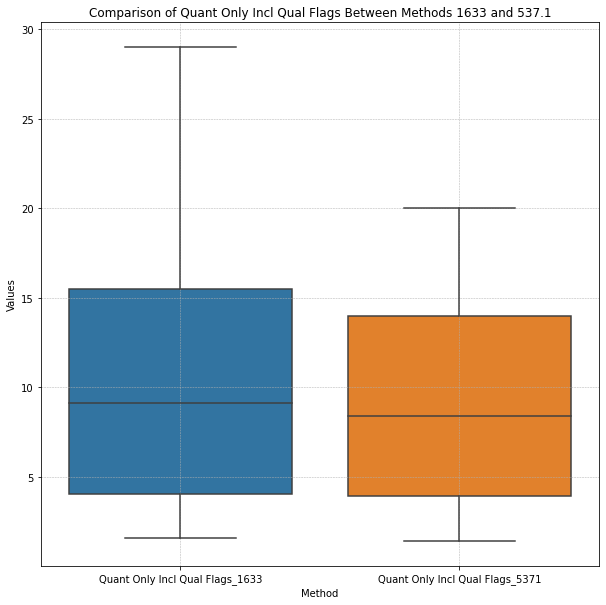

In [35]:
# To use seaborn, it's often easier to have the data in a "long" format
quant_df_long = pd.melt(quant_df, value_vars=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'], var_name='Method', value_name='Values')

# Create the boxplot
plt.figure(figsize=(10, 10))  # Optional: Adjust the figure size
sns.boxplot(x='Method', y='Values', data=quant_df_long, showfliers=False)
plt.title('Comparison of Quant Only Incl Qual Flags Between Methods 1633 and 537.1')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### PFAS Compounds by By PFAS Class

In [31]:
CarboxylicAcid_Long_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Long_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Long Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

NameError: name 'all_df' is not defined

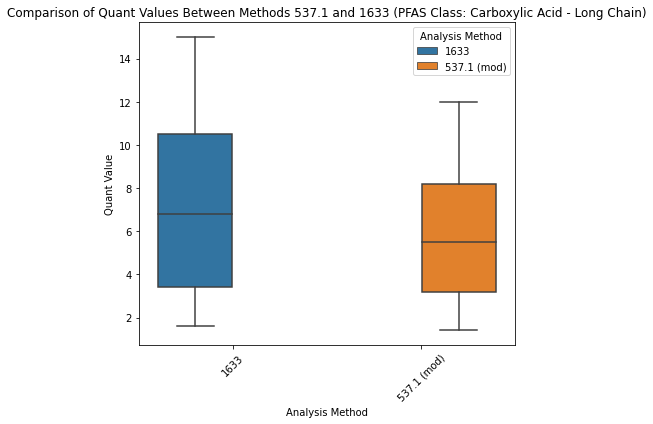

In [49]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.boxplot(x='Analysis Method', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Long_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Long Chain)')
plt.ylabel('Quant Value')
plt.xlabel('Analysis Method')
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.legend(title='Analysis Method')
plt.show()

In [40]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Long_df.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorodecanoic acid           6
Perfluorododecanoic acid         6
Perfluorononanoic acid           4
Perfluorooctanoic acid (PFOA)    8
Perfluoroundecanoic acid         6
dtype: int64


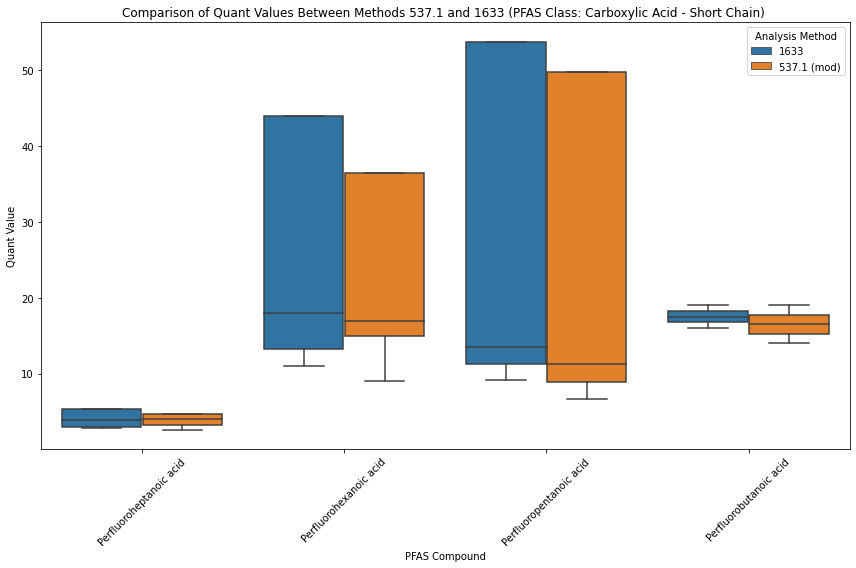

In [51]:
CarboxylicAcid_Short_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Short_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Short Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

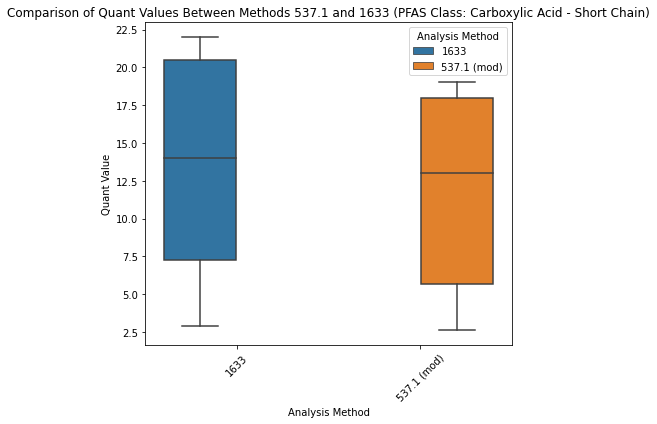

In [54]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.boxplot(x='Analysis Method', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Short_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Short Chain)')
plt.ylabel('Quant Value')
plt.xlabel('Analysis Method')
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.legend(title='Analysis Method')
plt.show()

In [55]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Short_df.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorobutanoic acid      4
Perfluoroheptanoic acid    10
Perfluorohexanoic acid      8
Perfluoropentanoic acid     8
dtype: int64


In [43]:
FluorotelomerSulfonicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)]
FluorotelomerSulfonicAcid_df

#temp=FluorotelomerSulfonicAcid_df.groupby('PFAS Compound')
#temp['Quant Only Incl Qual Flags'].describe()

Empty DataFrame
Columns: [Result, Analysis Method, Sample Location, Type, Sample Date, PFAS Compound, MDL, Detection Class, Quant Only Incl Qual Flags, Quant Incl Estimates Incl Qual Flags, All (w BDL= MDL/2) Incl Qual Flags, Units, ChainLength, Dominant Contributor, Sector, unique_key]
Index: []

In [44]:
FluorotelomerSulfonicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)]
plt.figure(figsize=(8, 6))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=FluorotelomerSulfonicAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Fluorotelomer Sulfonic Acid ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 576x432 with 0 Axes>

In [45]:
PerPolyfluorotherCarboxylicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)]
PerPolyfluorotherCarboxylicAcid_df

Empty DataFrame
Columns: [Result, Analysis Method, Sample Location, Type, Sample Date, PFAS Compound, MDL, Detection Class, Quant Only Incl Qual Flags, Quant Incl Estimates Incl Qual Flags, All (w BDL= MDL/2) Incl Qual Flags, Units, ChainLength, Dominant Contributor, Sector, unique_key]
Index: []

In [46]:
PerPolyfluorotherCarboxylicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=PerPolyfluorotherCarboxylicAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Fluorotelomer Sulfonic Acid) ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 864x576 with 0 Axes>

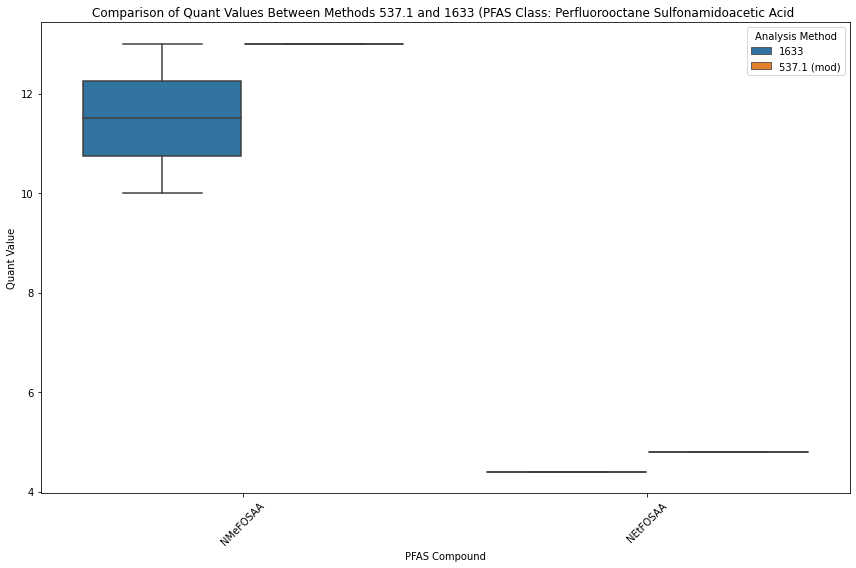

In [47]:
PerfluorooctaneSulfonamidoaceticAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamidoaceticAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [48]:
# Assuming your DataFrame is named df
grouped_counts = PerfluorooctaneSulfonamidoaceticAcid_df.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
NEtFOSAA    2
NMeFOSAA    4
dtype: int64


In [49]:
all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)]

Empty DataFrame
Columns: [Result, Analysis Method, Sample Location, Type, Sample Date, PFAS Compound, MDL, Detection Class, Quant Only Incl Qual Flags, Quant Incl Estimates Incl Qual Flags, All (w BDL= MDL/2) Incl Qual Flags, Units, ChainLength, Dominant Contributor, Sector, unique_key]
Index: []

In [50]:
PerfluorooctaneSulfonamideEthanol=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamideEthanol, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamide Ethanol ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 864x576 with 0 Axes>

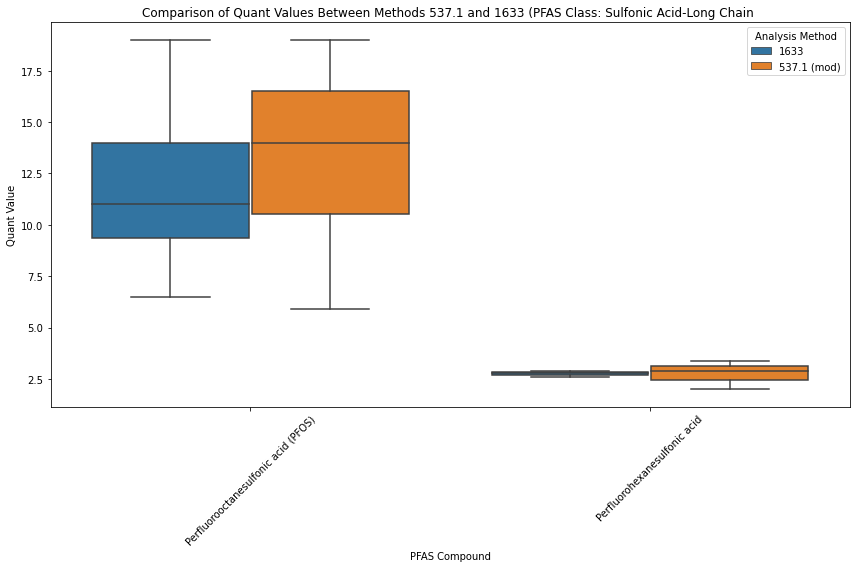

In [51]:
SulfonicAcid_Long=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Long Chain ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [52]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Long.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorohexanesulfonic acid            6
Perfluorooctanesulfonic acid (PFOS)    14
dtype: int64


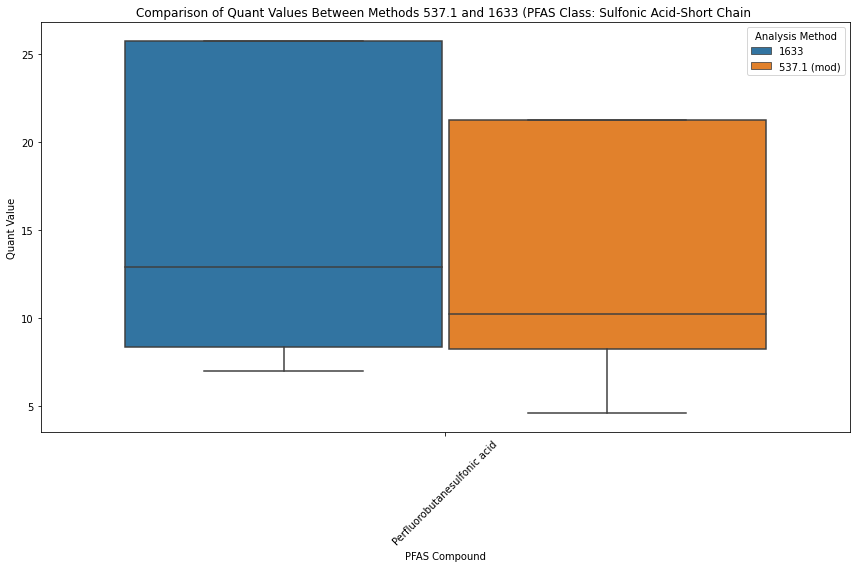

In [53]:
SulfonicAcid_Short=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Short, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Short Chain ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [54]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Short.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorobutanesulfonic acid    8
dtype: int64


### By Type

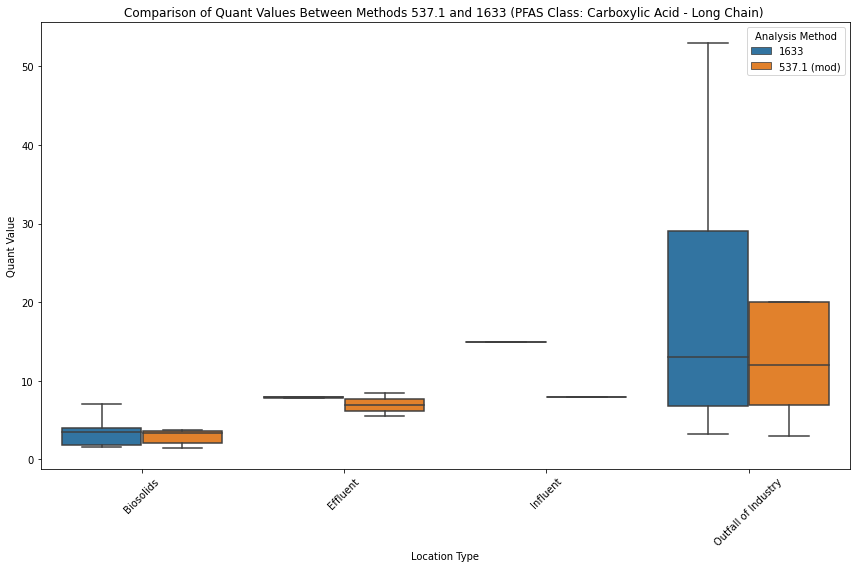

In [126]:
CarboxylicAcid_Long_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Long_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Long Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [114]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Long_df.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Biosolids              14
Effluent                4
Influent                2
Outfall of Industry    10
dtype: int64


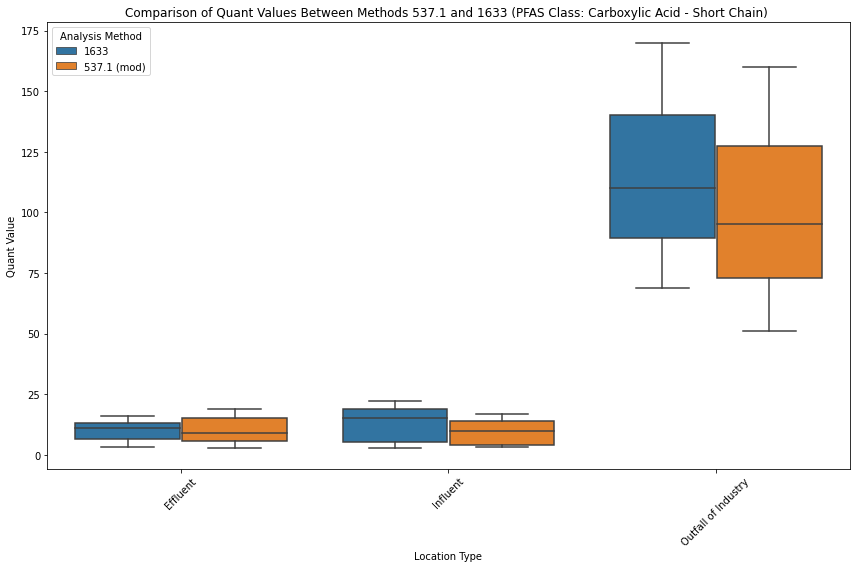

In [130]:
CarboxylicAcid_Short_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Short_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Short Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [131]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Short_df.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Effluent               14
Influent               10
Outfall of Industry     6
dtype: int64


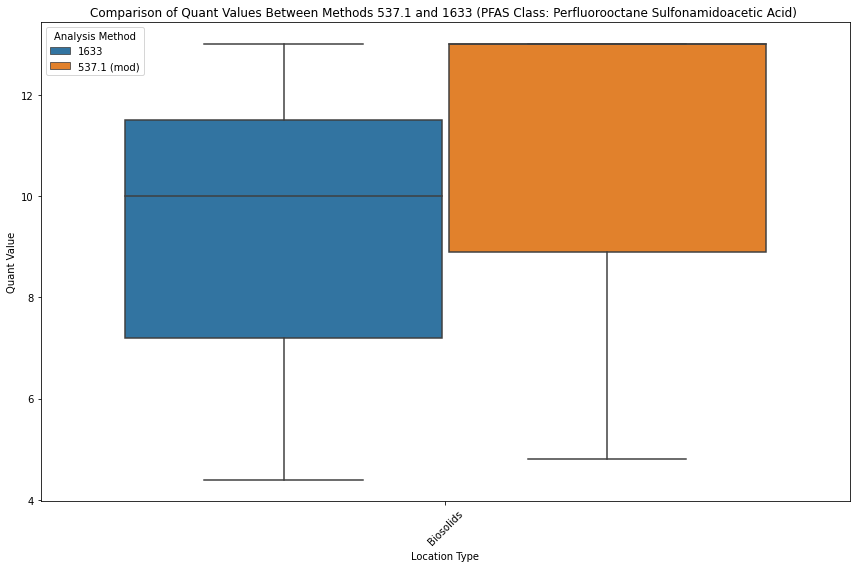

In [129]:
PerfluorooctaneSulfonamidoaceticAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamidoaceticAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [119]:
# Assuming your DataFrame is named df
grouped_counts = PerfluorooctaneSulfonamidoaceticAcid_df.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Biosolids    6
dtype: int64


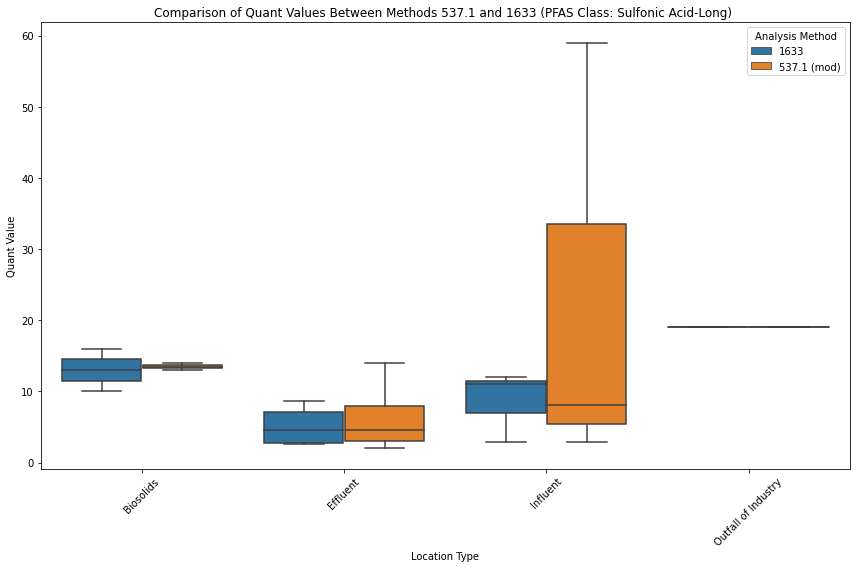

In [122]:
SulfonicAcid_Long=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Long) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [123]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Long.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Biosolids              4
Effluent               8
Influent               6
Outfall of Industry    2
dtype: int64


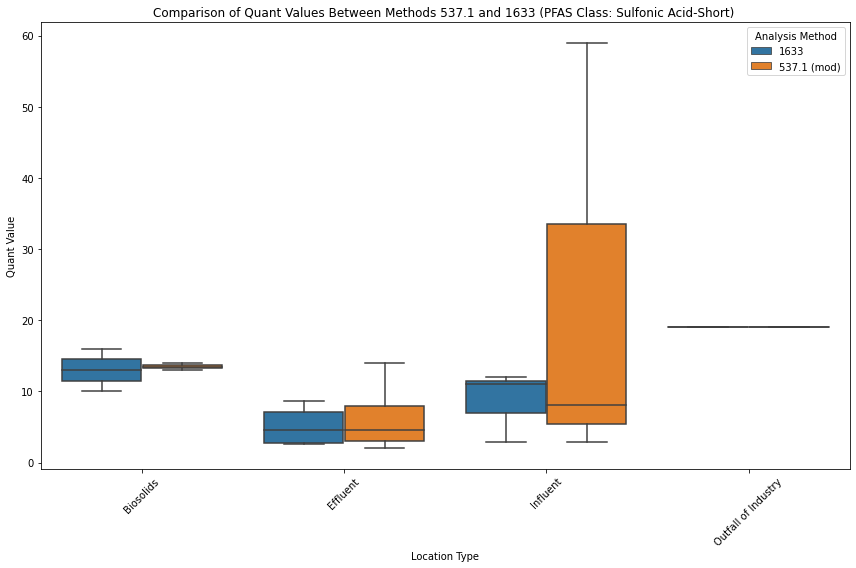

In [124]:
SulfonicAcid_Short=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Short) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [125]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Short.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Effluent               4
Influent               2
Outfall of Industry    2
dtype: int64


### By Location:

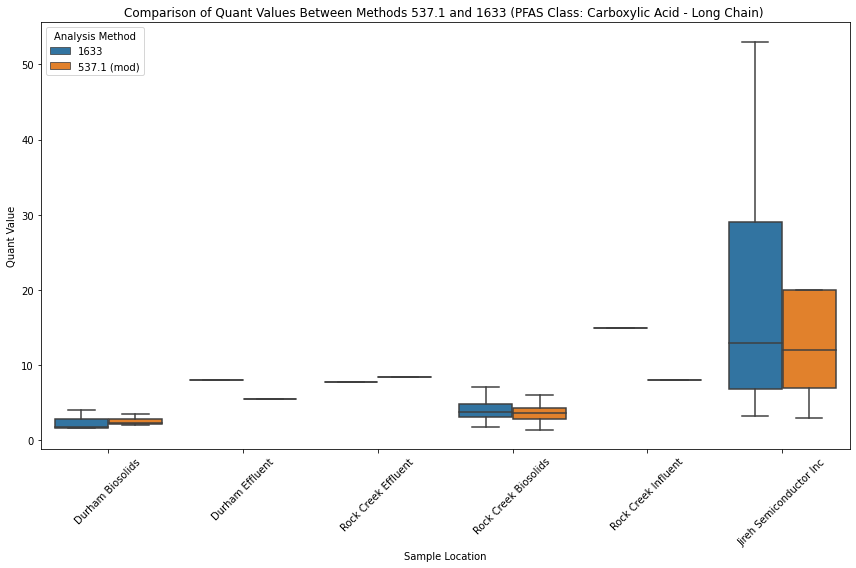

In [54]:
CarboxylicAcid_Long_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Long_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Long Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [56]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Long_df.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Biosolids            6
Durham Effluent             2
Jireh Semiconductor Inc    10
Rock Creek Biosolids        8
Rock Creek Effluent         2
Rock Creek Influent         2
dtype: int64


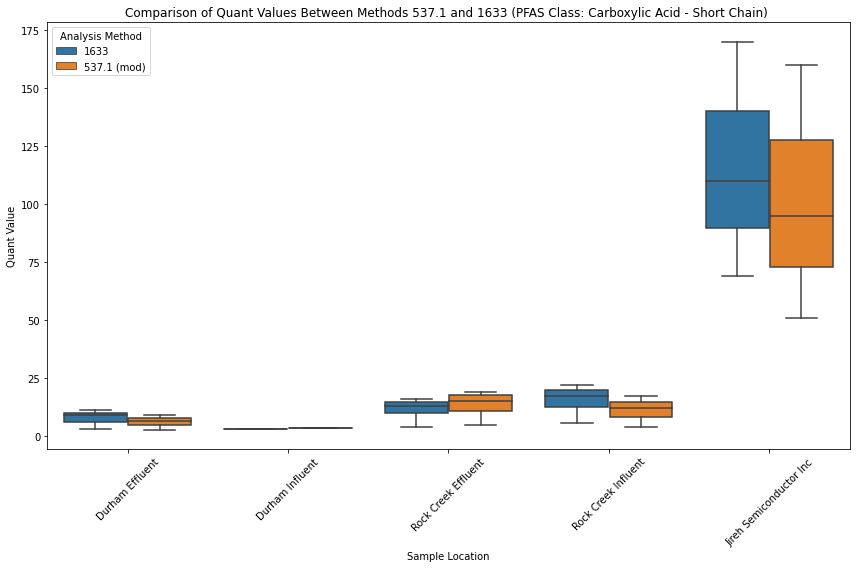

In [57]:
CarboxylicAcid_Short_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Short_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Short Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [58]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Short_df.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Effluent            6
Durham Influent            2
Jireh Semiconductor Inc    6
Rock Creek Effluent        8
Rock Creek Influent        8
dtype: int64


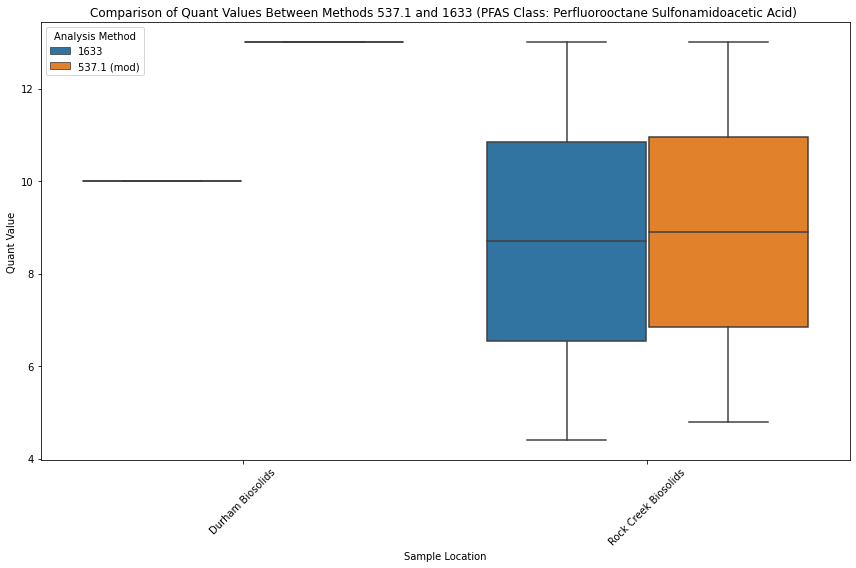

In [59]:
PerfluorooctaneSulfonamidoaceticAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamidoaceticAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [60]:
# Assuming your DataFrame is named df
grouped_counts = PerfluorooctaneSulfonamidoaceticAcid_df.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Biosolids        2
Rock Creek Biosolids    4
dtype: int64


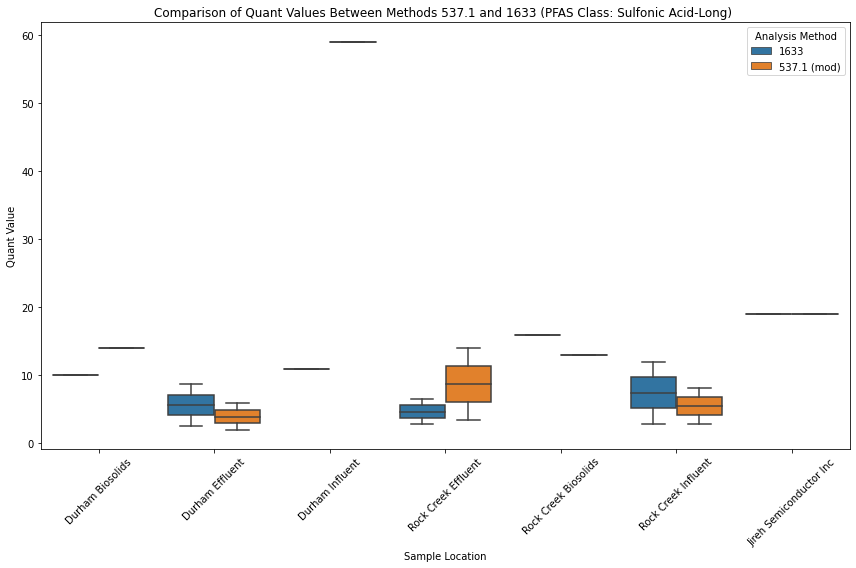

In [61]:
SulfonicAcid_Long=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Long) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [62]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Long.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Biosolids           2
Durham Effluent            4
Durham Influent            2
Jireh Semiconductor Inc    2
Rock Creek Biosolids       2
Rock Creek Effluent        4
Rock Creek Influent        4
dtype: int64


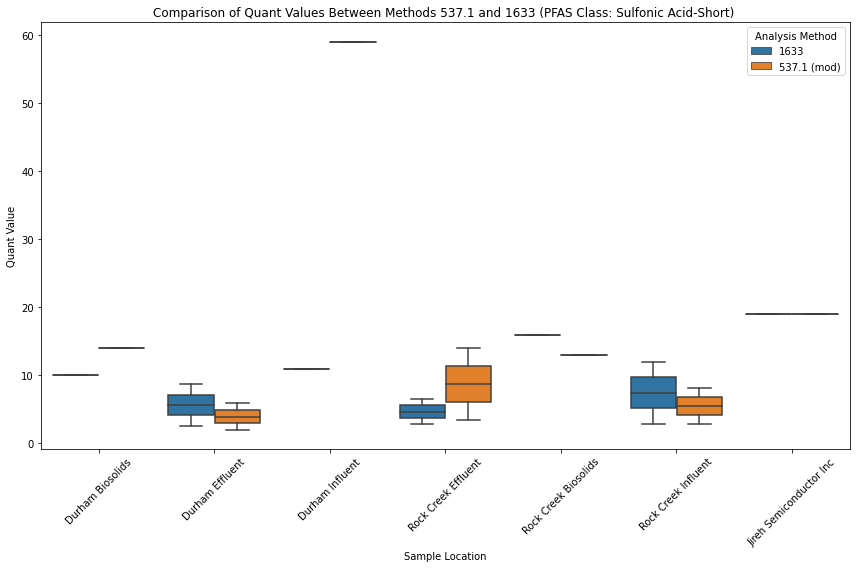

In [63]:
SulfonicAcid_Short=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Short) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [64]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Short.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Effluent            2
Jireh Semiconductor Inc    2
Rock Creek Effluent        2
Rock Creek Influent        2
dtype: int64


## 1633 vs 537.1 PFAS Concentration Plots

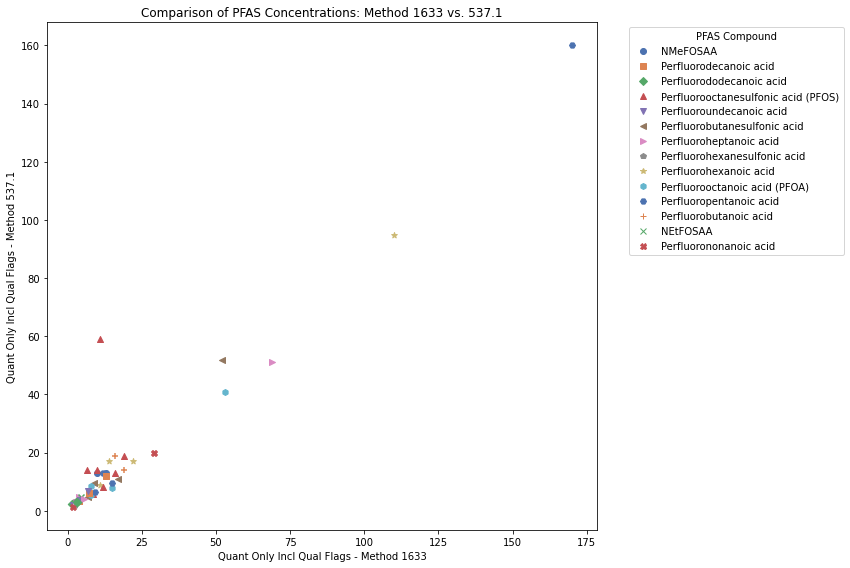

In [31]:
# Example list of markers and colors
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("deep", n_colors=len(quant_df['PFAS Compound_1633'].unique()))

# Get unique PFAS compounds
unique_compounds = quant_df['PFAS Compound_1633'].unique()

# Create a dictionary mapping each compound to a marker and color
compound_style_map = {compound: (marker, color) for compound, marker, color in zip(unique_compounds, itertools.cycle(markers), itertools.cycle(colors))}

plt.figure(figsize=(12, 8))

# Create a legend map to handle duplicate labels
legend_map = {}

# Iterate over DataFrame rows
for _, row in quant_df.iterrows():
    marker, color = compound_style_map[row['PFAS Compound_1633']]
    plt.scatter(row['Quant Only Incl Qual Flags_1633'], row['Quant Only Incl Qual Flags_5371'], 
                marker=marker, color=color, label=row['PFAS Compound_1633'])
    
    # Update legend map
    if row['PFAS Compound_1633'] not in legend_map:
        legend_map[row['PFAS Compound_1633']] = (marker, color)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker=style[0], color=style[1], label=compound, linestyle='None') 
                   for compound, style in legend_map.items()]
plt.legend(handles=legend_elements, title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Comparison of PFAS Concentrations: Method 1633 vs. 537.1')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.tight_layout()
plt.show()


### PFAS Compounds

c:\Users\rodriguezc\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


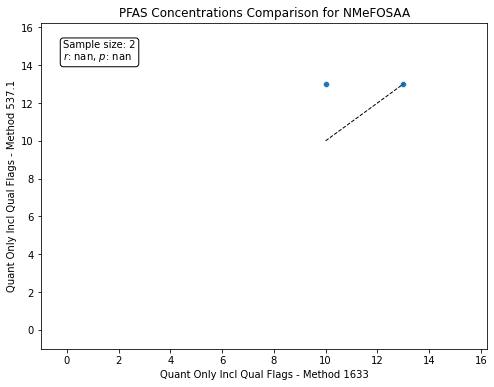

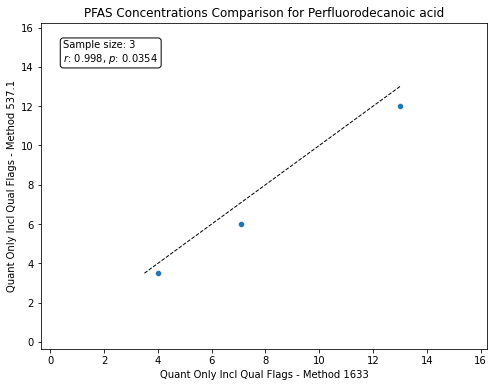

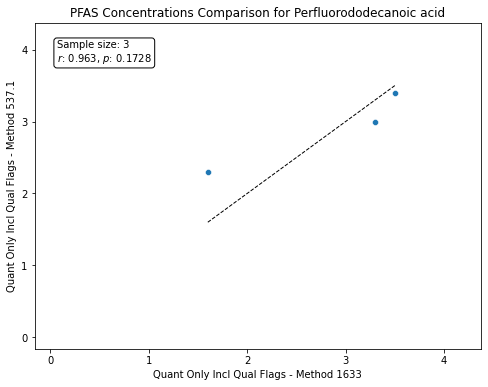

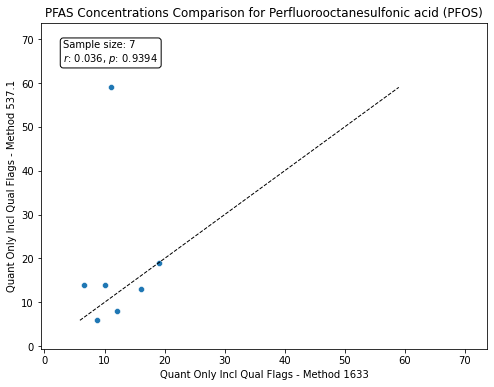

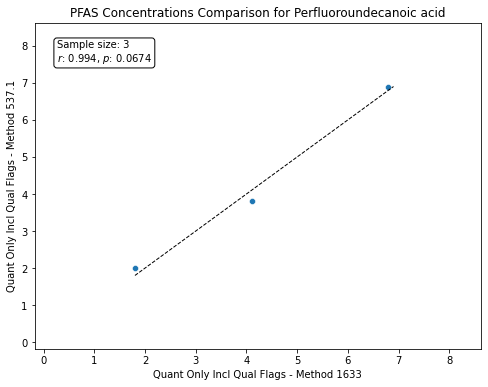

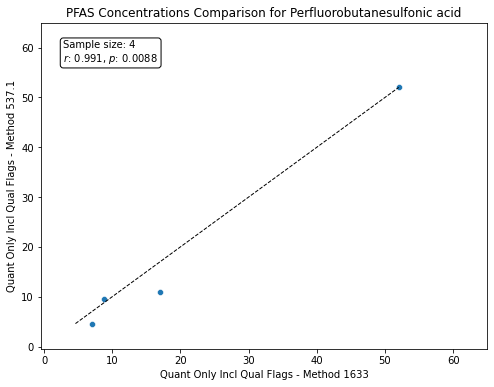

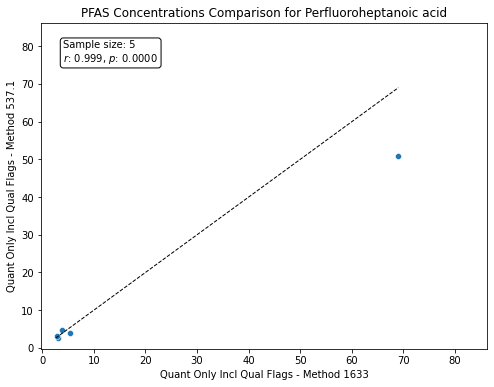

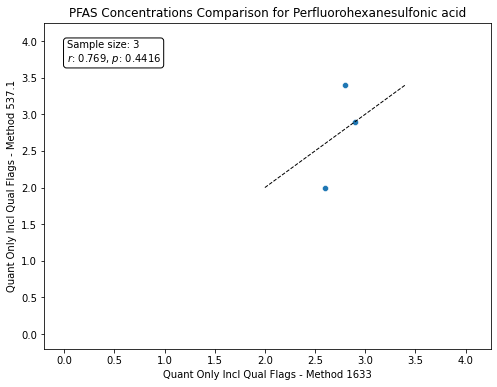

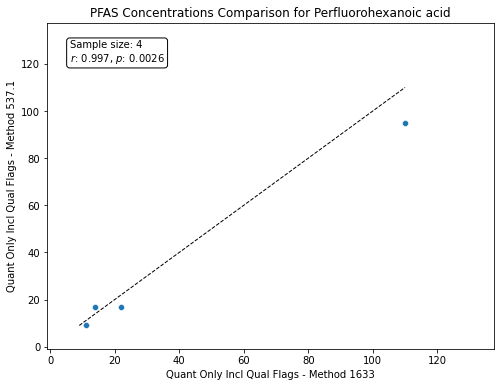

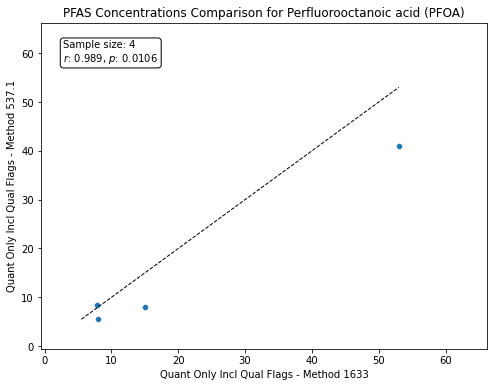

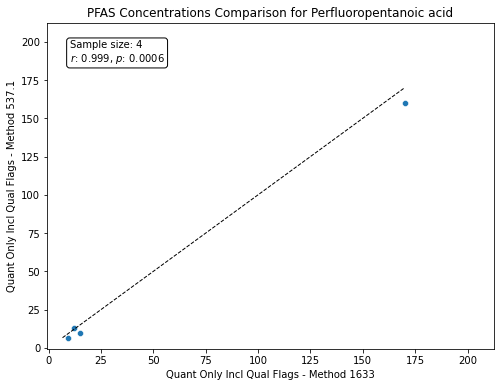

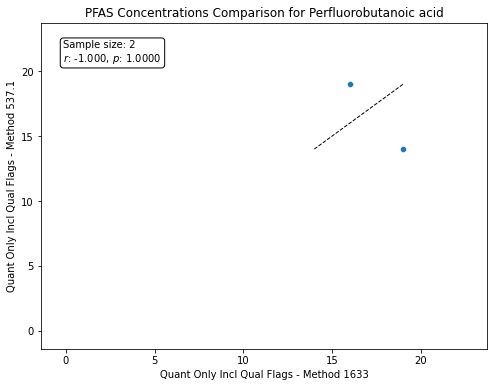

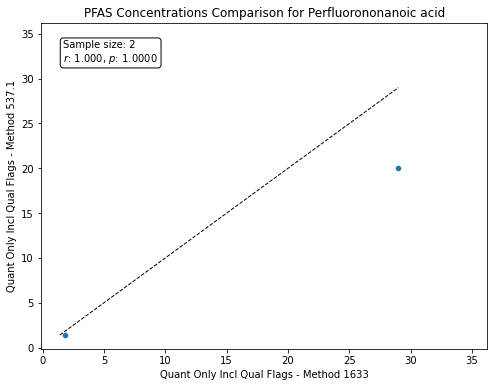

In [56]:
# Get unique PFAS compounds
unique_compounds = quant_df['PFAS Compound_1633'].unique()

# Iterate through each unique compound and create a scatter plot
for compound in unique_compounds:
    # Filter the DataFrame for the current compound
    compound_df = quant_df[quant_df['PFAS Compound_1633'] == compound].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
    
    # Ensure there are at least two data points
    if len(compound_df) >= 2:
        # Calculate local min and max for the current compound's data
        local_min = min(compound_df['Quant Only Incl Qual Flags_1633'].min(), compound_df['Quant Only Incl Qual Flags_5371'].min())
        local_max = max(compound_df['Quant Only Incl Qual Flags_1633'].max(), compound_df['Quant Only Incl Qual Flags_5371'].max())
        
        # Calculate Pearson correlation coefficient and p-value
        r_value, p_value = scipy.stats.pearsonr(compound_df['Quant Only Incl Qual Flags_1633'], compound_df['Quant Only Incl Qual Flags_5371'])
        sample_size = len(compound_df)
        
        # Create the scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=compound_df, x='Quant Only Incl Qual Flags_1633', y='Quant Only Incl Qual Flags_5371')
        
        # Set the same limits for both axes based on local min and max
        plt.xlim(local_min*-.1, local_max*1.25)
        plt.ylim(local_min*-.1, local_max*1.25)
        
        # Adding plot titles and labels
        plt.title(f'PFAS Concentrations Comparison for {compound}')
        plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
        plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
        
        # Adding a diagonal line to indicate where x = y
        plt.plot([local_min, local_max], [local_min, local_max], 'k--', linewidth=1)
        
        # Annotate plot with statistics
        plt.annotate(f'Sample size: {sample_size}\n$r$: {r_value:.3f}, $p$: {p_value:.4f}', 
                    xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
        
        # Show plot
        plt.show()


### Scatter Plots for PFAS Class

In [132]:
def calculate_confidence_interval(r, sample_size, confidence_level=0.95):
    """
    Calculate the confidence interval for a Pearson correlation coefficient using Fisher's z-transformation.
    
    Args:
        r (float): The Pearson correlation coefficient.
        sample_size (int): The number of observations.
        confidence_level (float): The confidence level for the interval.
        
    Returns:
        tuple: The lower and upper bounds of the confidence interval for the correlation coefficient.
    """
    z = np.arctanh(r)
    se = 1 / np.sqrt(sample_size - 3)
    z_critical = scipy.stats.norm.ppf(1 - (1 - confidence_level) / 2)
    z_ci_lower, z_ci_upper = z - z_critical * se, z + z_critical * se
    r_ci_lower, r_ci_upper = np.tanh(z_ci_lower), np.tanh(z_ci_upper)
    
    return r_ci_lower, r_ci_upper


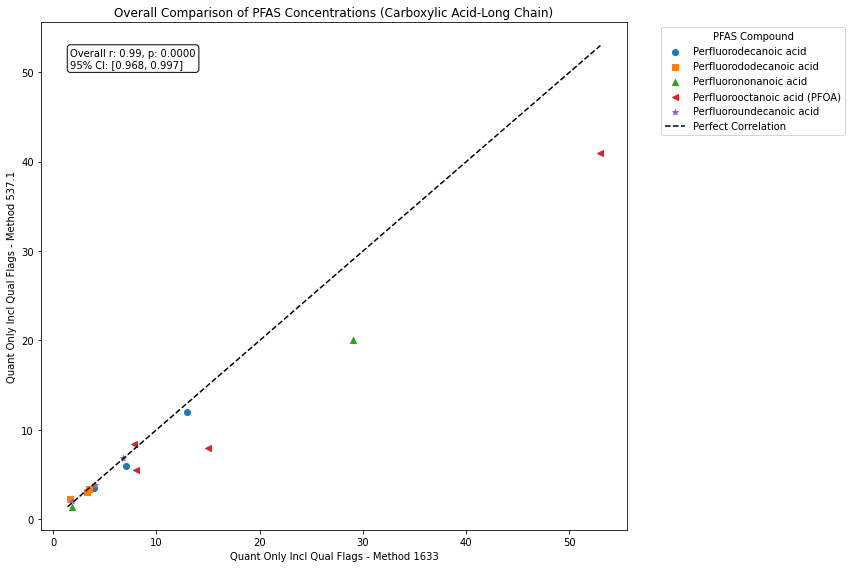

In [58]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_CarboxylicAcid_Long))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_CarboxylicAcid_Long, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Carboxylic Acid-Long Chain)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [59]:
len(filtered_df)

15

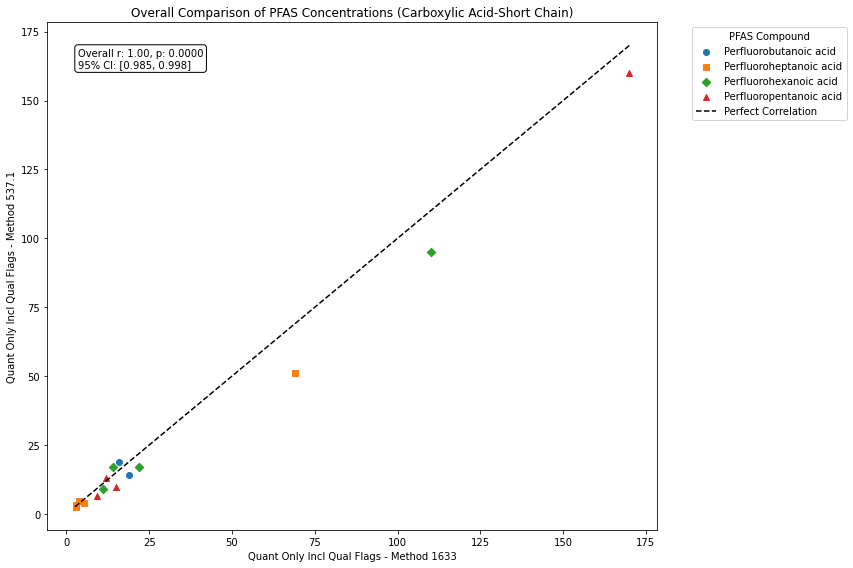

In [60]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_CarboxylicAcid_Short))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_CarboxylicAcid_Short, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Carboxylic Acid-Short Chain)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [61]:
len(filtered_df)

15

In [62]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_FluorotelomerSulfonicAcid))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_FluorotelomerSulfonicAcid, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Fluorotelomer Sulfonic Acid)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: x and y must have length at least 2.

In [63]:
len(filtered_df)

0

In [64]:
filtered_df

Empty DataFrame
Columns: [Result_1633, Analysis Method_1633, Sample Location_1633, Type_1633, Sample Date_1633, PFAS Compound_1633, MDL_1633, Detection Class_1633, Quant Only Incl Qual Flags_1633, Quant Incl Estimates Incl Qual Flags_1633, All (w BDL= MDL/2) Incl Qual Flags_1633, Units_1633, ChainLength_1633, Dominant Contributor_1633, Sector_1633, unique_key, Result_5371, Analysis Method_5371, Sample Location_5371, Type_5371, Sample Date_5371, PFAS Compound_5371, MDL_5371, Detection Class_5371, Quant Only Incl Qual Flags_5371, Quant Incl Estimates Incl Qual Flags_5371, All (w BDL= MDL/2) Incl Qual Flags_5371, Units_5371, ChainLength_5371, Dominant Contributor_5371, Sector_5371]
Index: []

[0 rows x 31 columns]

In [65]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_PerPolyfluorotherCarboxylicAcid))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_PerPolyfluorotherCarboxylicAcid, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Per-Polyfluorother Carboxylic Acid)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: x and y must have length at least 2.

In [66]:
filtered_df

Empty DataFrame
Columns: [Result_1633, Analysis Method_1633, Sample Location_1633, Type_1633, Sample Date_1633, PFAS Compound_1633, MDL_1633, Detection Class_1633, Quant Only Incl Qual Flags_1633, Quant Incl Estimates Incl Qual Flags_1633, All (w BDL= MDL/2) Incl Qual Flags_1633, Units_1633, ChainLength_1633, Dominant Contributor_1633, Sector_1633, unique_key, Result_5371, Analysis Method_5371, Sample Location_5371, Type_5371, Sample Date_5371, PFAS Compound_5371, MDL_5371, Detection Class_5371, Quant Only Incl Qual Flags_5371, Quant Incl Estimates Incl Qual Flags_5371, All (w BDL= MDL/2) Incl Qual Flags_5371, Units_5371, ChainLength_5371, Dominant Contributor_5371, Sector_5371]
Index: []

[0 rows x 31 columns]

<ipython-input-57-1e6c5671256a>:14: RuntimeWarning: divide by zero encountered in double_scalars
  se = 1 / np.sqrt(sample_size - 3)


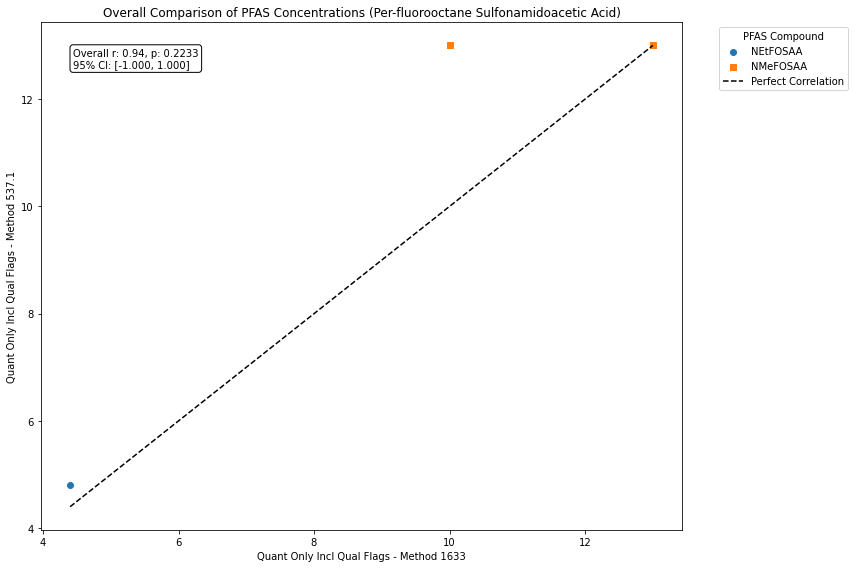

In [67]:

# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Per-fluorooctane Sulfonamidoacetic Acid)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [68]:
len(filtered_df)

3

In [69]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_PerfluorooctaneSulfonamideEthanol))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_PerfluorooctaneSulfonamideEthanol, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Per-fluorooctane Sulfonamide Ethanol)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: x and y must have length at least 2.

In [70]:
len(filtered_df)

0

In [71]:
filtered_df

Empty DataFrame
Columns: [Result_1633, Analysis Method_1633, Sample Location_1633, Type_1633, Sample Date_1633, PFAS Compound_1633, MDL_1633, Detection Class_1633, Quant Only Incl Qual Flags_1633, Quant Incl Estimates Incl Qual Flags_1633, All (w BDL= MDL/2) Incl Qual Flags_1633, Units_1633, ChainLength_1633, Dominant Contributor_1633, Sector_1633, unique_key, Result_5371, Analysis Method_5371, Sample Location_5371, Type_5371, Sample Date_5371, PFAS Compound_5371, MDL_5371, Detection Class_5371, Quant Only Incl Qual Flags_5371, Quant Incl Estimates Incl Qual Flags_5371, All (w BDL= MDL/2) Incl Qual Flags_5371, Units_5371, ChainLength_5371, Dominant Contributor_5371, Sector_5371]
Index: []

[0 rows x 31 columns]

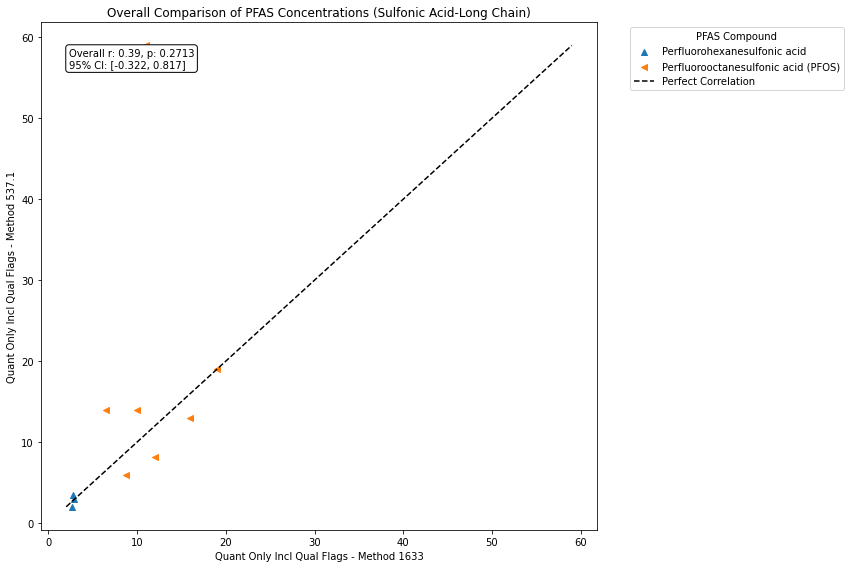

In [72]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_SulfonicAcid_Long))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_SulfonicAcid_Long, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Sulfonic Acid-Long Chain)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
len(filtered_df)

10

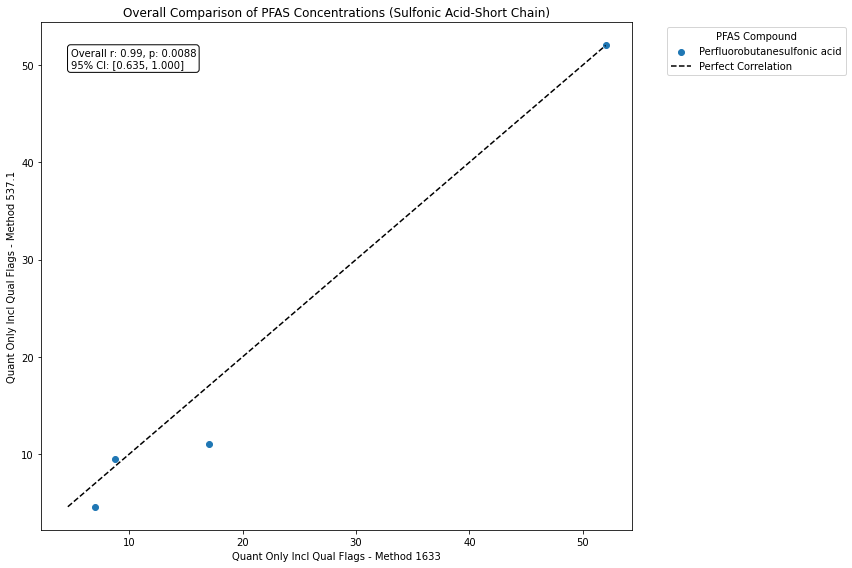

In [74]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_SulfonicAcid_Short))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_SulfonicAcid_Short, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Sulfonic Acid-Short Chain)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
len(filtered_df)

4

In [76]:
quant_df['PFAS Compound_1633'].unique()

array(['NMeFOSAA', 'Perfluorodecanoic acid', 'Perfluorododecanoic acid',
       'Perfluorooctanesulfonic acid (PFOS)', 'Perfluoroundecanoic acid',
       'Perfluorobutanesulfonic acid', 'Perfluoroheptanoic acid',
       'Perfluorohexanesulfonic acid', 'Perfluorohexanoic acid',
       'Perfluorooctanoic acid (PFOA)', 'Perfluoropentanoic acid',
       'Perfluorobutanoic acid', 'NEtFOSAA', 'Perfluorononanoic acid'],
      dtype=object)

### By Type

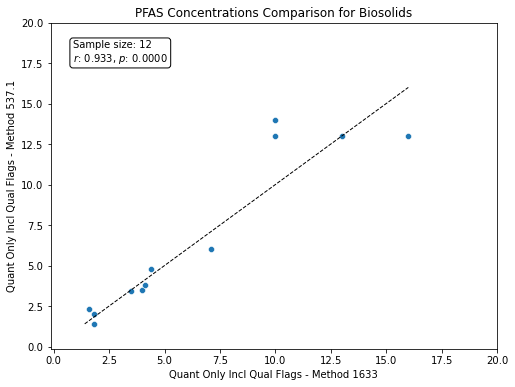

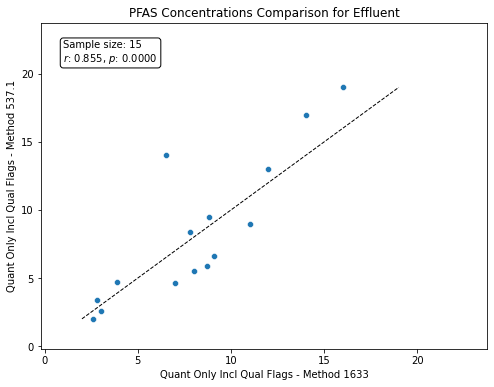

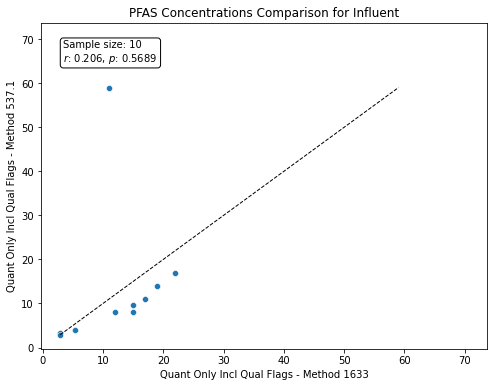

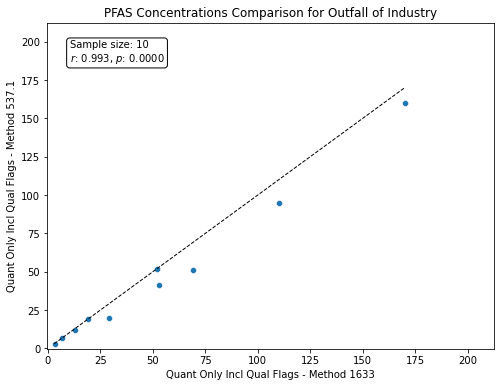

In [135]:
# Get unique PFAS compounds
unique_Types = quant_df['Type_1633'].unique()

# Iterate through each unique compound and creaTypete a scatter plot
for Type in unique_Types:
    # Filter the DataFrame for the current compound
    Type_df = quant_df[quant_df['Type_1633'] == Type].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
    
    # Ensure there are at least two data points
    if len(Type_df) >= 2:
        # Calculate local min and max for the current compound's data
        local_min = min(Type_df['Quant Only Incl Qual Flags_1633'].min(), Type_df['Quant Only Incl Qual Flags_5371'].min())
        local_max = max(Type_df['Quant Only Incl Qual Flags_1633'].max(), Type_df['Quant Only Incl Qual Flags_5371'].max())
        
        # Calculate Pearson correlation coefficient and p-value
        r_value, p_value = scipy.stats.pearsonr(Type_df['Quant Only Incl Qual Flags_1633'], Type_df['Quant Only Incl Qual Flags_5371'])
        sample_size = len(Type_df)
        
        # Create the scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=Type_df, x='Quant Only Incl Qual Flags_1633', y='Quant Only Incl Qual Flags_5371')
        
        # Set the same limits for both axes based on local min and max
        plt.xlim(local_min*-.1, local_max*1.25)
        plt.ylim(local_min*-.1, local_max*1.25)
        
        # Adding plot titles and labels
        plt.title(f'PFAS Concentrations Comparison for {Type}')
        plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
        plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
        
        # Adding a diagonal line to indicate where x = y
        plt.plot([local_min, local_max], [local_min, local_max], 'k--', linewidth=1)
        
        # Annotate plot with statistics
        plt.annotate(f'Sample size: {sample_size}\n$r$: {r_value:.3f}, $p$: {p_value:.4f}', 
                    xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
        
        # Show plot
        plt.show()


### By Sample Location

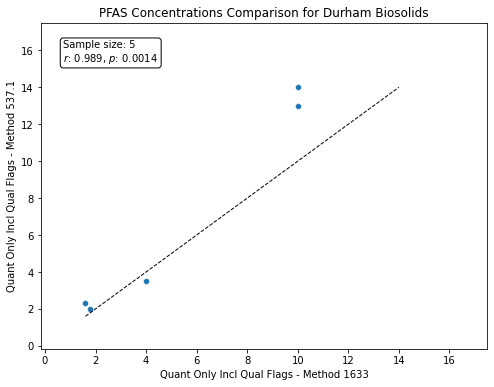

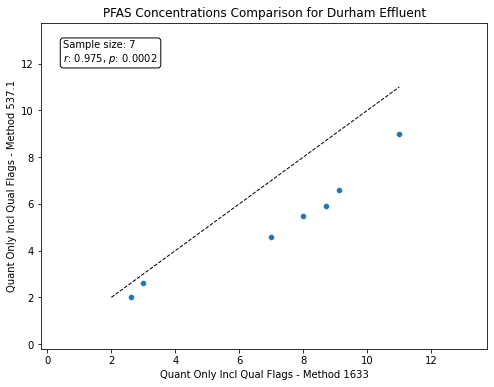

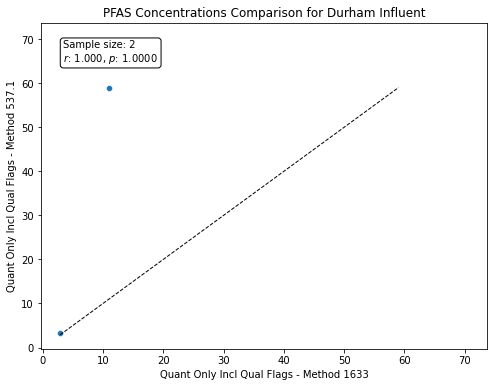

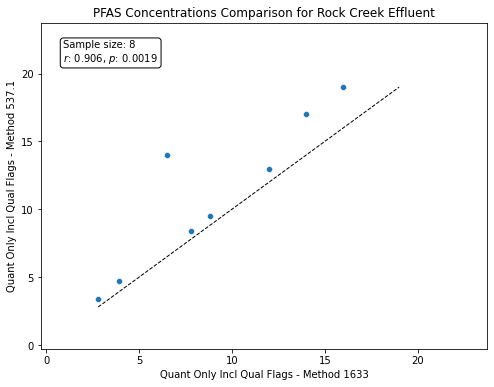

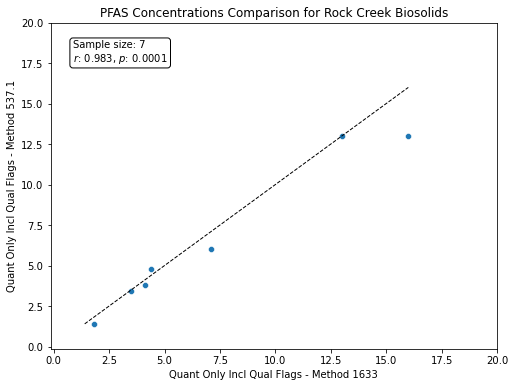

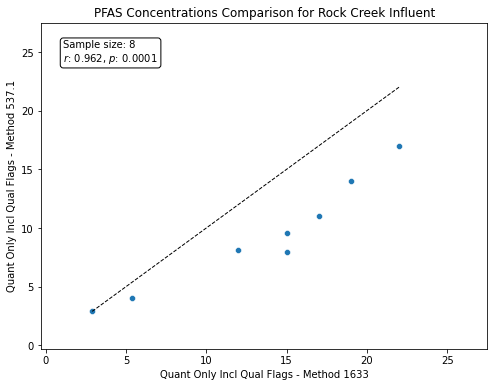

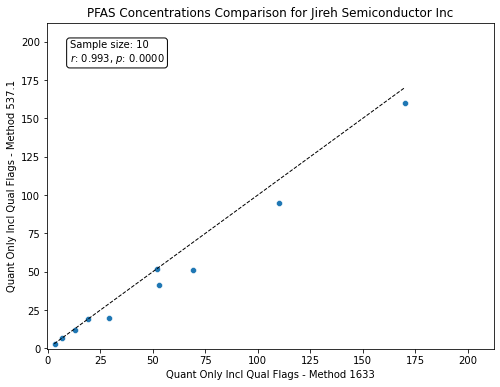

In [32]:
# Get unique PFAS compounds
unique_Locations = quant_df['Sample Location_1633'].unique()

# Iterate through each unique compound and creaTypete a scatter plot
for Location in unique_Locations:
    # Filter the DataFrame for the current compound
    Location_df = quant_df[quant_df['Sample Location_1633'] == Location].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
    
    # Ensure there are at least two data points
    if len(Location_df) >= 2:
        # Calculate local min and max for the current compound's data
        local_min = min(Location_df['Quant Only Incl Qual Flags_1633'].min(), Location_df['Quant Only Incl Qual Flags_5371'].min())
        local_max = max(Location_df['Quant Only Incl Qual Flags_1633'].max(), Location_df['Quant Only Incl Qual Flags_5371'].max())
        
        # Calculate Pearson correlation coefficient and p-value
        r_value, p_value = scipy.stats.pearsonr(Location_df['Quant Only Incl Qual Flags_1633'], Location_df['Quant Only Incl Qual Flags_5371'])
        sample_size = len(Location_df)
        
        # Create the scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=Location_df, x='Quant Only Incl Qual Flags_1633', y='Quant Only Incl Qual Flags_5371')
        
        # Set the same limits for both axes based on local min and max
        plt.xlim(local_min*-.1, local_max*1.25)
        plt.ylim(local_min*-.1, local_max*1.25)
        
        # Adding plot titles and labels
        plt.title(f'PFAS Concentrations Comparison for {Location}')
        plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
        plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
        
        # Adding a diagonal line to indicate where x = y
        plt.plot([local_min, local_max], [local_min, local_max], 'k--', linewidth=1)
        
        # Annotate plot with statistics
        plt.annotate(f'Sample size: {sample_size}\n$r$: {r_value:.3f}, $p$: {p_value:.4f}', 
                    xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
        
        # Show plot
        plt.show()

#### Custom plot For Durham and Rock Creek Biosolids

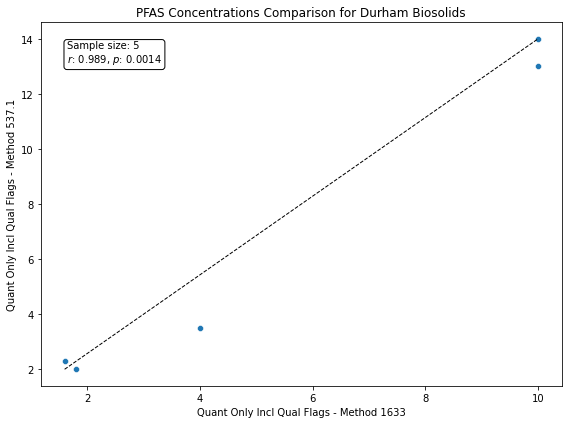

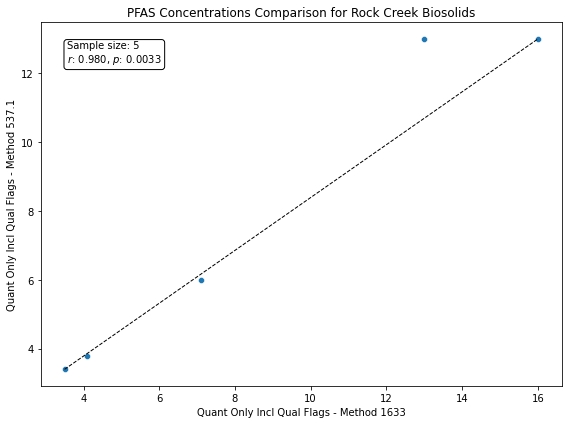

In [34]:
# Define the locations of interest
locations_of_interest = ['Durham Biosolids', 'Rock Creek Biosolids']

# Find common PFAS compounds in both locations
durham_df = quant_df[quant_df['Sample Location_1633'] == 'Durham Biosolids']
rock_creek_df = quant_df[quant_df['Sample Location_1633'] == 'Rock Creek Biosolids']
common_compounds = set(durham_df['PFAS Compound_1633']).intersection(set(rock_creek_df['PFAS Compound_1633']))

# Filter dataframes to only include common compounds
durham_common_df = durham_df[durham_df['PFAS Compound_1633'].isin(common_compounds)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
rock_creek_common_df = rock_creek_df[rock_creek_df['PFAS Compound_1633'].isin(common_compounds)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Function to create scatter plot for a given location and dataframe
def create_scatter_plot(location, df):
    if len(df) >= 2:
        # Calculate Pearson correlation coefficient and p-value
        r_value, p_value = scipy.stats.pearsonr(df['Quant Only Incl Qual Flags_1633'], df['Quant Only Incl Qual Flags_5371'])
        sample_size = len(df)
        
        # Create the scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x='Quant Only Incl Qual Flags_1633', y='Quant Only Incl Qual Flags_5371')
        plt.plot([df['Quant Only Incl Qual Flags_1633'].min(), df['Quant Only Incl Qual Flags_1633'].max()], 
                 [df['Quant Only Incl Qual Flags_5371'].min(), df['Quant Only Incl Qual Flags_5371'].max()], 'k--', linewidth=1)
        plt.title(f'PFAS Concentrations Comparison for {location}')
        plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
        plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
        plt.annotate(f'Sample size: {sample_size}\n$r$: {r_value:.3f}, $p$: {p_value:.4f}', 
                     xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                     bbox=dict(boxstyle='round', fc='w'))
        plt.tight_layout()
        plt.show()

# Create scatter plots for each location of interest with common PFAS compounds
for location in locations_of_interest:
    if location == 'Durham Biosolids':
        create_scatter_plot(location, durham_common_df)
    elif location == 'Rock Creek Biosolids':
        create_scatter_plot(location, rock_creek_common_df)


## Bland-Altman plot

In [29]:
def bootstrap_mean_ci(data, n_bootstraps=10000, ci=95):
    """
    Bootstraps the mean of a dataset and calculates the confidence interval of the mean.
    
    Parameters:
    - data: array-like, the dataset from which to bootstrap.
    - n_bootstraps: int, the number of bootstrap samples to draw.
    - ci: float, the confidence interval percentage.
    
    Returns:
    - mean_ci_lower: float, the lower bound of the confidence interval.
    - mean_ci_upper: float, the upper bound of the confidence interval.
    - bootstrapped_means: array, the bootstrapped means.
    """
    bootstrapped_means = []
    for _ in range(n_bootstraps):
        # Sample with replacement and calculate the mean
        sample = np.random.choice(data, size=len(data), replace=True)
        sample_mean = np.mean(sample)
        bootstrapped_means.append(sample_mean)
    
    # Calculate the confidence interval
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    mean_ci_lower = np.percentile(bootstrapped_means, lower_percentile)
    mean_ci_upper = np.percentile(bootstrapped_means, upper_percentile)
    
    return mean_ci_lower, mean_ci_upper, bootstrapped_means


### All Quant

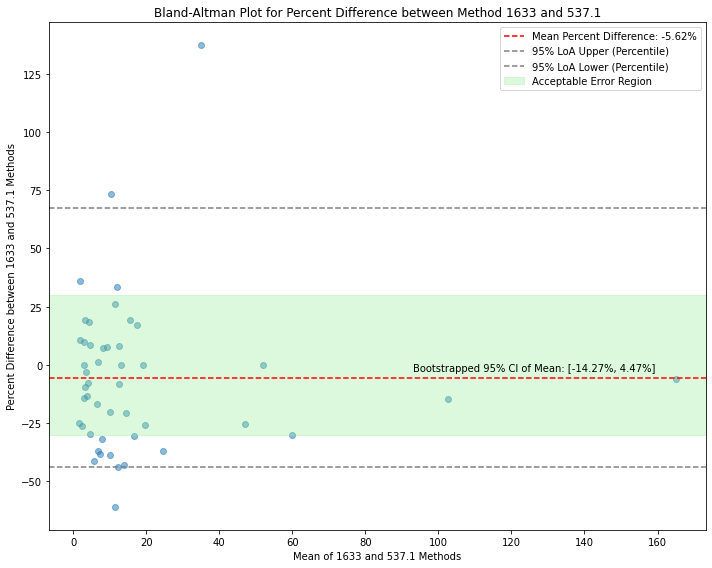

In [39]:
# Assuming method1 and method2 are your data series from the DataFrame
method1 = quant_df['Quant Only Incl Qual Flags_1633']
method2 = quant_df['Quant Only Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Calculate the mean percent difference
mean_percent_diff = np.mean(percent_diff)

# Bootstrap to estimate the CI of the mean percent difference
# Correctly unpack the returned values, ignoring bootstrapped_means
ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

# Calculate the 2.5th and 97.5th percentiles of the percent differences for the LoA
loa_lower = np.percentile(percent_diff, 2.5)
loa_upper = np.percentile(percent_diff, 97.5)

# Generate the Bland-Altman plot for percent difference
plt.figure(figsize=(10, 8))
plt.scatter(means, percent_diff, alpha=0.5)
plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}%')
plt.axhline(loa_upper, color='gray', linestyle='--', label='95% LoA Upper (Percentile)')
plt.axhline(loa_lower, color='gray', linestyle='--', label='95% LoA Lower (Percentile)')

# Determine new xmin and xmax based on the means data range and extend them a bit
xmin, xmax = min(means), max(means)
xrange_extension = (xmax - xmin) * 0.05  # Extend the range by 5% on each side
xmin_extended, xmax_extended = xmin - xrange_extension, xmax + xrange_extension

# Shade the region of acceptable error (±30% Percent Error) using the extended range
plt.fill_betweenx(y=[-30, 30], x1=xmin_extended, x2=xmax_extended, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

# Now, explicitly set the x-axis limits to include the extended range
plt.xlim(xmin_extended, xmax_extended)

# Annotate the plot with the bootstrapped CI of the mean percent difference
plt.annotate(f'Bootstrapped 95% CI of Mean: [{ci_lower:.2f}%, {ci_upper:.2f}%]', xy=(xmax*0.95, np.mean(percent_diff)), xytext=(10,10), textcoords='offset points', ha='right', va='center')


plt.title('Bland-Altman Plot for Percent Difference between Method 1633 and 537.1')
plt.xlabel('Mean of 1633 and 537.1 Methods')
plt.ylabel('Percent Difference between 1633 and 537.1 Methods')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



### By PFAS Compound

In [66]:
# Assuming merged_df is your DataFrame and 'PFAS Compound_1633' is the column you want to group by
grouped_counts = quant_df.groupby('PFAS Compound_1633').size()

# To display the counts for each group
print(grouped_counts)

PFAS Compound_1633
NEtFOSAA                               1
NMeFOSAA                               2
Perfluorobutanesulfonic acid           4
Perfluorobutanoic acid                 2
Perfluorodecanoic acid                 3
Perfluorododecanoic acid               3
Perfluoroheptanoic acid                5
Perfluorohexanesulfonic acid           3
Perfluorohexanoic acid                 4
Perfluorononanoic acid                 2
Perfluorooctanesulfonic acid (PFOS)    7
Perfluorooctanoic acid (PFOA)          4
Perfluoropentanoic acid                4
Perfluoroundecanoic acid               3
dtype: int64


Not enough data for NEtFOSAA to generate a Bland-Altman plot.


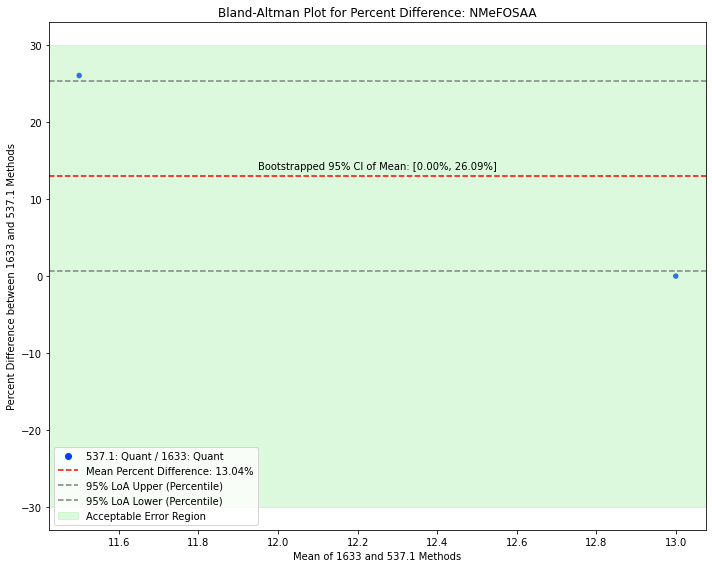

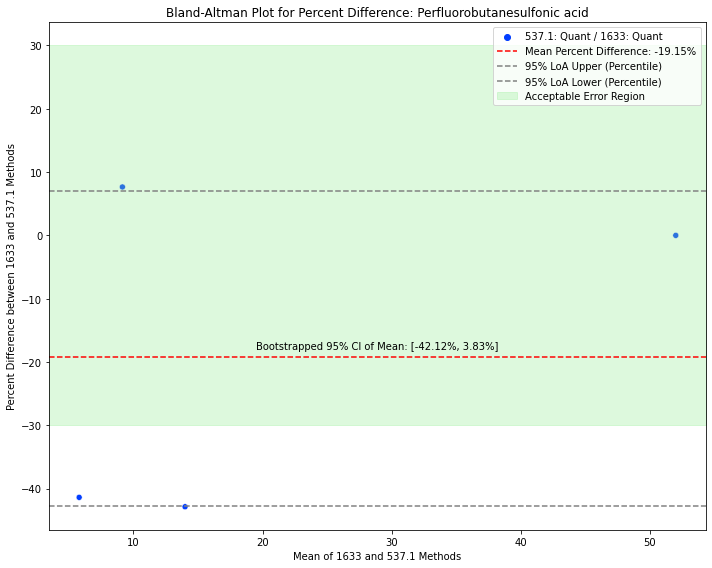

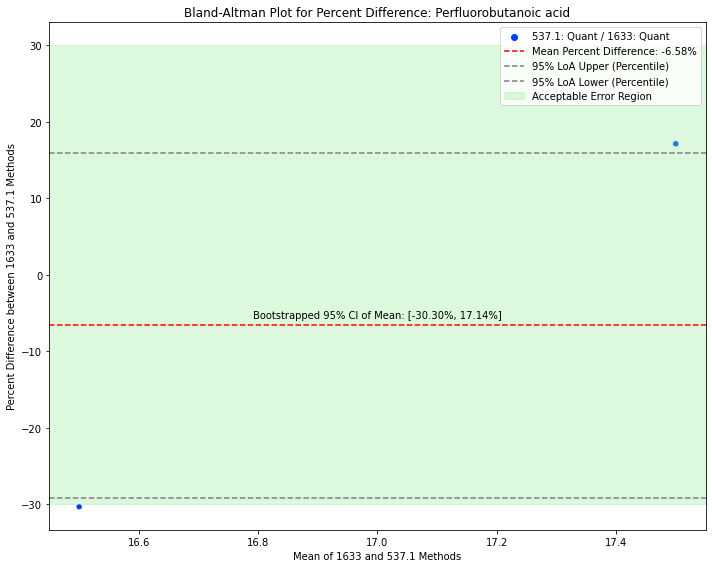

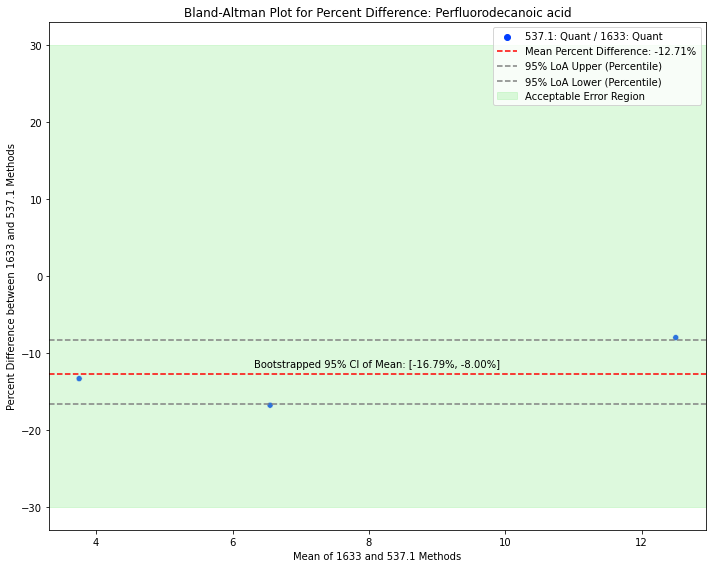

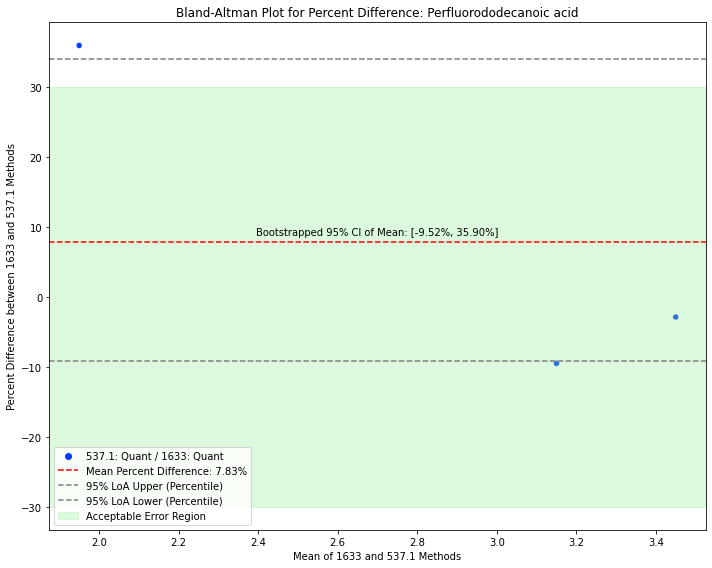

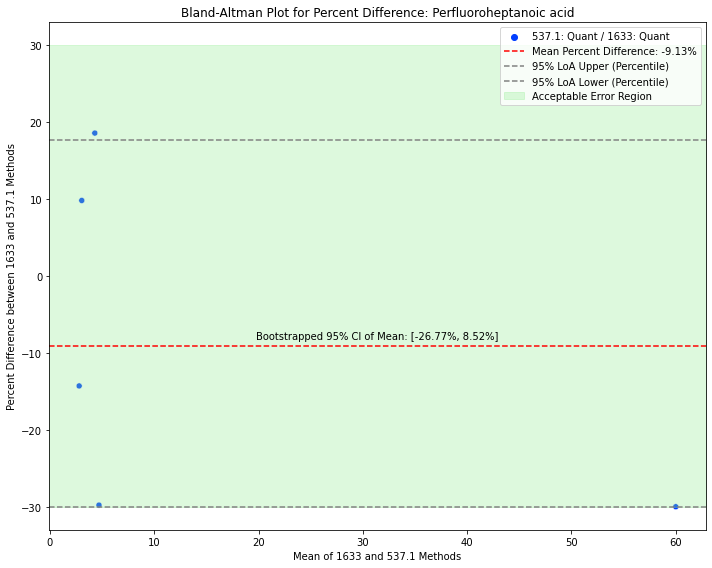

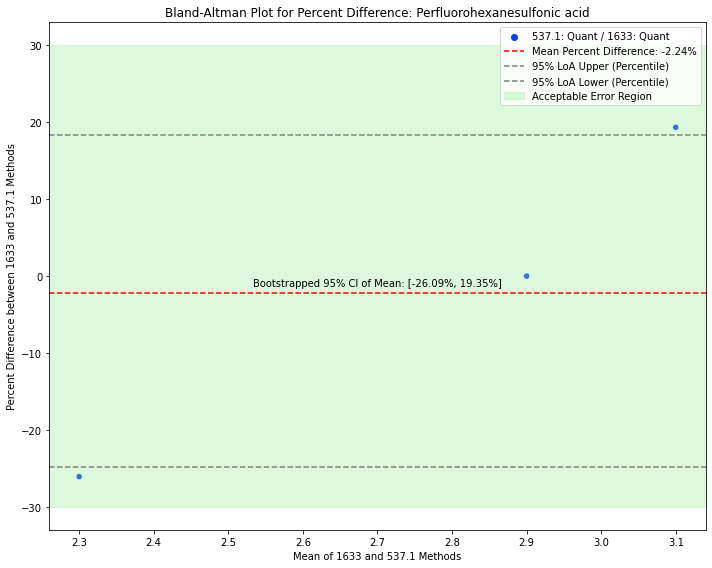

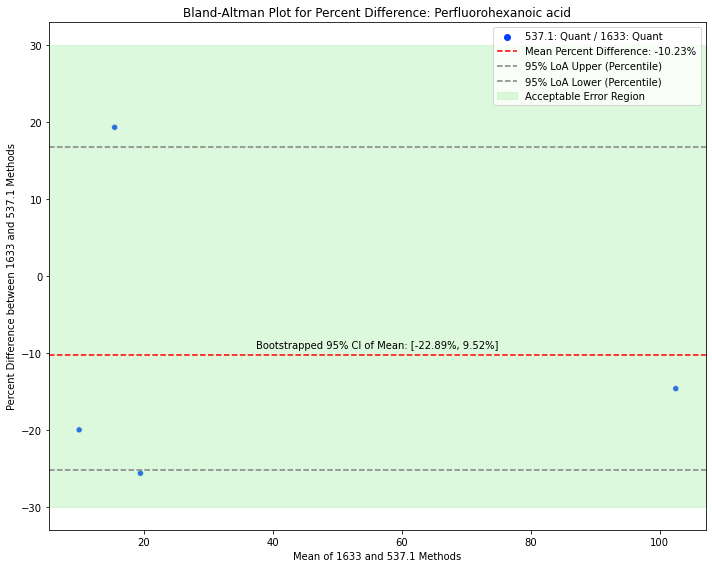

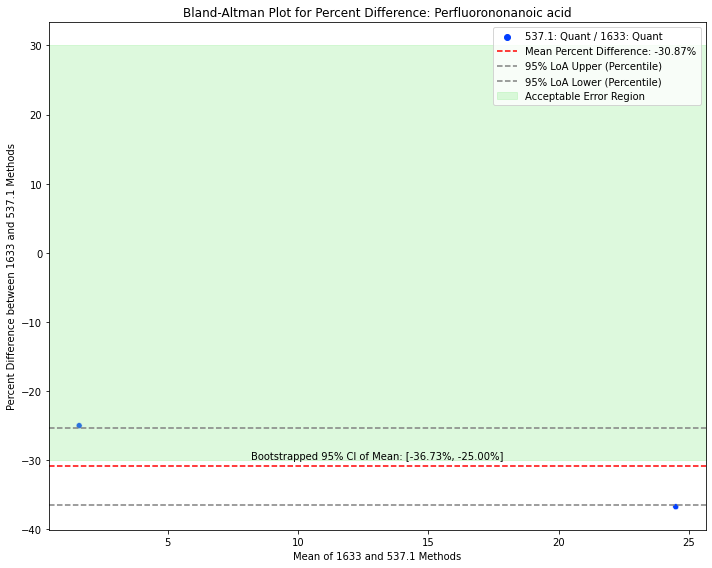

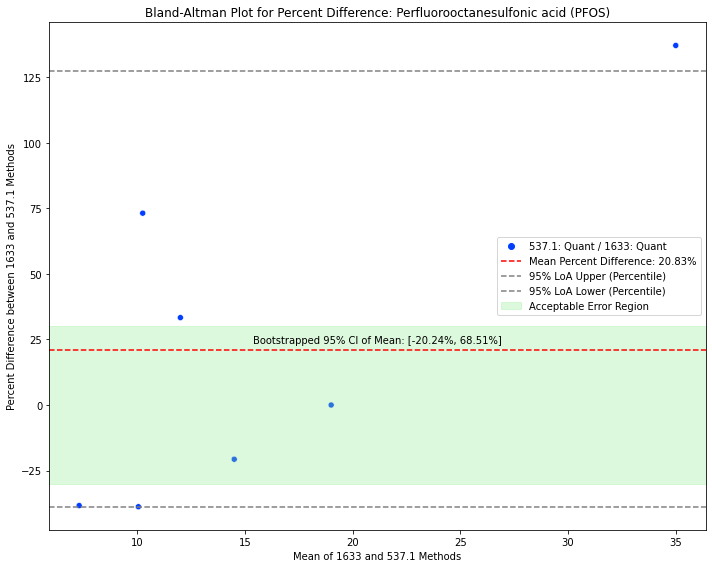

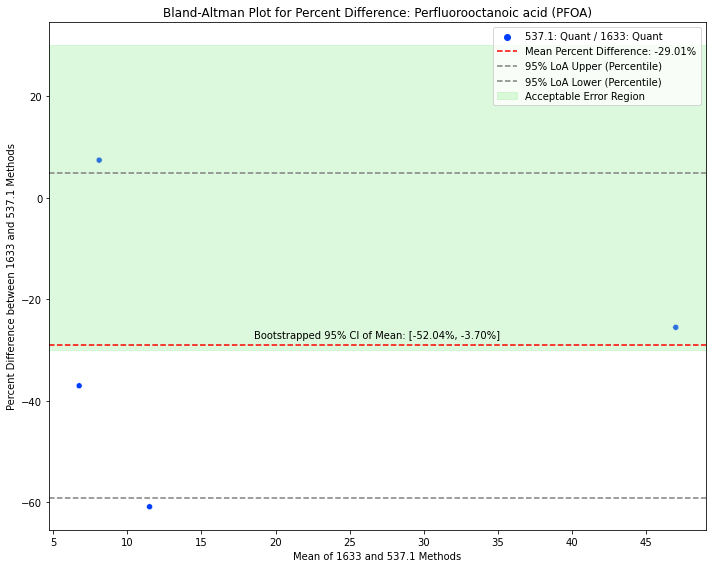

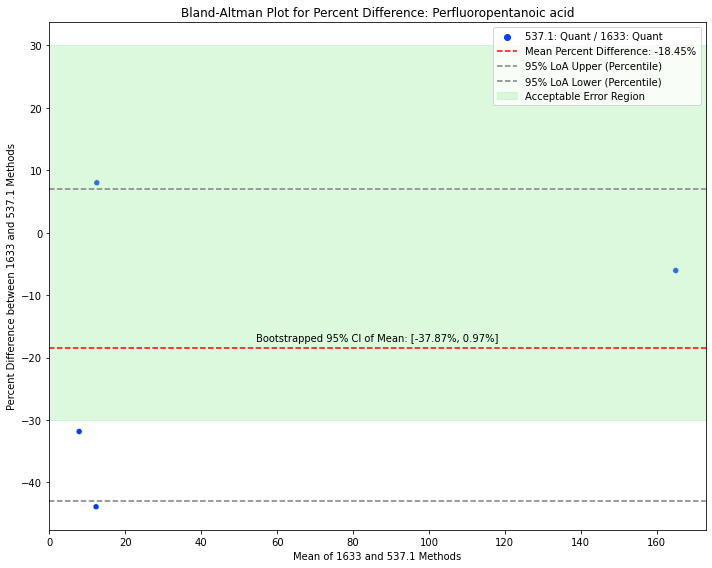

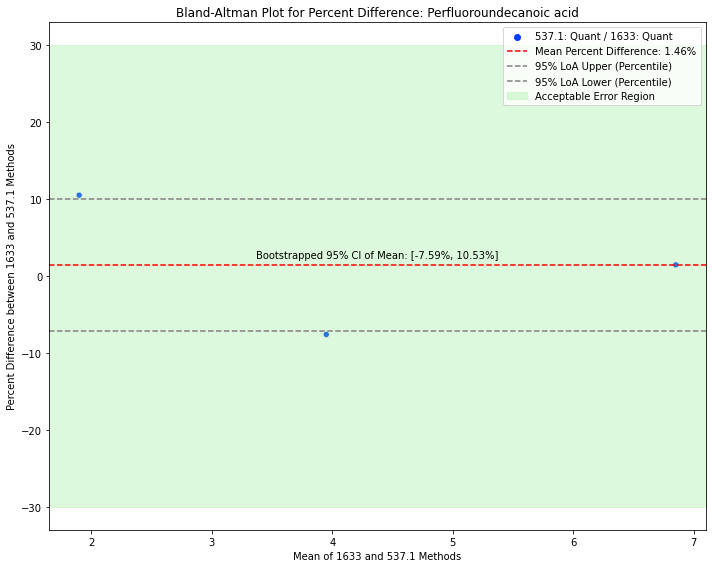

In [69]:
# Assuming quant_df is your DataFrame
groups = quant_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    # Extract the two methods' measurements for the current group
    method1 = group['Quant Only Incl Qual Flags_1633'].dropna()
    method2 = group['Quant Only Incl Qual Flags_5371'].dropna()
    
    # Ensure there are enough data points for a meaningful plot
    if len(method1) > 1 and len(method2) > 1:
        # Calculate the mean of the measurements and the percent difference
        means = (method1 + method2) / 2
        percent_diff = ((method2 - method1) / means) * 100

        # Calculate the mean percent difference
        mean_percent_diff = np.mean(percent_diff)

        # Bootstrap to estimate the CI of the mean percent difference
        # Correctly unpack the returned values, ignoring bootstrapped_means
        ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

        # Calculate the 2.5th and 97.5th percentiles of the percent differences for the LoA
        loa_lower = np.percentile(percent_diff, 2.5)
        loa_upper = np.percentile(percent_diff, 97.5)

        # Generate the Bland-Altman plot for percent difference
        plt.figure(figsize=(10, 8))
        sns.scatterplot(data=group, x=means, y=percent_diff, hue='Compare Detection Classes', alpha=1, palette='bright')
        plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}%')
        plt.axhline(loa_upper, color='gray', linestyle='--', label='95% LoA Upper (Percentile)')
        plt.axhline(loa_lower, color='gray', linestyle='--', label='95% LoA Lower (Percentile)')

        # Determine new xmin and xmax based on the means data range and extend them a bit
        xmin, xmax = min(means), max(means)
        xrange_extension = (xmax - xmin) * 0.05  # Extend the range by 5% on each side
        xmin_extended, xmax_extended = xmin - xrange_extension, xmax + xrange_extension

        # Shade the region of acceptable error (±30% Percent Error) using the extended range
        plt.fill_betweenx(y=[-30, 30], x1=xmin_extended, x2=xmax_extended, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

        # Now, explicitly set the x-axis limits to include the extended range
        plt.xlim(xmin_extended, xmax_extended)

        # Get the current limits of the x-axis
        xmin, xmax = plt.xlim()

        # Calculate the midpoint of the x-axis range
        xmid = (xmin + xmax) / 2

        # Annotate the plot with the bootstrapped CI of the mean percent difference
        plt.annotate(f'Bootstrapped 95% CI of Mean: [{ci_lower:.2f}%, {ci_upper:.2f}%]', 
             xy=(xmid, mean_percent_diff),  # This positions the annotation at the horizontal center
             xytext=(0, 10),  # Adjust vertical position relative to xy; here, 10 points above
             textcoords='offset points', 
             ha='center', va='center')

        # Adding labels and title
        plt.title(f'Bland-Altman Plot for Percent Difference: {compound}')
        plt.xlabel('Mean of 1633 and 537.1 Methods')
        plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

        # Adding a legend
        plt.legend()

        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {compound} to generate a Bland-Altman plot.")


Not enough data for NEtFOSAA to generate a Bland-Altman plot.


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


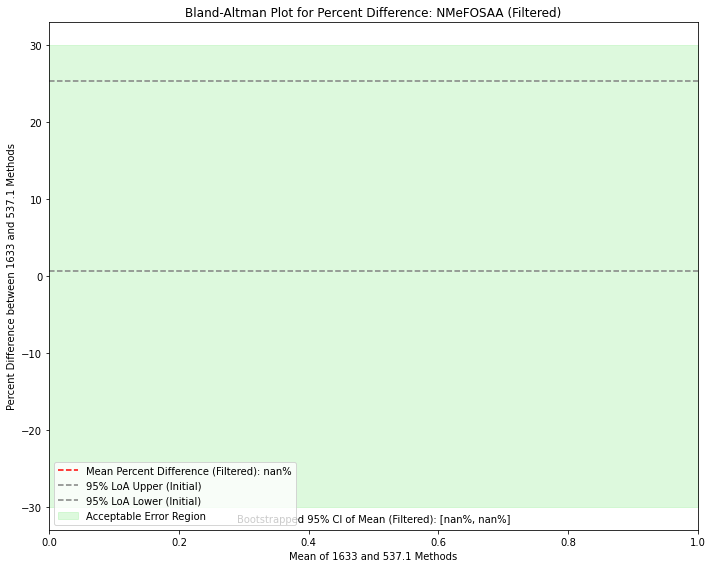

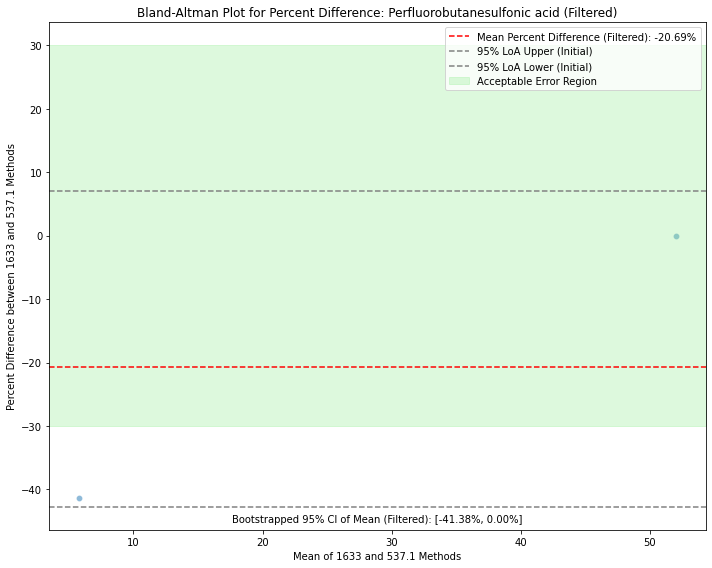

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


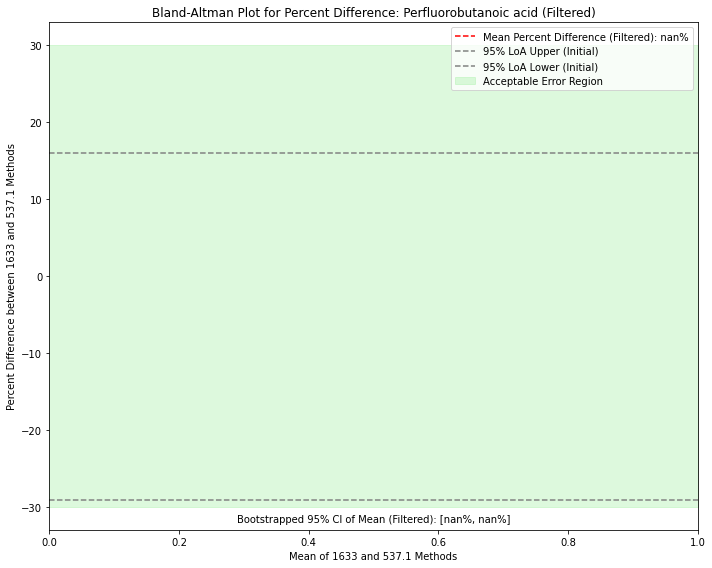

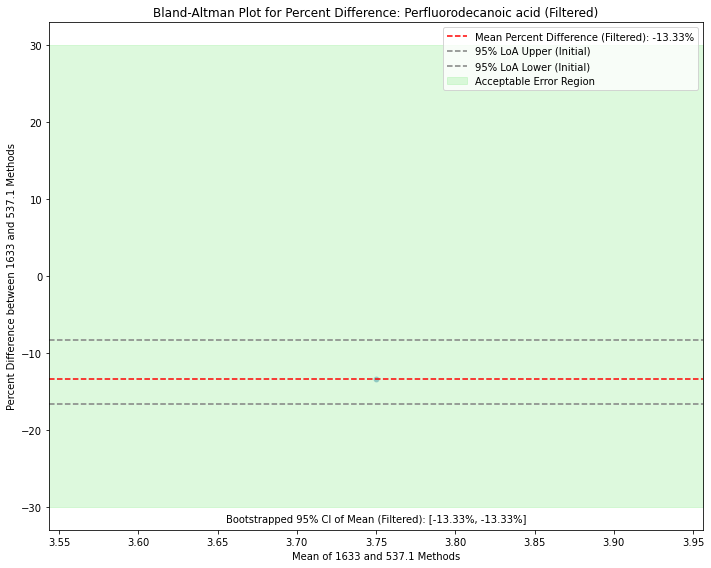

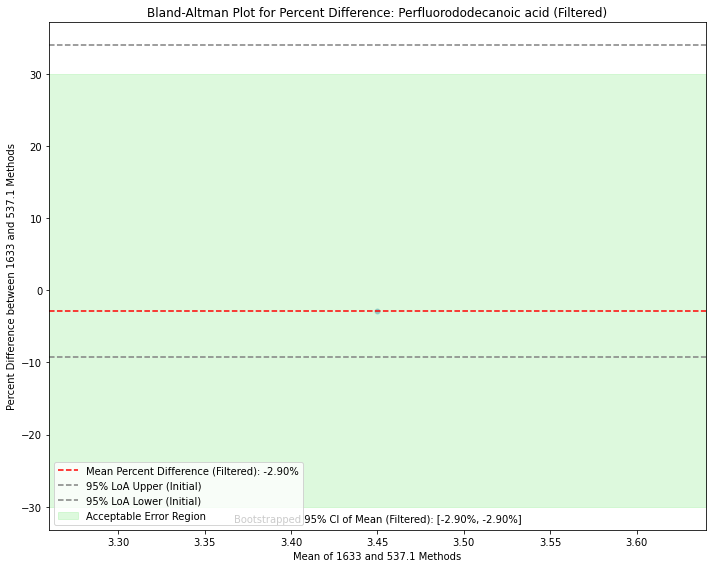

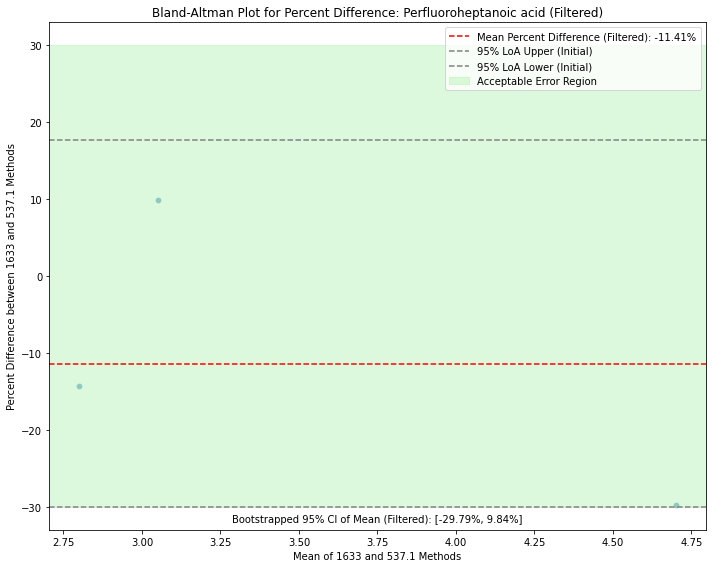

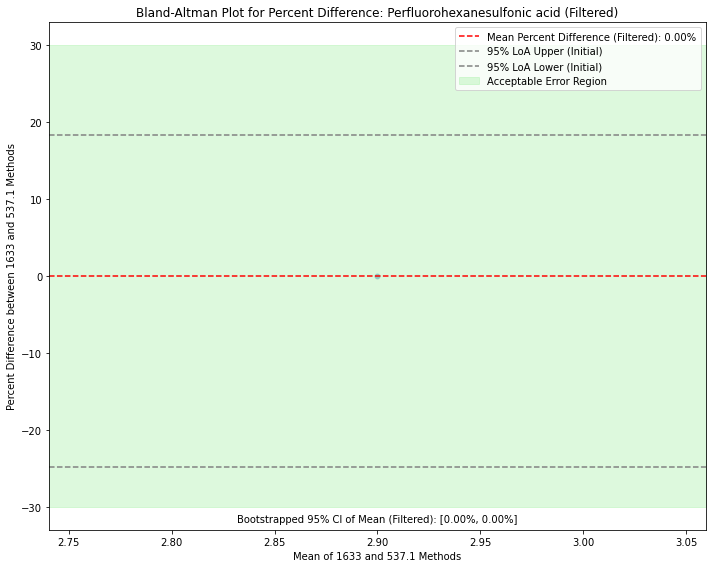

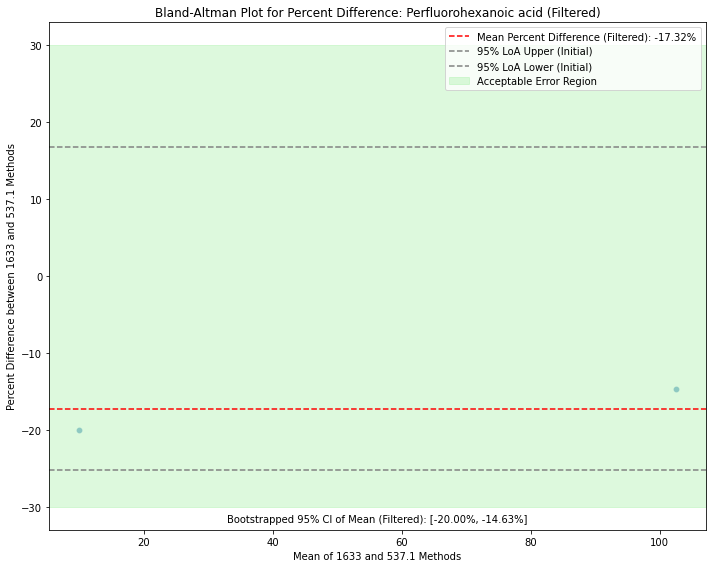

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


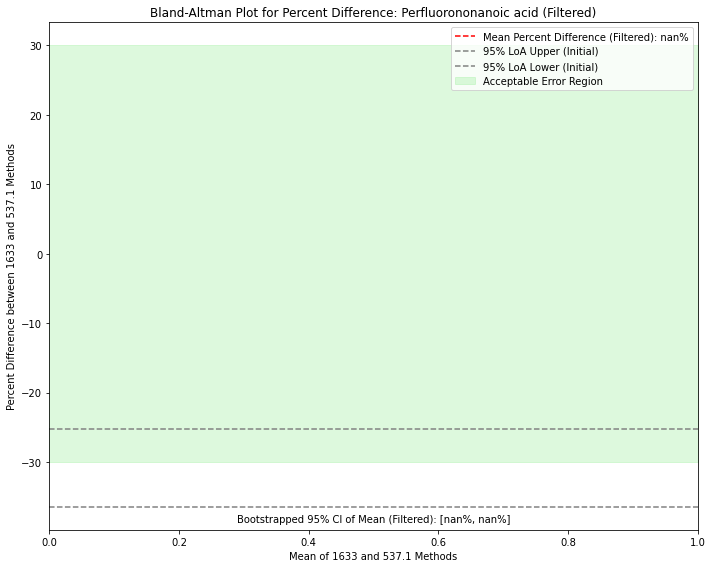

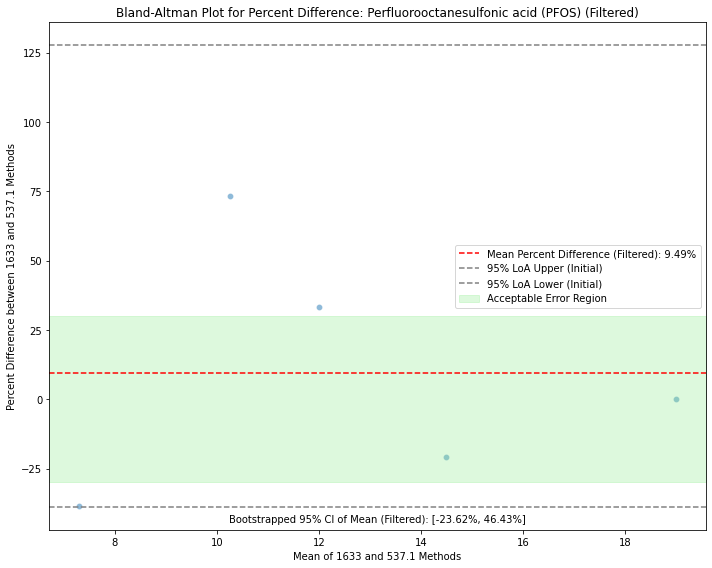

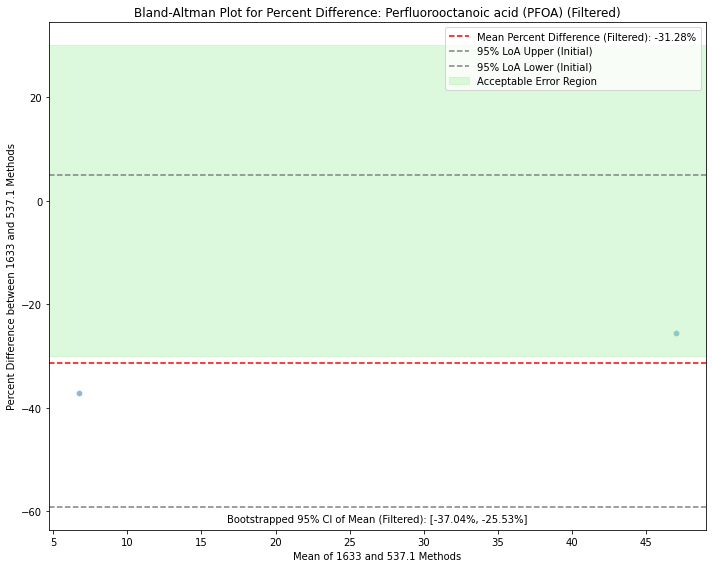

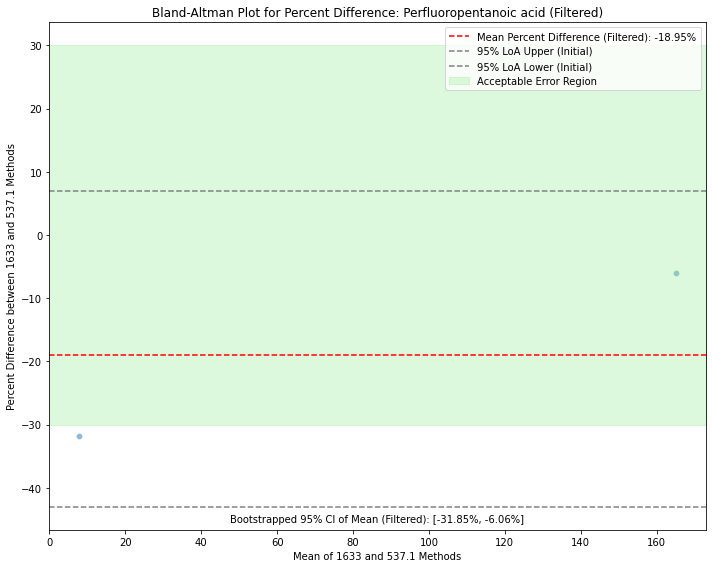

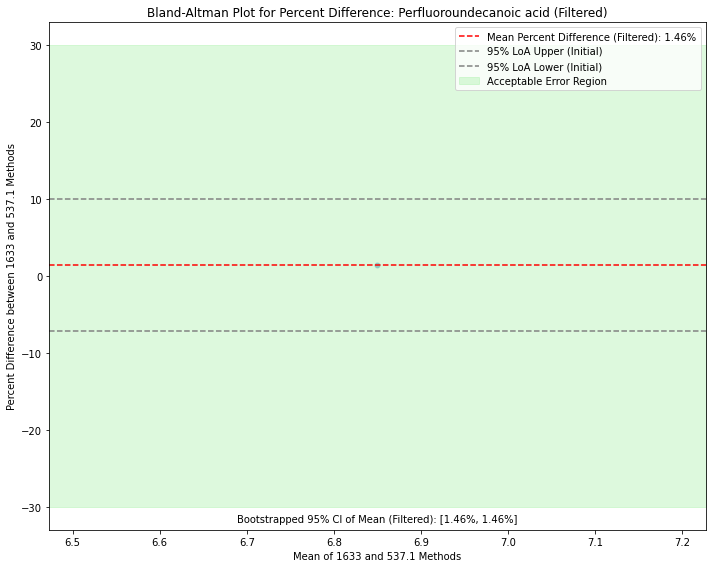

In [30]:
# Assuming quant_df is your DataFrame and bootstrap_mean_ci is defined as given
groups = quant_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    method1 = group['Quant Only Incl Qual Flags_1633'].dropna()
    method2 = group['Quant Only Incl Qual Flags_5371'].dropna()
    
    if len(method1) > 1 and len(method2) > 1:
        means = (method1 + method2) / 2
        percent_diff = ((method2 - method1) / means) * 100
        
        # Calculate initial LoA
        loa_lower_initial = np.percentile(percent_diff, 2.5)
        loa_upper_initial = np.percentile(percent_diff, 97.5)
        
        # Filter out outliers
        filtered_percent_diff = percent_diff[(percent_diff >= loa_lower_initial) & (percent_diff <= loa_upper_initial)]
        filtered_means = means[(percent_diff >= loa_lower_initial) & (percent_diff <= loa_upper_initial)]
        
        # Recalculate mean percent difference without outliers
        mean_percent_diff_filtered = np.mean(filtered_percent_diff)
        
        # Recalculate CI for the mean percent difference without outliers
        ci_lower_filtered, ci_upper_filtered, _ = bootstrap_mean_ci(filtered_percent_diff, n_bootstraps=10000, ci=95)
        
        # Plotting
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=filtered_means, y=filtered_percent_diff, alpha=0.5)
        plt.axhline(mean_percent_diff_filtered, color='red', linestyle='--', label=f'Mean Percent Difference (Filtered): {mean_percent_diff_filtered:.2f}%')
        plt.axhline(loa_upper_initial, color='gray', linestyle='--', label='95% LoA Upper (Initial)')
        plt.axhline(loa_lower_initial, color='gray', linestyle='--', label='95% LoA Lower (Initial)')
        
        # Determine the full range of the x-axis based on data
        xmin, xmax = plt.xlim()
        plt.xlim(xmin, xmax)
        
        # Shade the region of acceptable error (±30% Percent Error) across the full x-axis range
        plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')
        
        # Annotate with the new CI of the mean percent difference
        plt.annotate(f'Bootstrapped 95% CI of Mean (Filtered): [{ci_lower_filtered:.2f}%, {ci_upper_filtered:.2f}%]', xy=(0.5, 0.02), xycoords='axes fraction', ha='center', va='center', fontsize=10)
        
        plt.title(f'Bland-Altman Plot for Percent Difference: {compound} (Filtered)')
        plt.xlabel('Mean of 1633 and 537.1 Methods')
        plt.ylabel('Percent Difference between 1633 and 537.1 Methods')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {compound} to generate a Bland-Altman plot.")



### By PFAS Class

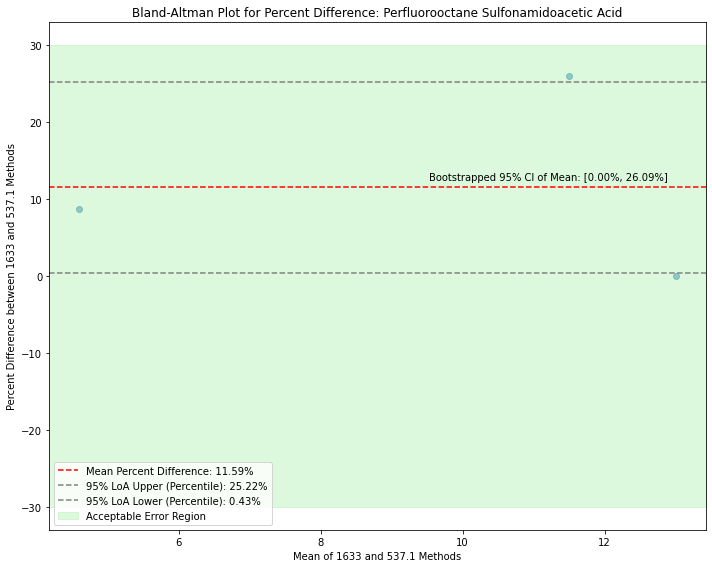

In [32]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Bootstrap to estimate the CI of the mean percent difference
ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

# Calculate the mean percent difference
mean_percent_diff = np.mean(percent_diff)

# Calculate the 2.5th and 97.5th percentiles of the percent differences for the Limits of Agreement (LoA)
loa_lower = np.percentile(percent_diff, 2.5)
loa_upper = np.percentile(percent_diff, 97.5)

# Generate the Bland-Altman plot for percent difference
plt.figure(figsize=(10, 8))
plt.scatter(means, percent_diff, alpha=0.5)
plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}%')
plt.axhline(loa_upper, color='gray', linestyle='--', label=f'95% LoA Upper (Percentile): {loa_upper:.2f}%')
plt.axhline(loa_lower, color='gray', linestyle='--', label=f'95% LoA Lower (Percentile): {loa_lower:.2f}%')

# Shade the region of acceptable error (±30% Percent Error)
xmin, xmax = plt.xlim()
plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

# Adjust the x-axis limits if necessary
plt.xlim(xmin, xmax)

# Annotate the plot with the bootstrapped CI of the mean percent difference
plt.annotate(f'Bootstrapped 95% CI of Mean: [{ci_lower:.2f}%, {ci_upper:.2f}%]', xy=(xmax*0.95, np.mean(percent_diff)), xytext=(10,10), textcoords='offset points', ha='right', va='center')

# Adding labels and title
plt.title('Bland-Altman Plot for Percent Difference: Perfluorooctane Sulfonamidoacetic Acid')
plt.xlabel('Mean of 1633 and 537.1 Methods')
plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

# Adding a legend
plt.legend()

plt.tight_layout()
plt.show()


In [33]:
len(filtered_df)

3

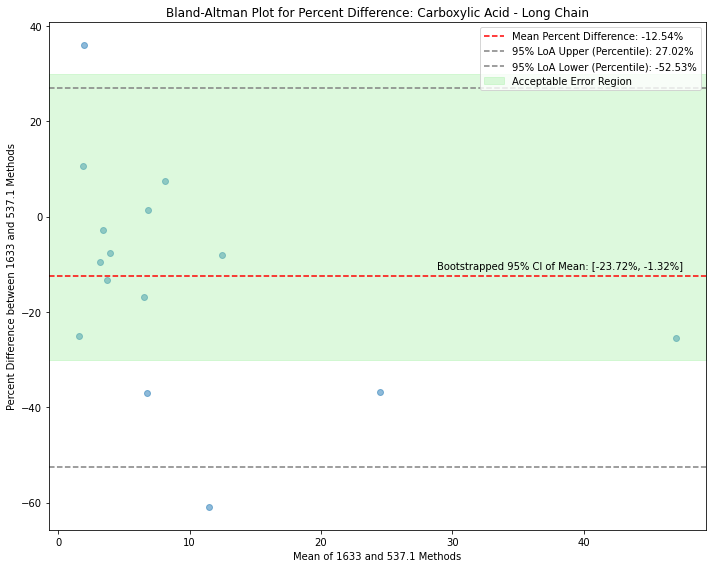

In [34]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Bootstrap to estimate the CI of the mean percent difference
ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

# Calculate the mean percent difference
mean_percent_diff = np.mean(percent_diff)

# Calculate the 2.5th and 97.5th percentiles of the percent differences for the Limits of Agreement (LoA)
loa_lower = np.percentile(percent_diff, 2.5)
loa_upper = np.percentile(percent_diff, 97.5)

# Generate the Bland-Altman plot for percent difference
plt.figure(figsize=(10, 8))
plt.scatter(means, percent_diff, alpha=0.5)
plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}%')
plt.axhline(loa_upper, color='gray', linestyle='--', label=f'95% LoA Upper (Percentile): {loa_upper:.2f}%')
plt.axhline(loa_lower, color='gray', linestyle='--', label=f'95% LoA Lower (Percentile): {loa_lower:.2f}%')

# Shade the region of acceptable error (±30% Percent Error)
xmin, xmax = plt.xlim()
plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

# Adjust the x-axis limits if necessary
plt.xlim(xmin, xmax)

# Annotate the plot with the bootstrapped CI of the mean percent difference
plt.annotate(f'Bootstrapped 95% CI of Mean: [{ci_lower:.2f}%, {ci_upper:.2f}%]', xy=(xmax*0.95, np.mean(percent_diff)), xytext=(10,10), textcoords='offset points', ha='right', va='center')

# Adding labels and title
plt.title('Bland-Altman Plot for Percent Difference: Carboxylic Acid - Long Chain')
plt.xlabel('Mean of 1633 and 537.1 Methods')
plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

# Adding a legend
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
len(filtered_df)

15

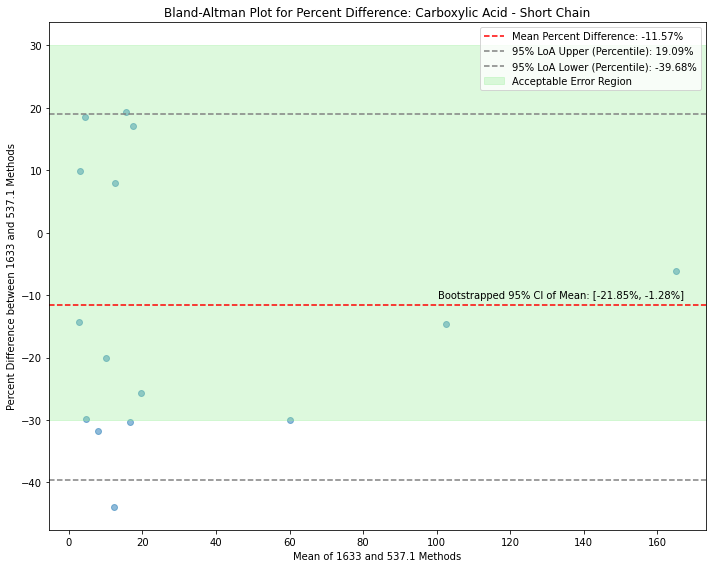

In [54]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Bootstrap to estimate the CI of the mean percent difference
ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

# Calculate the mean percent difference
mean_percent_diff = np.mean(percent_diff)

# Calculate the 2.5th and 97.5th percentiles of the percent differences for the Limits of Agreement (LoA)
loa_lower = np.percentile(percent_diff, 2.5)
loa_upper = np.percentile(percent_diff, 97.5)

# Generate the Bland-Altman plot for percent difference
plt.figure(figsize=(10, 8))
plt.scatter(means, percent_diff, alpha=0.5)
plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}%')
plt.axhline(loa_upper, color='gray', linestyle='--', label=f'95% LoA Upper (Percentile): {loa_upper:.2f}%')
plt.axhline(loa_lower, color='gray', linestyle='--', label=f'95% LoA Lower (Percentile): {loa_lower:.2f}%')

# Shade the region of acceptable error (±30% Percent Error)
xmin, xmax = plt.xlim()
plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

# Adjust the x-axis limits if necessary
plt.xlim(xmin, xmax)

# Annotate the plot with the bootstrapped CI of the mean percent difference
plt.annotate(f'Bootstrapped 95% CI of Mean: [{ci_lower:.2f}%, {ci_upper:.2f}%]', xy=(xmax*0.95, np.mean(percent_diff)), xytext=(10,10), textcoords='offset points', ha='right', va='center')

# Adding labels and title
plt.title('Bland-Altman Plot for Percent Difference: Carboxylic Acid - Short Chain')
plt.xlabel('Mean of 1633 and 537.1 Methods')
plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

# Adding a legend
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
len(filtered_df)

15

In [40]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Bootstrap to estimate the CI of the mean percent difference
ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

# Calculate the mean percent difference
mean_percent_diff = np.mean(percent_diff)

# Calculate the 2.5th and 97.5th percentiles of the percent differences for the Limits of Agreement (LoA)
loa_lower = np.percentile(percent_diff, 2.5)
loa_upper = np.percentile(percent_diff, 97.5)

# Generate the Bland-Altman plot for percent difference
plt.figure(figsize=(10, 8))
plt.scatter(means, percent_diff, alpha=0.5)
plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}%')
plt.axhline(loa_upper, color='gray', linestyle='--', label=f'95% LoA Upper (Percentile): {loa_upper:.2f}%')
plt.axhline(loa_lower, color='gray', linestyle='--', label=f'95% LoA Lower (Percentile): {loa_lower:.2f}%')

# Shade the region of acceptable error (±30% Percent Error)
xmin, xmax = plt.xlim()
plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

# Adjust the x-axis limits if necessary
plt.xlim(xmin, xmax)

# Annotate the plot with the bootstrapped CI of the mean percent difference
plt.annotate(f'Bootstrapped 95% CI of Mean: [{ci_lower:.2f}%, {ci_upper:.2f}%]', xy=(xmax*0.95, np.mean(percent_diff)), xytext=(10,10), textcoords='offset points', ha='right', va='center')

# Adding labels and title
plt.title('Bland-Altman Plot for Percent Difference: Fluorotelomer Sulfonic Acid')
plt.xlabel('Mean of 1633 and 537.1 Methods')
plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

# Adding a legend
plt.legend()

plt.tight_layout()
plt.show()

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: index -1 is out of bounds for axis 0 with size 0

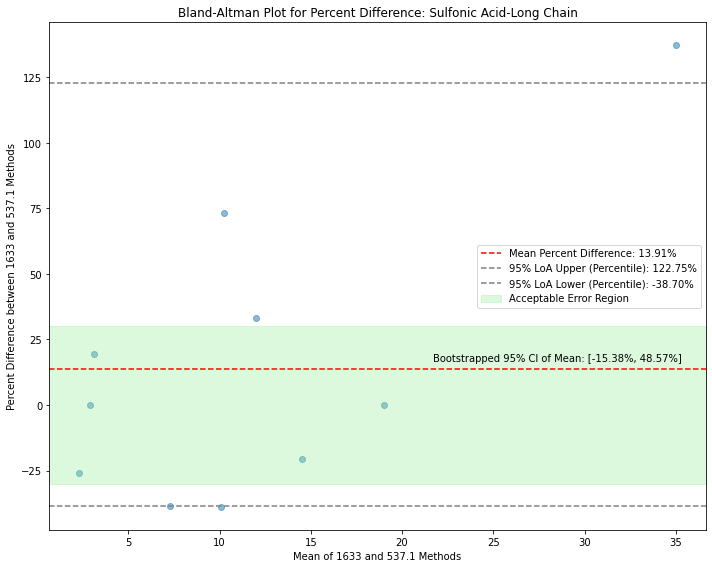

In [56]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Bootstrap to estimate the CI of the mean percent difference
ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

# Calculate the mean percent difference
mean_percent_diff = np.mean(percent_diff)

# Calculate the 2.5th and 97.5th percentiles of the percent differences for the Limits of Agreement (LoA)
loa_lower = np.percentile(percent_diff, 2.5)
loa_upper = np.percentile(percent_diff, 97.5)

# Generate the Bland-Altman plot for percent difference
plt.figure(figsize=(10, 8))
plt.scatter(means, percent_diff, alpha=0.5)
plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}%')
plt.axhline(loa_upper, color='gray', linestyle='--', label=f'95% LoA Upper (Percentile): {loa_upper:.2f}%')
plt.axhline(loa_lower, color='gray', linestyle='--', label=f'95% LoA Lower (Percentile): {loa_lower:.2f}%')

# Shade the region of acceptable error (±30% Percent Error)
xmin, xmax = plt.xlim()
plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

# Adjust the x-axis limits if necessary
plt.xlim(xmin, xmax)

# Annotate the plot with the bootstrapped CI of the mean percent difference
plt.annotate(f'Bootstrapped 95% CI of Mean: [{ci_lower:.2f}%, {ci_upper:.2f}%]', xy=(xmax*0.95, np.mean(percent_diff)), xytext=(10,10), textcoords='offset points', ha='right', va='center')

# Adding labels and title
plt.title('Bland-Altman Plot for Percent Difference: Sulfonic Acid-Long Chain')
plt.xlabel('Mean of 1633 and 537.1 Methods')
plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

# Adding a legend
plt.legend()

plt.tight_layout()
plt.show()

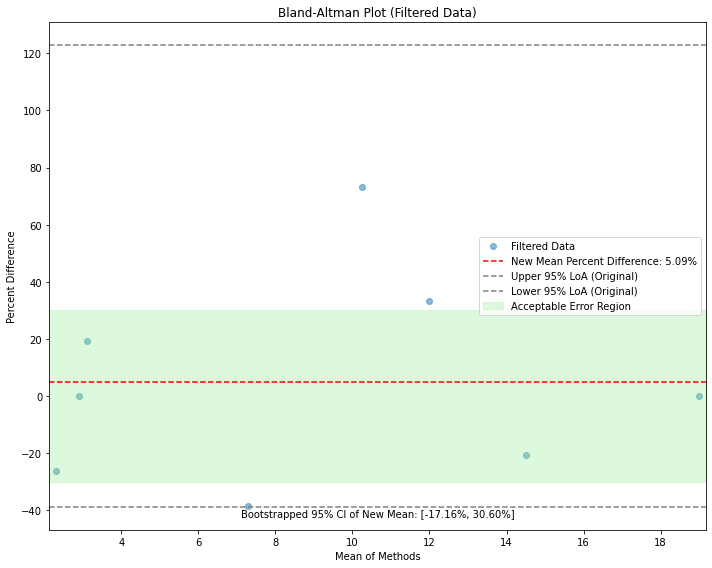

New Mean Percent Difference: 5.09%
New 95% CI of Mean Percent Difference: [-17.16%, 30.60%]


In [63]:
# Assuming loa_lower and loa_upper are already defined
# Filter out outliers
filtered_percent_diff = percent_diff[(percent_diff > loa_lower) & (percent_diff < loa_upper)]
filtered_means = means[(percent_diff > loa_lower) & (percent_diff < loa_upper)]

# Recalculate the mean percent difference
new_mean_percent_diff = np.mean(filtered_percent_diff)

# Correctly unpack the returned values from bootstrap_mean_ci
new_ci_lower, new_ci_upper, _ = bootstrap_mean_ci(filtered_percent_diff, n_bootstraps=10000, ci=95)

# Ensure the rest of the code correctly uses these unpacked values
# Generate the Bland-Altman plot for the filtered dataset
plt.figure(figsize=(10, 8))
plt.scatter(filtered_means, filtered_percent_diff, alpha=0.5, label='Filtered Data')
plt.axhline(new_mean_percent_diff, color='red', linestyle='--', label=f'New Mean Percent Difference: {new_mean_percent_diff:.2f}%')
plt.axhline(loa_upper, color='gray', linestyle='--', label='Upper 95% LoA (Original)')
plt.axhline(loa_lower, color='gray', linestyle='--', label='Lower 95% LoA (Original)')

# After plotting your data
plt.autoscale(enable=True, axis='x', tight=True)  # Ensure the plot is autoscaled to your data
xmin, xmax = plt.xlim()  # Get the current x-axis limits

# Extend the limits slightly beyond the current range to ensure full coverage
extension = (xmax - xmin) * 0.01  # Extend by 1% of the range on each side, adjust as needed
xmin_extended = xmin - extension
xmax_extended = xmax + extension

# Use the extended limits for shading the acceptable error region
plt.fill_betweenx(y=[-30, 30], x1=xmin_extended, x2=xmax_extended, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

# Annotate the plot with the new CI of the mean percent difference
plt.annotate(f'Bootstrapped 95% CI of New Mean: [{new_ci_lower:.2f}%, {new_ci_upper:.2f}%]', xy=(0.5, 0.02), xycoords='axes fraction', ha='center', va='bottom', fontsize=10)

plt.title('Bland-Altman Plot (Filtered Data)')
plt.xlabel('Mean of Methods')
plt.ylabel('Percent Difference')
plt.legend()

plt.tight_layout()
plt.show()

print(f"New Mean Percent Difference: {new_mean_percent_diff:.2f}%")
print(f"New 95% CI of Mean Percent Difference: [{new_ci_lower:.2f}%, {new_ci_upper:.2f}%]")


In [42]:
len(filtered_df)

10

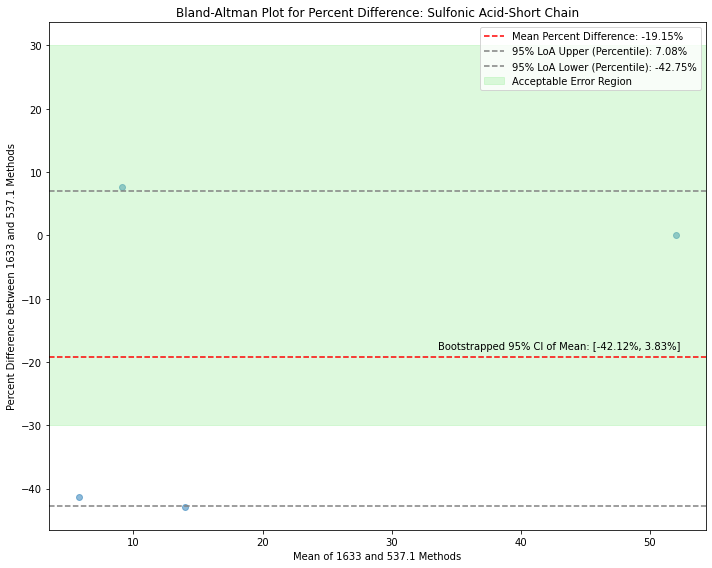

In [58]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Bootstrap to estimate the CI of the mean percent difference
ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

# Calculate the mean percent difference
mean_percent_diff = np.mean(percent_diff)

# Calculate the 2.5th and 97.5th percentiles of the percent differences for the Limits of Agreement (LoA)
loa_lower = np.percentile(percent_diff, 2.5)
loa_upper = np.percentile(percent_diff, 97.5)

# Generate the Bland-Altman plot for percent difference
plt.figure(figsize=(10, 8))
plt.scatter(means, percent_diff, alpha=0.5)
plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}%')
plt.axhline(loa_upper, color='gray', linestyle='--', label=f'95% LoA Upper (Percentile): {loa_upper:.2f}%')
plt.axhline(loa_lower, color='gray', linestyle='--', label=f'95% LoA Lower (Percentile): {loa_lower:.2f}%')

# Shade the region of acceptable error (±30% Percent Error)
xmin, xmax = plt.xlim()
plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

# Adjust the x-axis limits if necessary
plt.xlim(xmin, xmax)

# Annotate the plot with the bootstrapped CI of the mean percent difference
plt.annotate(f'Bootstrapped 95% CI of Mean: [{ci_lower:.2f}%, {ci_upper:.2f}%]', xy=(xmax*0.95, np.mean(percent_diff)), xytext=(10,10), textcoords='offset points', ha='right', va='center')

# Adding labels and title
plt.title('Bland-Altman Plot for Percent Difference: Sulfonic Acid-Short Chain')
plt.xlabel('Mean of 1633 and 537.1 Methods')
plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

# Adding a legend
plt.legend()

plt.tight_layout()
plt.show()

### By Type

In [2]:
# Assuming merged_df is your DataFrame and 'Type_1633' is the column you want to group by
grouped_counts = quant_df.groupby('Type_1633').size()

# To display the counts for each group
print(grouped_counts)

NameError: name 'quant_df' is not defined

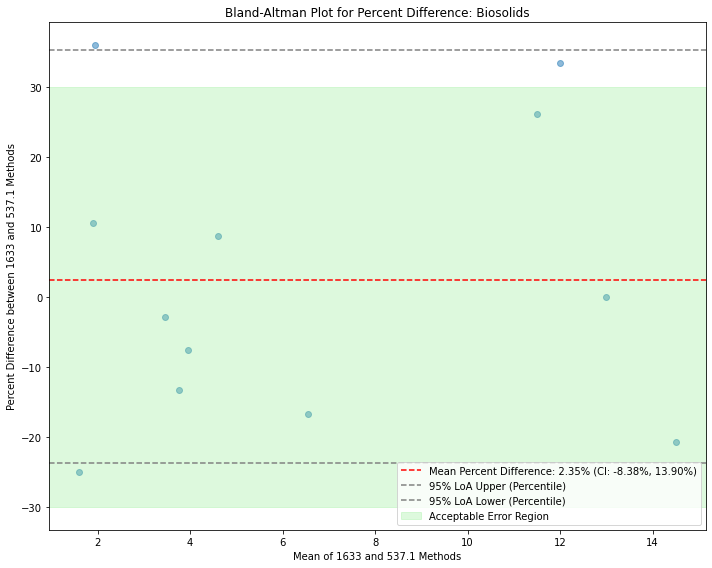

Mean Percent Difference for Biosolids: 2.35% (CI: -8.38%, 13.90%)


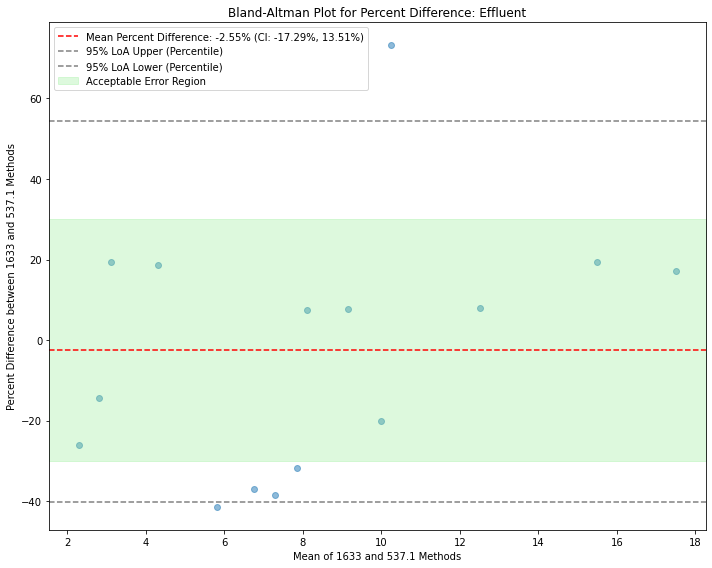

Mean Percent Difference for Effluent: -2.55% (CI: -17.29%, 13.51%)


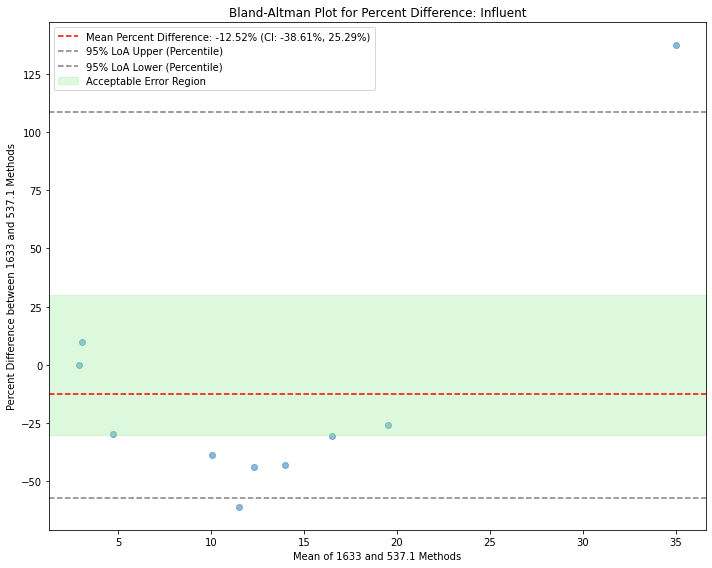

Mean Percent Difference for Influent: -12.52% (CI: -38.61%, 25.29%)


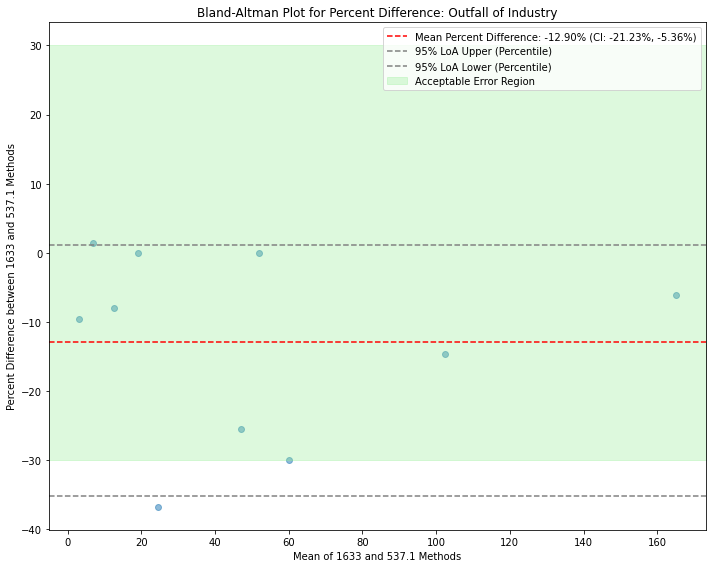

Mean Percent Difference for Outfall of Industry: -12.90% (CI: -21.23%, -5.36%)


In [59]:
# Iterate through each Type, grouping by 'Type_1633'
for Type, group in quant_df.groupby('Type_1633'):
    # Extract the two methods' measurements for the current group
    method1 = group['Quant Only Incl Qual Flags_1633'].dropna()
    method2 = group['Quant Only Incl Qual Flags_5371'].dropna()
    
    # Ensure there are enough data points for a meaningful plot
    if len(method1) > 1 and len(method2) > 1:
        # Calculate the mean of the measurements and the percent difference
        means = (method1 + method2) / 2
        percent_diff = ((method2 - method1) / means) * 100

        # Bootstrap to estimate the CI of the mean percent difference
        ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

        # Calculate the mean percent difference
        mean_percent_diff = np.mean(percent_diff)

        # Calculate the 2.5th and 97.5th percentiles of the percent differences for the Limits of Agreement (LoA)
        loa_lower = np.percentile(percent_diff, 2.5)
        loa_upper = np.percentile(percent_diff, 97.5)

        # Generate the Bland-Altman plot for percent difference
        plt.figure(figsize=(10, 8))
        plt.scatter(means, percent_diff, alpha=0.5)
        plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}% (CI: {ci_lower:.2f}%, {ci_upper:.2f}%)')
        plt.axhline(loa_upper, color='gray', linestyle='--', label='95% LoA Upper (Percentile)')
        plt.axhline(loa_lower, color='gray', linestyle='--', label='95% LoA Lower (Percentile)')

        # Shade the region of acceptable error (±30% Percent Error)
        xmin, xmax = plt.xlim()
        plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

        # Adjust the x-axis limits if necessary
        plt.xlim(xmin, xmax)

        # Adding labels and title
        plt.title(f'Bland-Altman Plot for Percent Difference: {Type}')
        plt.xlabel('Mean of 1633 and 537.1 Methods')
        plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

        # Adding a legend
        plt.legend()

        plt.tight_layout()
        plt.show()
        print(f"Mean Percent Difference for {Type}: {mean_percent_diff:.2f}% (CI: {ci_lower:.2f}%, {ci_upper:.2f}%)")
    else:
        print(f"Not enough data for {Type} to generate a Bland-Altman plot.")


By Type: Influent without Outliers

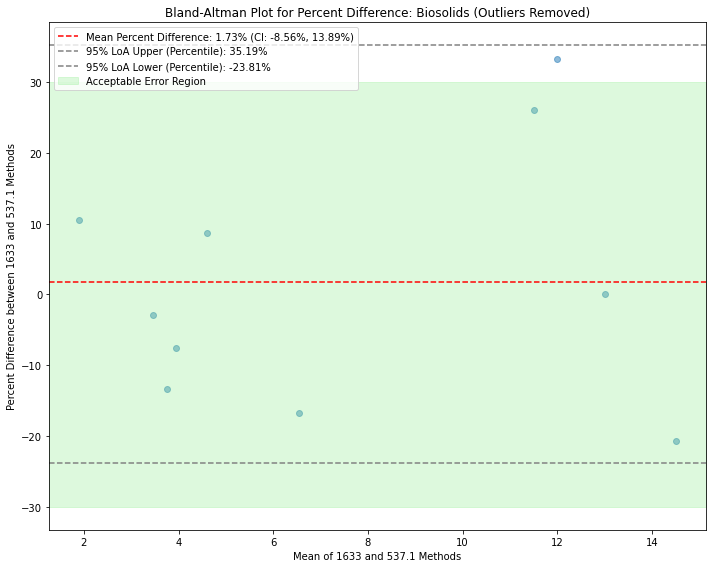

Mean Percent Difference for Biosolids: 1.73% (CI: -8.56%, 13.89%)


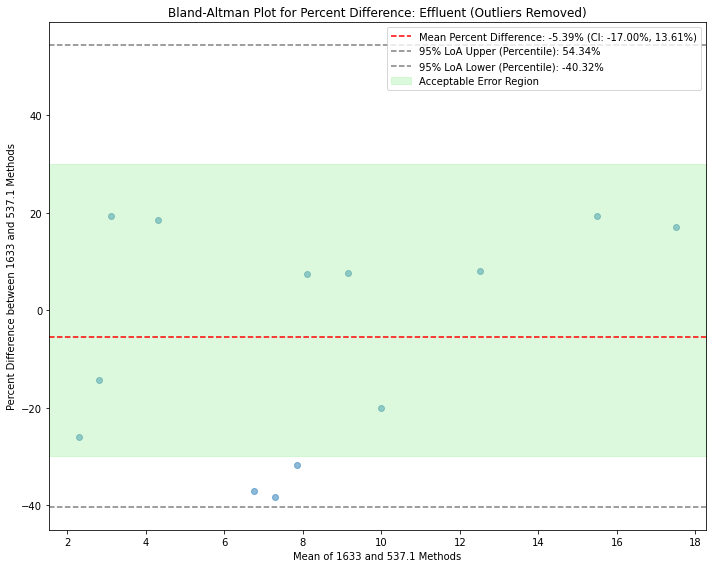

Mean Percent Difference for Effluent: -5.39% (CI: -17.00%, 13.61%)


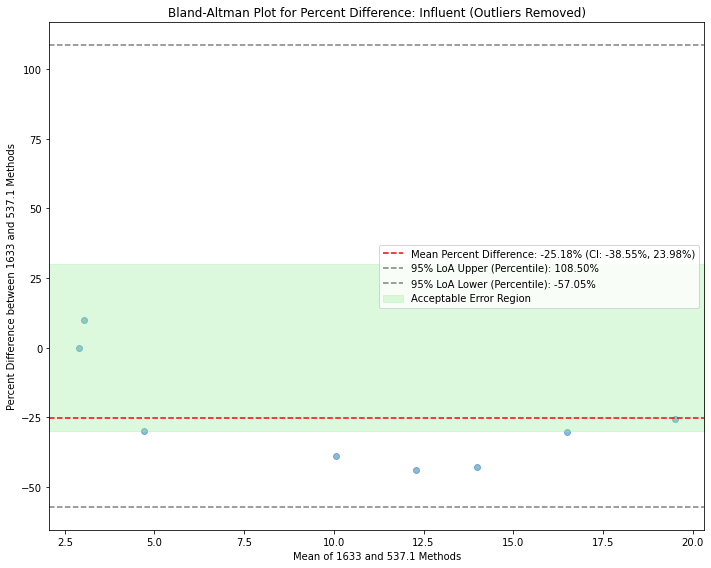

Mean Percent Difference for Influent: -25.18% (CI: -38.55%, 23.98%)


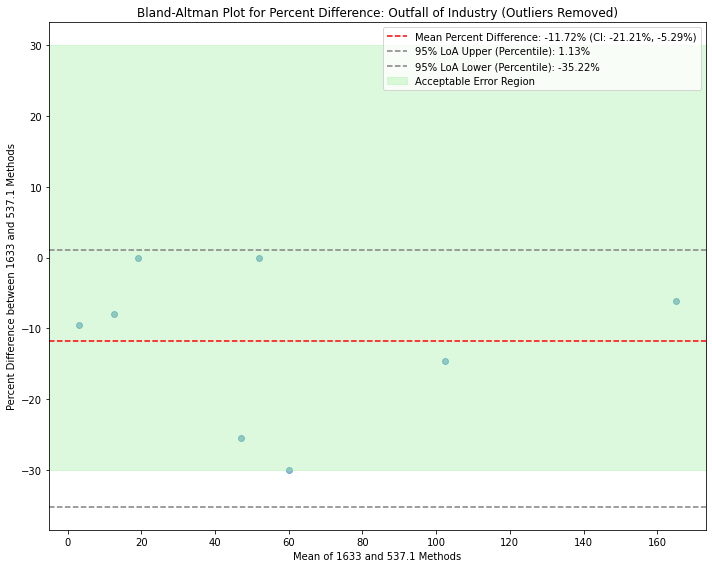

Mean Percent Difference for Outfall of Industry: -11.72% (CI: -21.21%, -5.29%)


In [29]:
for Type, group in quant_df.groupby('Type_1633'):
    method1 = group['Quant Only Incl Qual Flags_1633'].dropna()
    method2 = group['Quant Only Incl Qual Flags_5371'].dropna()
    
    if len(method1) > 1 and len(method2) > 1:
        means = (method1 + method2) / 2
        percent_diff = ((method2 - method1) / means) * 100

        # Correctly unpack the returned values from the bootstrap_mean_ci function
        ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)  # Add the missing arguments if needed

        loa_lower = np.percentile(percent_diff, 2.5)
        loa_upper = np.percentile(percent_diff, 97.5)

        # Filter out outliers based on LoA
        within_loa = (percent_diff >= loa_lower) & (percent_diff <= loa_upper)
        means_filtered = means[within_loa]
        percent_diff_filtered = percent_diff[within_loa]

        plt.figure(figsize=(10, 8))
        plt.scatter(means_filtered, percent_diff_filtered, alpha=0.5)
        plt.axhline(np.mean(percent_diff_filtered), color='red', linestyle='--', label=f'Mean Percent Difference: {np.mean(percent_diff_filtered):.2f}% (CI: {ci_lower:.2f}%, {ci_upper:.2f}%)')
        plt.axhline(loa_upper, color='gray', linestyle='--', label=f'95% LoA Upper (Percentile): {loa_upper:.2f}%')
        plt.axhline(loa_lower, color='gray', linestyle='--', label=f'95% LoA Lower (Percentile): {loa_lower:.2f}%')

        xmin, xmax = plt.xlim()
        plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')
        plt.xlim(xmin, xmax)

        plt.title(f'Bland-Altman Plot for Percent Difference: {Type} (Outliers Removed)')
        plt.xlabel('Mean of 1633 and 537.1 Methods')
        plt.ylabel('Percent Difference between 1633 and 537.1 Methods')
        plt.legend()

        plt.tight_layout()
        plt.show()
        print(f"Mean Percent Difference for {Type}: {np.mean(percent_diff_filtered):.2f}% (CI: {ci_lower:.2f}%, {ci_upper:.2f}%)")
    else:
        print(f"Not enough data for {Type} to generate a Bland-Altman plot.")


### By Sample Locations

In [29]:
# Assuming merged_df is your DataFrame and 'Sample Location_1633' is the column you want to group by
grouped_counts = quant_df.groupby('Sample Location_1633').size()

# To display the counts for each group
print(grouped_counts)

Sample Location_1633
Durham Biosolids            5
Durham Effluent             7
Durham Influent             2
Jireh Semiconductor Inc    10
Rock Creek Biosolids        7
Rock Creek Effluent         8
Rock Creek Influent         8
dtype: int64


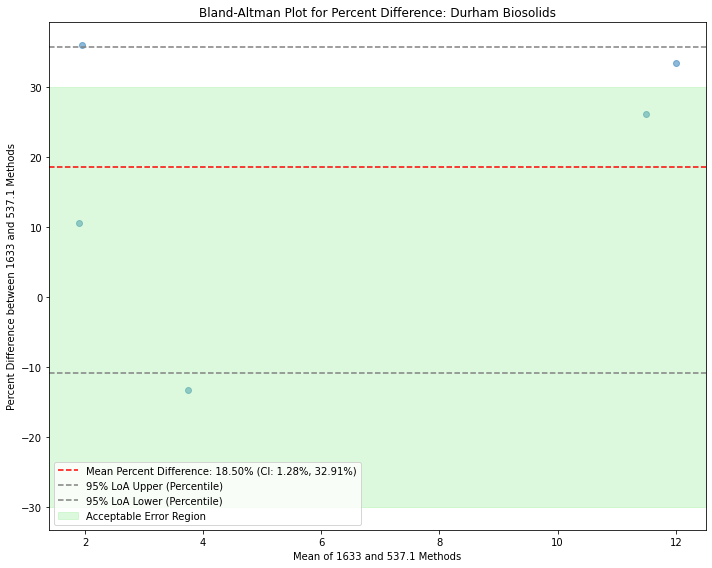

Mean Percent Difference for Durham Biosolids: 18.50% (CI: 1.28%, 32.91%)


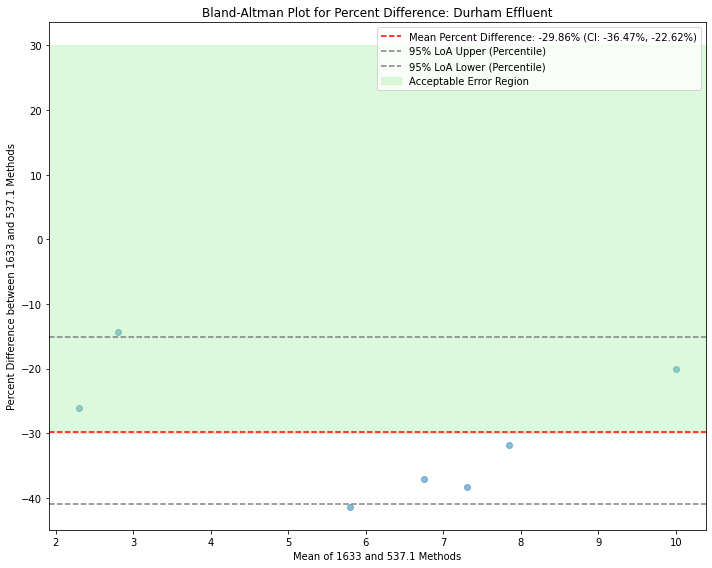

Mean Percent Difference for Durham Effluent: -29.86% (CI: -36.47%, -22.62%)


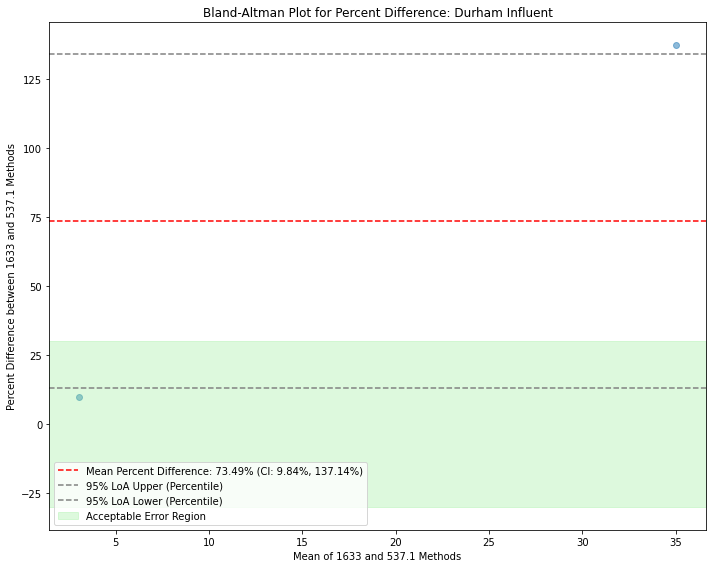

Mean Percent Difference for Durham Influent: 73.49% (CI: 9.84%, 137.14%)


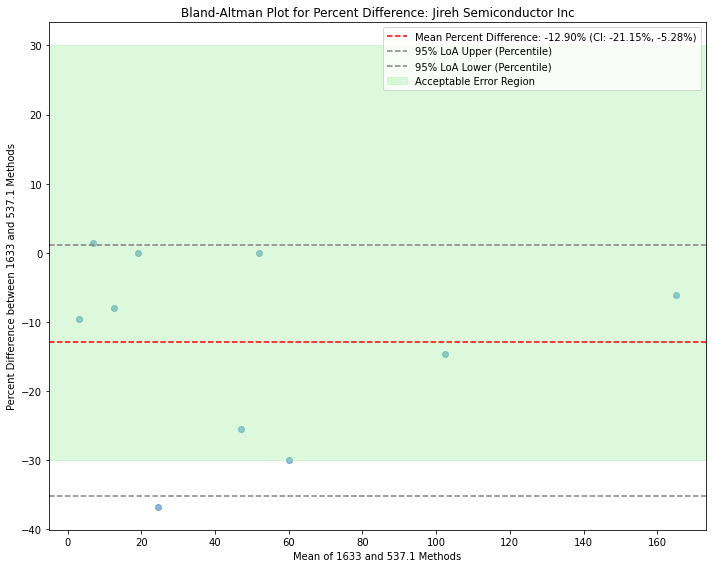

Mean Percent Difference for Jireh Semiconductor Inc: -12.90% (CI: -21.15%, -5.28%)


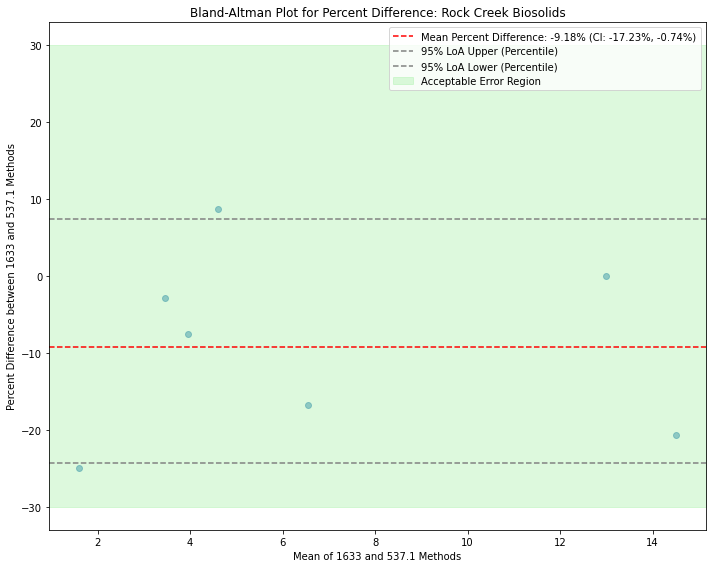

Mean Percent Difference for Rock Creek Biosolids: -9.18% (CI: -17.23%, -0.74%)


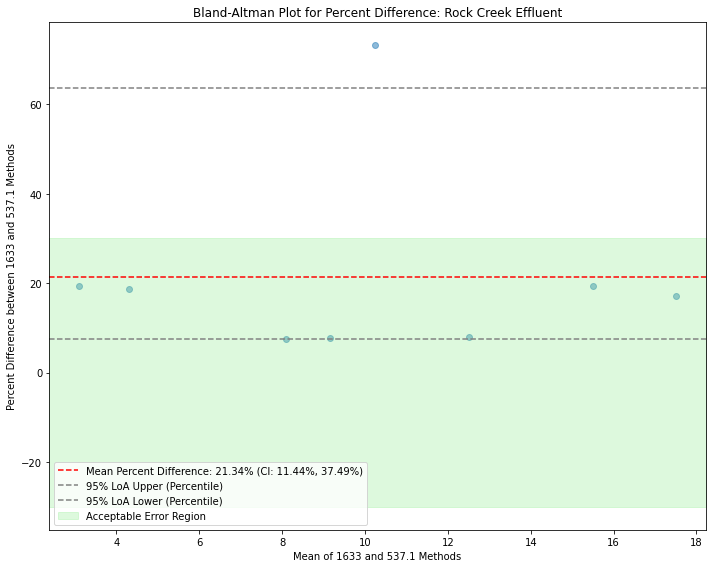

Mean Percent Difference for Rock Creek Effluent: 21.34% (CI: 11.44%, 37.49%)


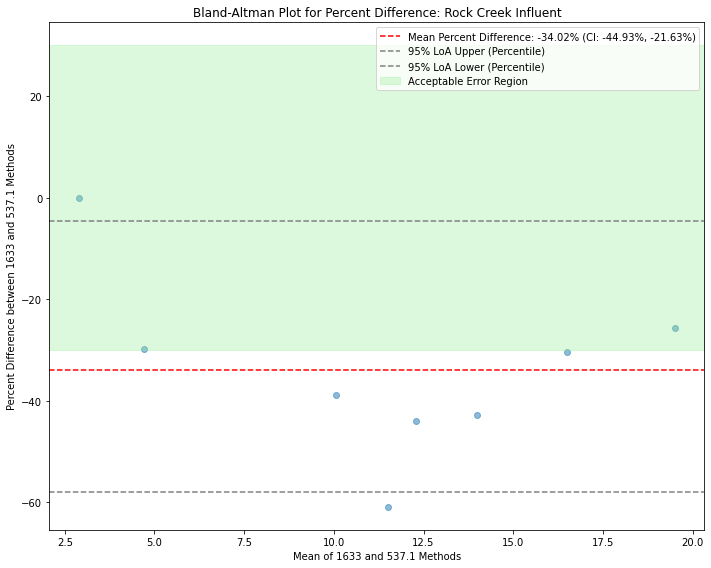

Mean Percent Difference for Rock Creek Influent: -34.02% (CI: -44.93%, -21.63%)


In [28]:
# Iterate through each Sample Location, grouping by 'Sample Location_1633'
for location, group in quant_df.groupby('Sample Location_1633'):
    # Extract the two methods' measurements for the current group
    method1 = group['Quant Only Incl Qual Flags_1633'].dropna()
    method2 = group['Quant Only Incl Qual Flags_5371'].dropna()
    
    # Ensure there are enough data points for a meaningful plot
    if len(method1) > 1 and len(method2) > 1:
        # Calculate the mean of the measurements and the percent difference
        means = (method1 + method2) / 2
        percent_diff = ((method2 - method1) / means) * 100

        # Bootstrap to estimate the CI of the mean percent difference
        ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)

        # Calculate the mean percent difference
        mean_percent_diff = np.mean(percent_diff)

        # Calculate the 2.5th and 97.5th percentiles of the percent differences for the Limits of Agreement (LoA)
        loa_lower = np.percentile(percent_diff, 2.5)
        loa_upper = np.percentile(percent_diff, 97.5)

        # Generate the Bland-Altman plot for percent difference
        plt.figure(figsize=(10, 8))
        plt.scatter(means, percent_diff, alpha=0.5)
        plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}% (CI: {ci_lower:.2f}%, {ci_upper:.2f}%)')
        plt.axhline(loa_upper, color='gray', linestyle='--', label='95% LoA Upper (Percentile)')
        plt.axhline(loa_lower, color='gray', linestyle='--', label='95% LoA Lower (Percentile)')

        # Shade the region of acceptable error (±30% Percent Error)
        xmin, xmax = plt.xlim()
        plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')

        # Adjust the x-axis limits if necessary
        plt.xlim(xmin, xmax)

        # Adding labels and title
        plt.title(f'Bland-Altman Plot for Percent Difference: {location}')
        plt.xlabel('Mean of 1633 and 537.1 Methods')
        plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

        # Adding a legend
        plt.legend()

        plt.tight_layout()
        plt.show()
        print(f"Mean Percent Difference for {location}: {mean_percent_diff:.2f}% (CI: {ci_lower:.2f}%, {ci_upper:.2f}%)")
    else:
        print(f"Not enough data for {location} to generate a Bland-Altman plot.")


#### Custom plots

In [39]:
# Function to create Bland-Altman plot for a given location and dataframe
def create_bland_altman_plot(location, df):
    if len(df) >= 2:
        # Calculate the mean of the measurements and the percent difference
        means = (df['Quant Only Incl Qual Flags_1633'] + df['Quant Only Incl Qual Flags_5371']) / 2
        percent_diff = ((df['Quant Only Incl Qual Flags_5371'] - df['Quant Only Incl Qual Flags_1633']) / means) * 100
        
        # Bootstrap to estimate the CI of the mean percent difference
        ci_lower, ci_upper, _ = bootstrap_mean_ci(percent_diff, n_bootstraps=10000, ci=95)
        
        # Calculate the mean percent difference
        mean_percent_diff = np.mean(percent_diff)
        
        # Calculate the 2.5th and 97.5th percentiles for the Limits of Agreement (LoA)
        loa_lower = np.percentile(percent_diff, 2.5)
        loa_upper = np.percentile(percent_diff, 97.5)
        
        # Generate the Bland-Altman plot
        plt.figure(figsize=(10, 8))
        plt.scatter(means, percent_diff, alpha=0.5)
        plt.axhline(mean_percent_diff, color='red', linestyle='--', label=f'Mean Percent Difference: {mean_percent_diff:.2f}% (CI: {ci_lower:.2f}%, {ci_upper:.2f}%)')
        plt.axhline(loa_upper, color='gray', linestyle='--', label='95% LoA Upper (Percentile)')
        plt.axhline(loa_lower, color='gray', linestyle='--', label='95% LoA Lower (Percentile)')
        
        # Shade the region of acceptable error (±30% Percent Error)
        xmin, xmax = plt.xlim()
        plt.fill_betweenx(y=[-30, 30], x1=xmin, x2=xmax, color='lightgreen', alpha=0.3, label='Acceptable Error Region')
        
        # Adjust the x-axis limits if necessary
        plt.xlim(xmin, xmax)
        
        # Add labels and title
        plt.title(f'Bland-Altman Plot for Percent Difference: {location}')
        plt.xlabel('Mean of Methods 1633 and 537.1')
        plt.ylabel('Percent Difference between Methods 1633 and 537.1')
        
        # Add a legend
        plt.legend()
        
        plt.tight_layout()
        plt.show()



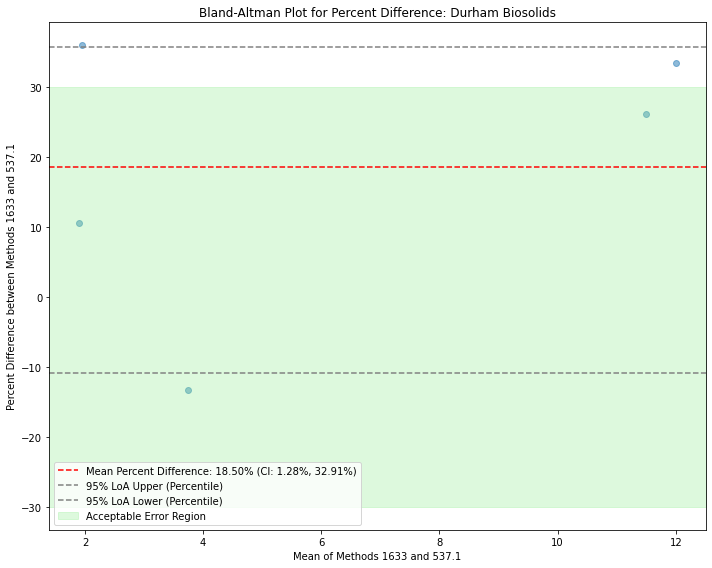

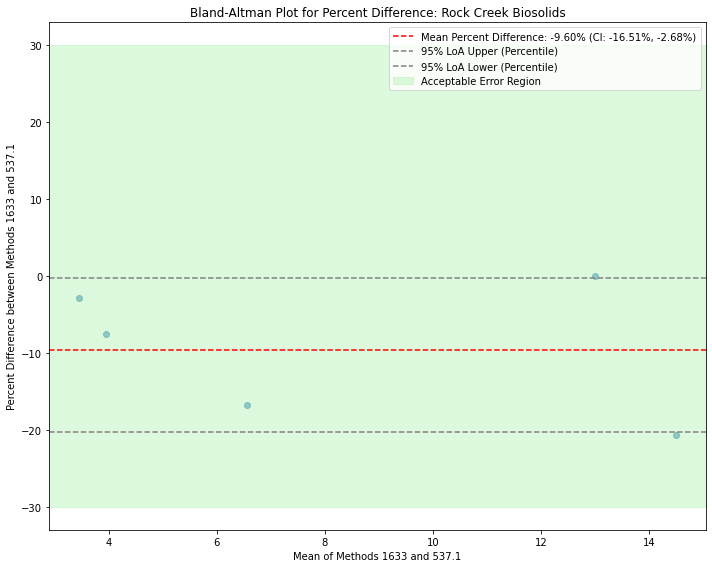

In [52]:
# Define the locations of interest
locations_of_interest = ['Durham Biosolids', 'Rock Creek Biosolids']

# Find common PFAS compounds in both locations
durham_df = quant_df[quant_df['Sample Location_1633'] == 'Durham Biosolids']
rock_creek_df = quant_df[quant_df['Sample Location_1633'] == 'Rock Creek Biosolids']
common_compounds = set(durham_df['PFAS Compound_1633']).intersection(set(rock_creek_df['PFAS Compound_1633']))

# Filter dataframes to only include common compounds
durham_common_df = durham_df[durham_df['PFAS Compound_1633'].isin(common_compounds)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
rock_creek_common_df = rock_creek_df[rock_creek_df['PFAS Compound_1633'].isin(common_compounds)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Create Bland-Altman plots for each location of interest with common PFAS compounds
create_bland_altman_plot('Durham Biosolids', durham_common_df)
create_bland_altman_plot('Rock Creek Biosolids', rock_creek_common_df)


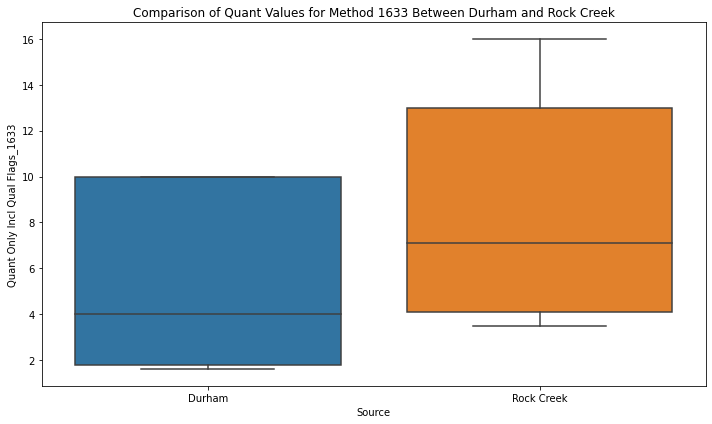

In [53]:
# Add a column to each DataFrame to indicate the source
durham_common_df['Source'] = 'Durham'
rock_creek_common_df['Source'] = 'Rock Creek'

# Concatenate the two DataFrames
combined_df = pd.concat([durham_common_df, rock_creek_common_df], ignore_index=True)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Quant Only Incl Qual Flags_1633', data=combined_df)
plt.title('Comparison of Quant Values for Method 1633 Between Durham and Rock Creek')
plt.ylabel('Quant Only Incl Qual Flags_1633')
plt.xlabel('Source')

plt.tight_layout()
plt.show()

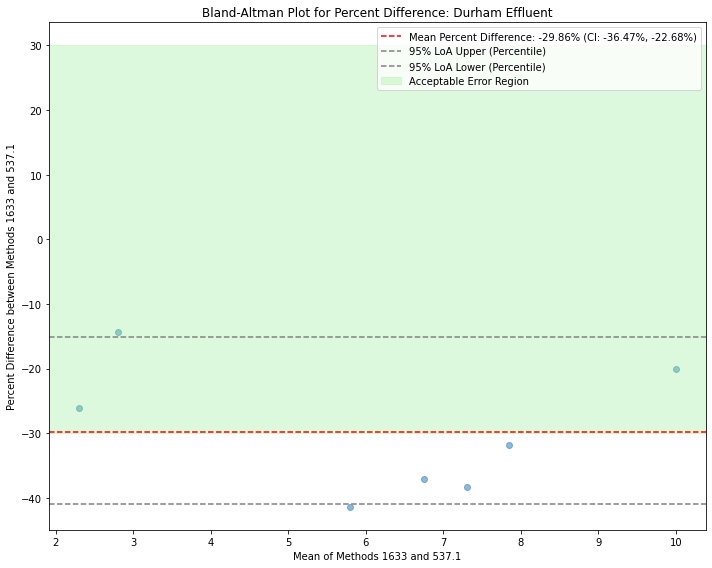

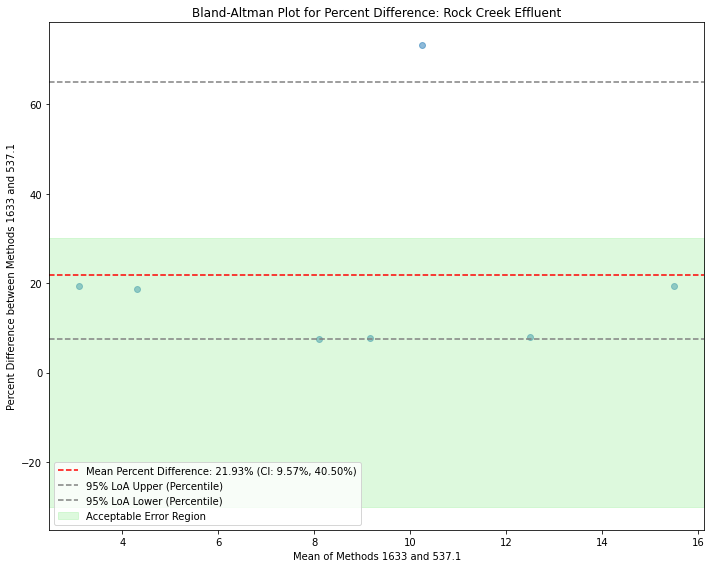

In [50]:
# Define the locations of interest
locations_of_interest = ['Durham Effluent', 'Rock Creek Effluent']

# Find common PFAS compounds in both locations
durham_df = quant_df[quant_df['Sample Location_1633'] == 'Durham Effluent']
rock_creek_df = quant_df[quant_df['Sample Location_1633'] == 'Rock Creek Effluent']
common_compounds = set(durham_df['PFAS Compound_1633']).intersection(set(rock_creek_df['PFAS Compound_1633']))

# Filter dataframes to only include common compounds
durham_common_df = durham_df[durham_df['PFAS Compound_1633'].isin(common_compounds)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
rock_creek_common_df = rock_creek_df[rock_creek_df['PFAS Compound_1633'].isin(common_compounds)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Create Bland-Altman plots for each location of interest with common PFAS compounds
create_bland_altman_plot('Durham Effluent', durham_common_df)
create_bland_altman_plot('Rock Creek Effluent', rock_creek_common_df)

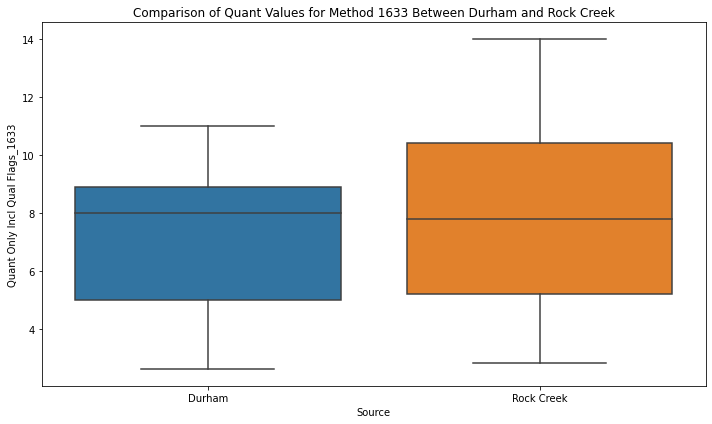

In [51]:
# Add a column to each DataFrame to indicate the source
durham_common_df['Source'] = 'Durham'
rock_creek_common_df['Source'] = 'Rock Creek'

# Concatenate the two DataFrames
combined_df = pd.concat([durham_common_df, rock_creek_common_df], ignore_index=True)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Quant Only Incl Qual Flags_1633', data=combined_df)
plt.title('Comparison of Quant Values for Method 1633 Between Durham and Rock Creek')
plt.ylabel('Quant Only Incl Qual Flags_1633')
plt.xlabel('Source')

plt.tight_layout()
plt.show()

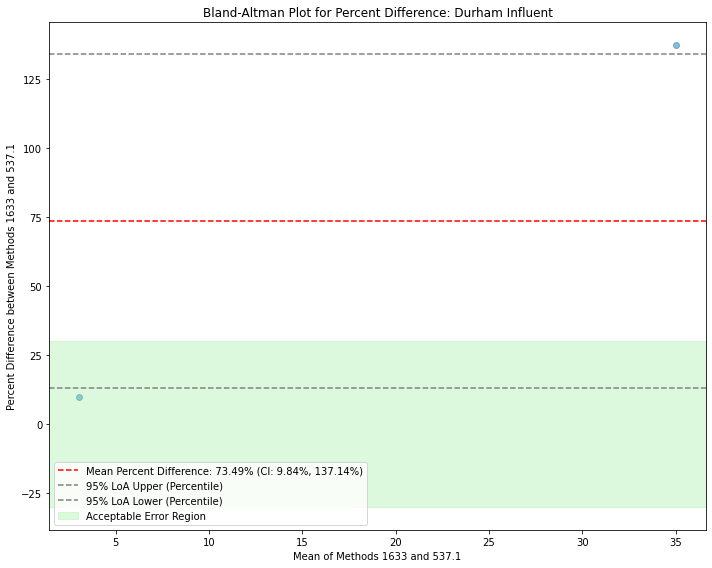

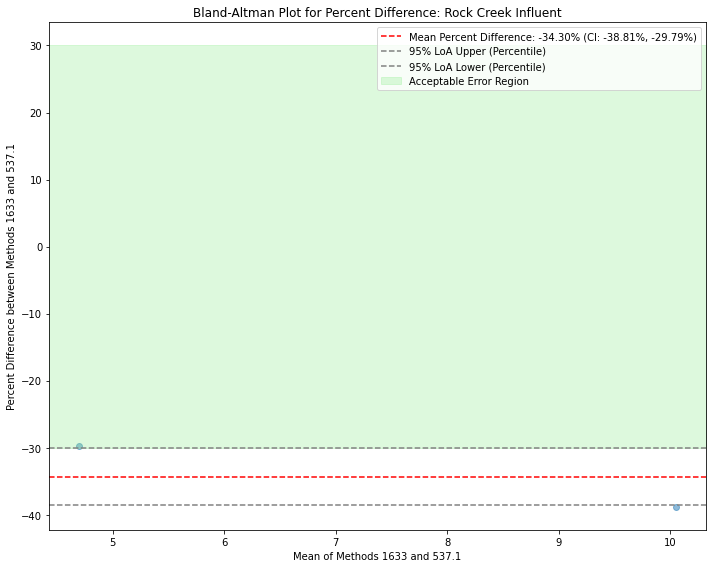

In [43]:
# Define the locations of interest
locations_of_interest = ['Durham Influent', 'Rock Creek Influent']

# Find common PFAS compounds in both locations
durham_df = quant_df[quant_df['Sample Location_1633'] == 'Durham Influent']
rock_creek_df = quant_df[quant_df['Sample Location_1633'] == 'Rock Creek Influent']
common_compounds = set(durham_df['PFAS Compound_1633']).intersection(set(rock_creek_df['PFAS Compound_1633']))

# Filter dataframes to only include common compounds
durham_common_df = durham_df[durham_df['PFAS Compound_1633'].isin(common_compounds)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
rock_creek_common_df = rock_creek_df[rock_creek_df['PFAS Compound_1633'].isin(common_compounds)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Create Bland-Altman plots for each location of interest with common PFAS compounds
create_bland_altman_plot('Durham Influent', durham_common_df)
create_bland_altman_plot('Rock Creek Influent', rock_creek_common_df)

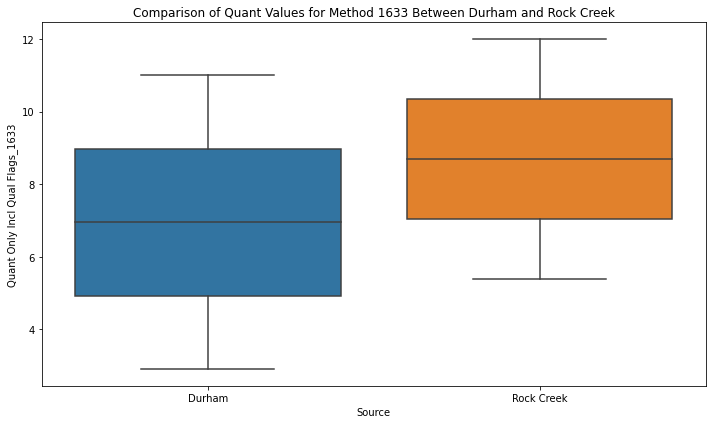

In [49]:
# Add a column to each DataFrame to indicate the source
durham_common_df['Source'] = 'Durham'
rock_creek_common_df['Source'] = 'Rock Creek'

# Concatenate the two DataFrames
combined_df = pd.concat([durham_common_df, rock_creek_common_df], ignore_index=True)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Quant Only Incl Qual Flags_1633', data=combined_df)
plt.title('Comparison of Quant Values for Method 1633 Between Durham and Rock Creek')
plt.ylabel('Quant Only Incl Qual Flags_1633')
plt.xlabel('Source')

plt.tight_layout()
plt.show()

## Histograms

In [99]:
quant_df.columns

Index(['Result_1633', 'Analysis Method_1633', 'Sample Location_1633',
       'Type_1633', 'Sample Date_1633', 'PFAS Compound_1633', 'MDL_1633',
       'Detection Class_1633', 'Quant Only Incl Qual Flags_1633',
       'Quant Incl Estimates Incl Qual Flags_1633',
       'All (w BDL= MDL/2) Incl Qual Flags_1633', 'Units_1633',
       'ChainLength_1633', 'Dominant Contributor_1633', 'Sector_1633',
       'unique_key', 'Result_5371', 'Analysis Method_5371',
       'Sample Location_5371', 'Type_5371', 'Sample Date_5371',
       'PFAS Compound_5371', 'MDL_5371', 'Detection Class_5371',
       'Quant Only Incl Qual Flags_5371',
       'Quant Incl Estimates Incl Qual Flags_5371',
       'All (w BDL= MDL/2) Incl Qual Flags_5371', 'Units_5371',
       'ChainLength_5371', 'Dominant Contributor_5371', 'Sector_5371'],
      dtype='object')

### All Quant

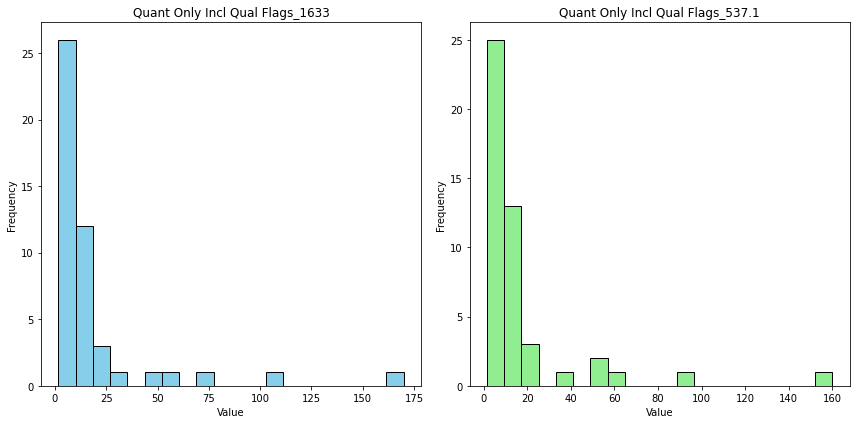

In [100]:
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(quant_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(quant_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()


### By PFAS Compound

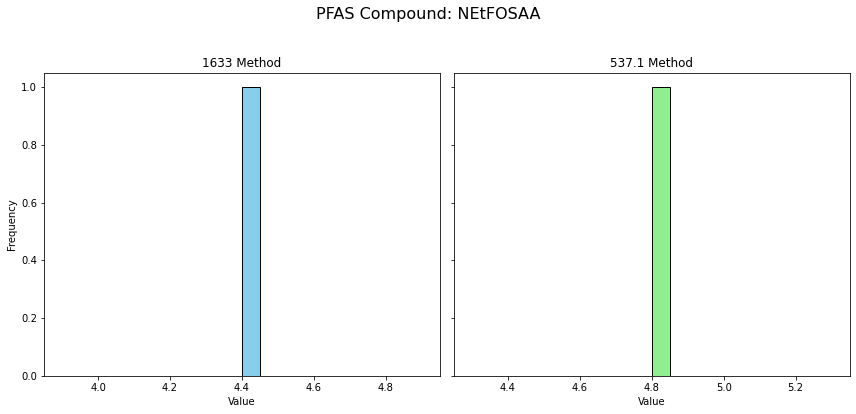

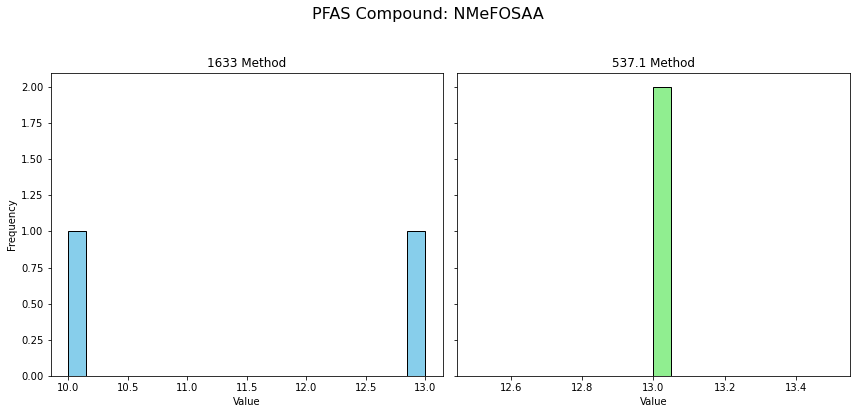

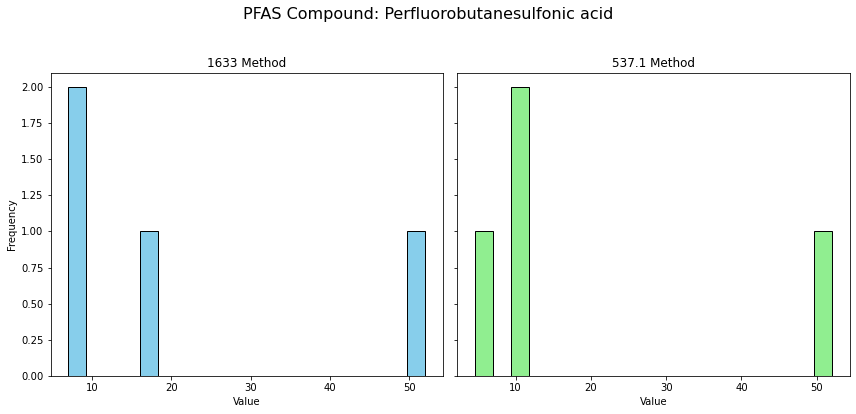

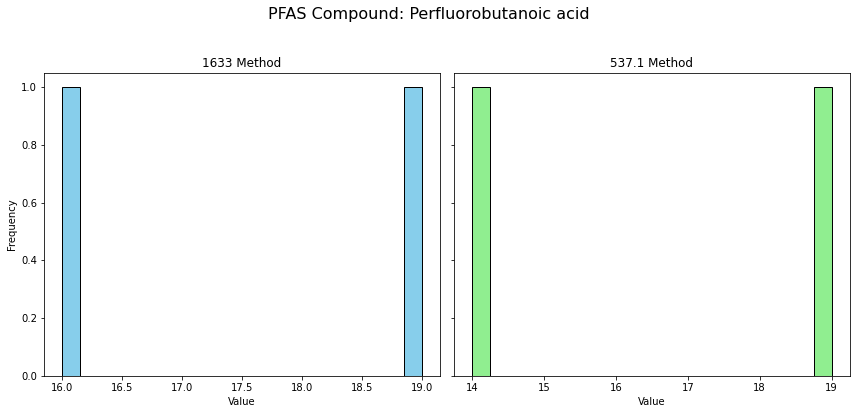

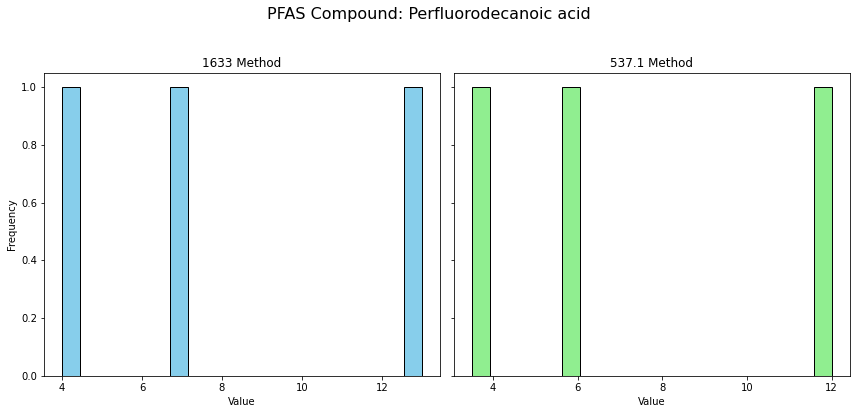

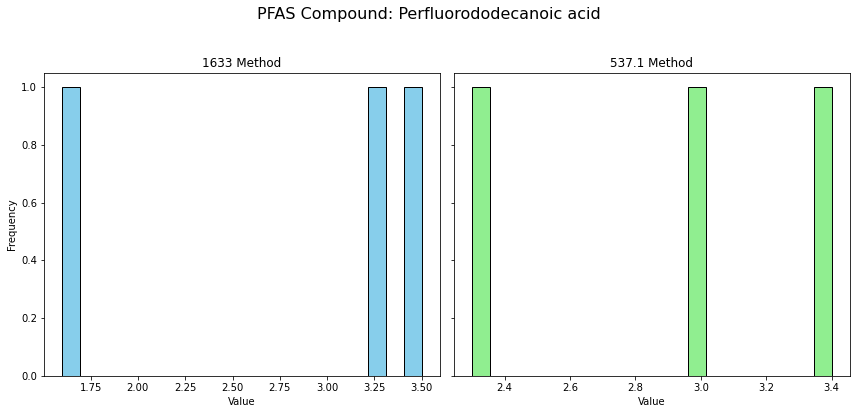

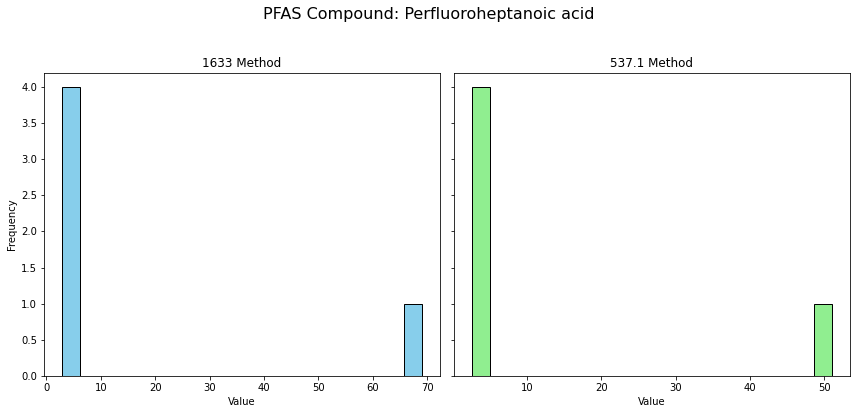

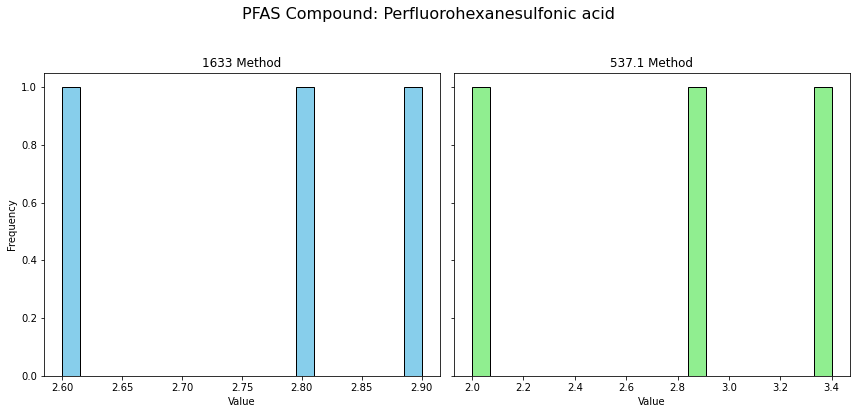

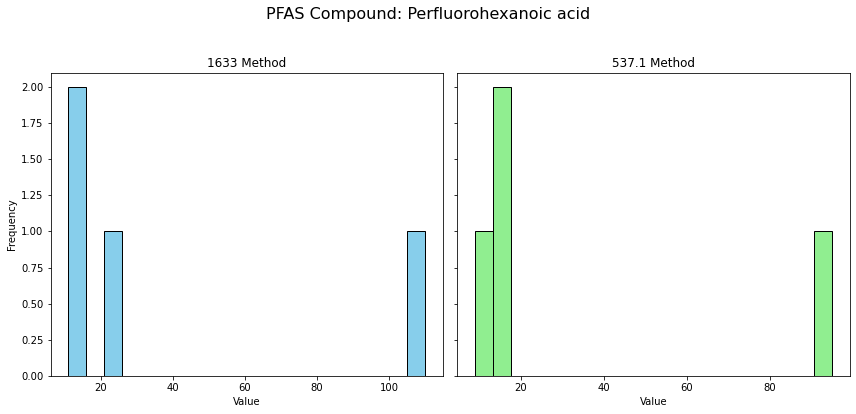

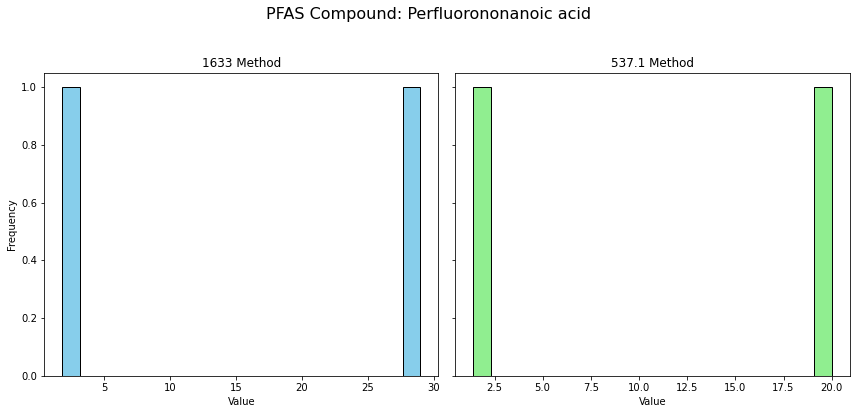

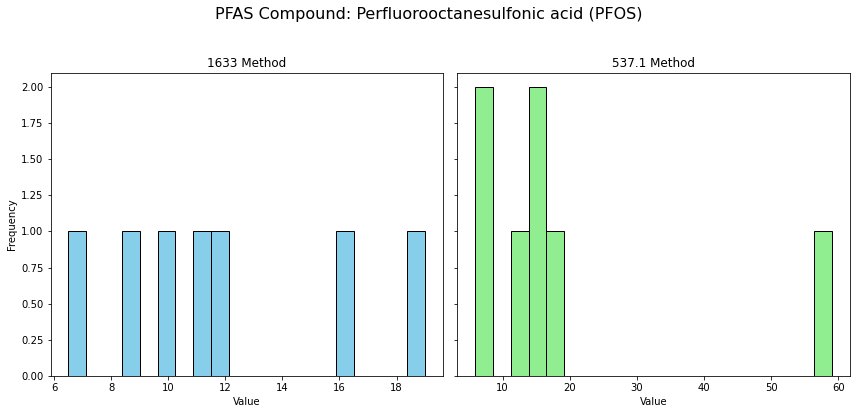

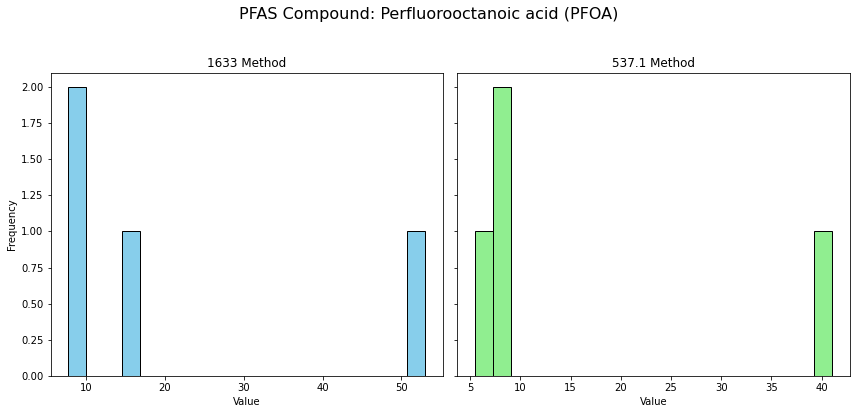

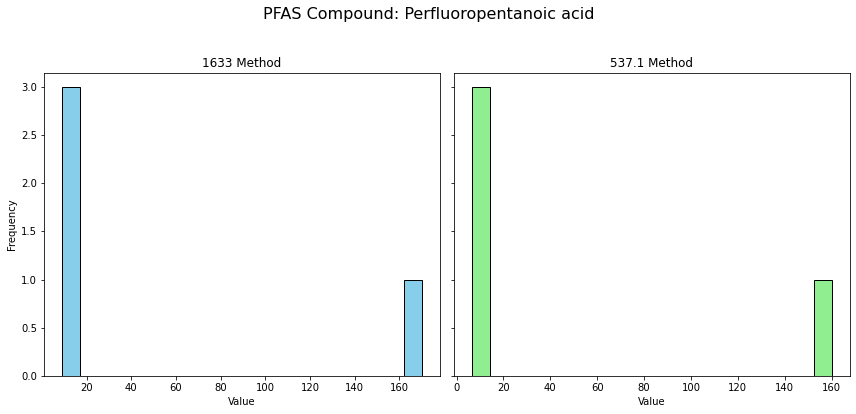

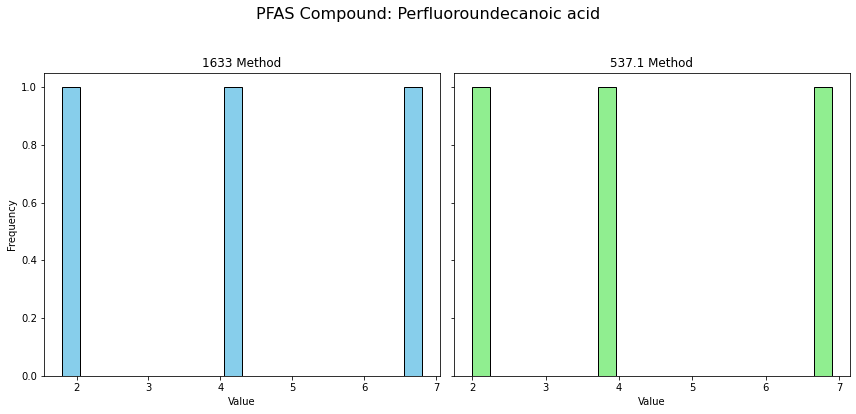

In [101]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = quant_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
    fig.suptitle(f'PFAS Compound: {compound}', fontsize=16)
    
    # Histogram for 'Quant Only Incl Qual Flags_1633'
    axes[0].hist(group['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('1633 Method')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')
    
    # Histogram for 'Quant Only Incl Qual Flags_537.1'
    # Ensure the column name matches exactly, including spaces and punctuation.
    axes[1].hist(group['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
    axes[1].set_title('537.1 Method')
    axes[1].set_xlabel('Value')
    # The Y-axis label is shared, set by the first histogram
    
    # Adjust layout for better spacing and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
    plt.show()


### By PFAS Compound Class

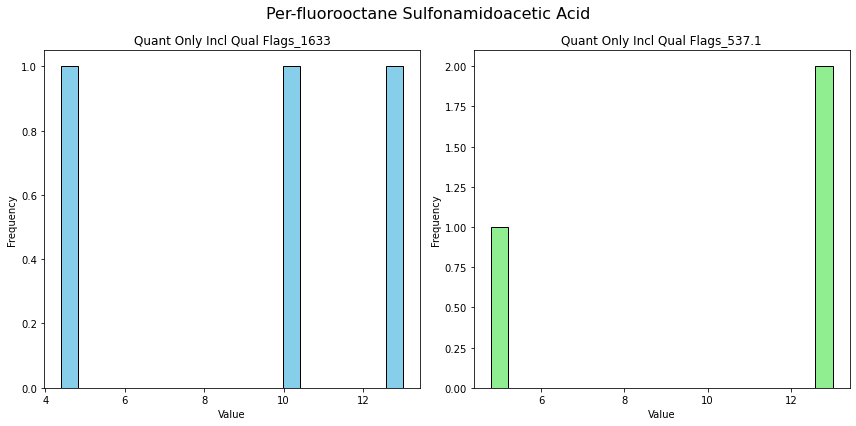

In [103]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Per-fluorooctane Sulfonamidoacetic Acid', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

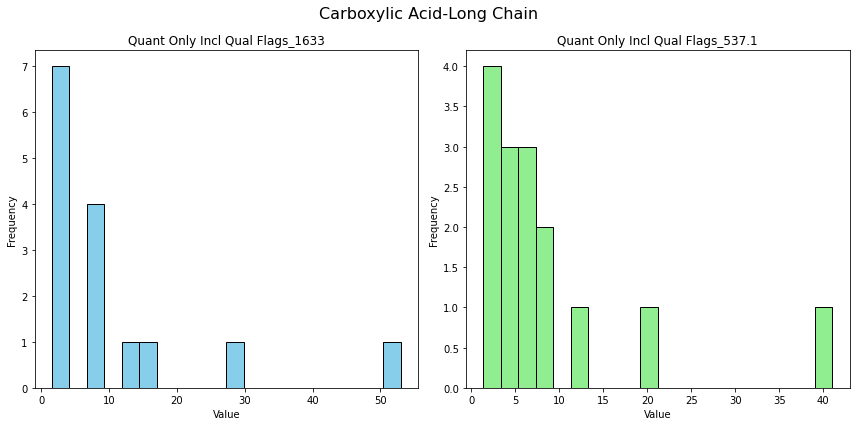

In [109]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Carboxylic Acid-Long Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

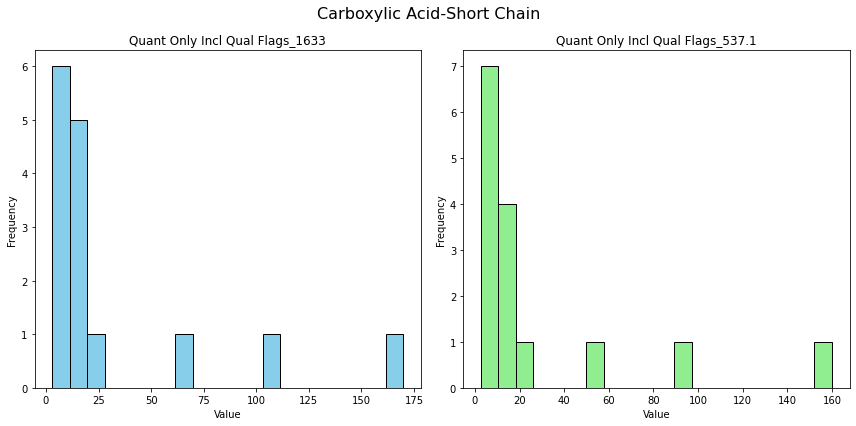

In [110]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Carboxylic Acid-Short Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

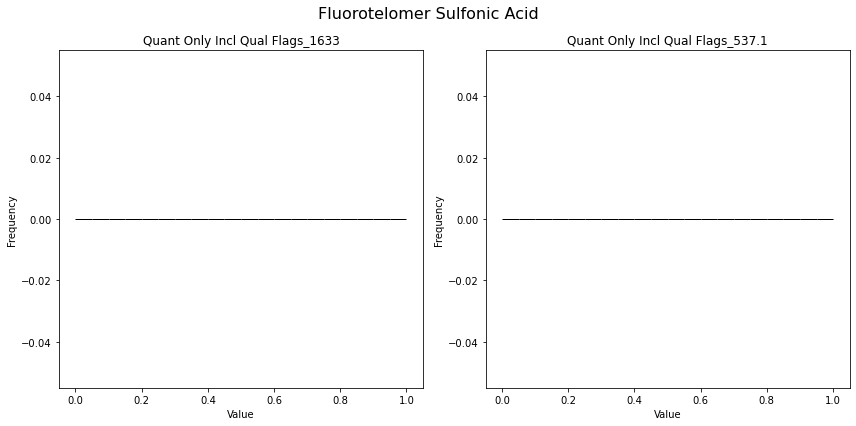

In [111]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Fluorotelomer Sulfonic Acid', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

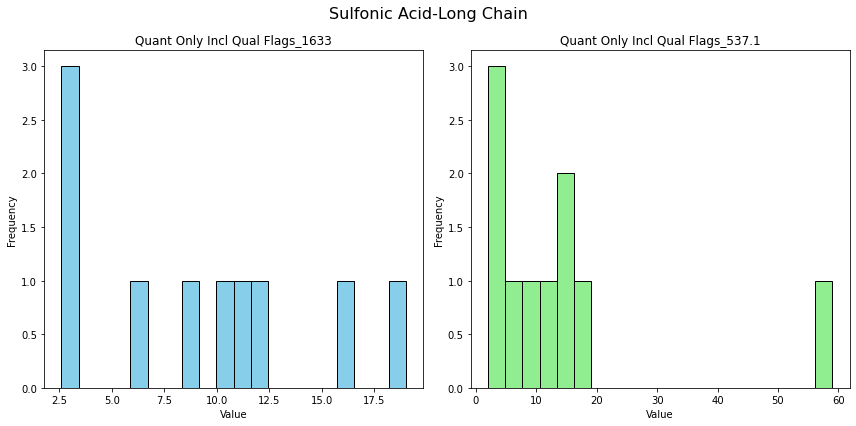

In [112]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Sulfonic Acid-Long Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

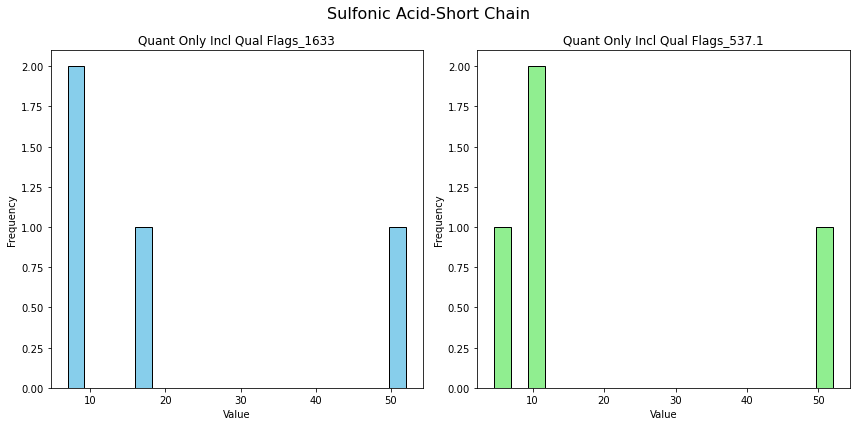

In [113]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Sulfonic Acid-Short Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

### By Type

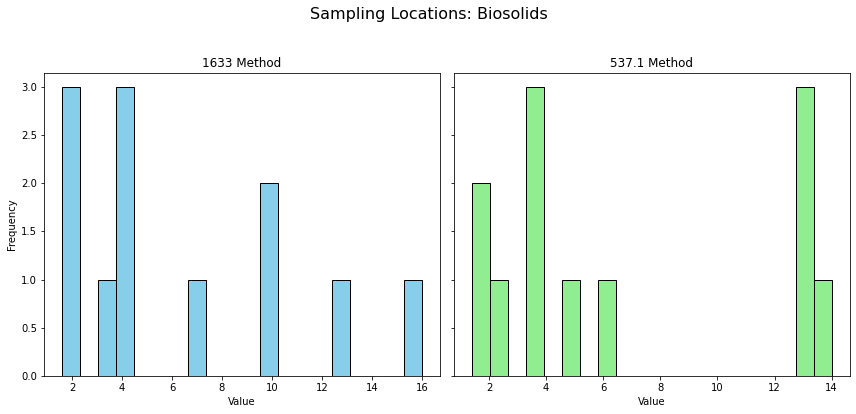

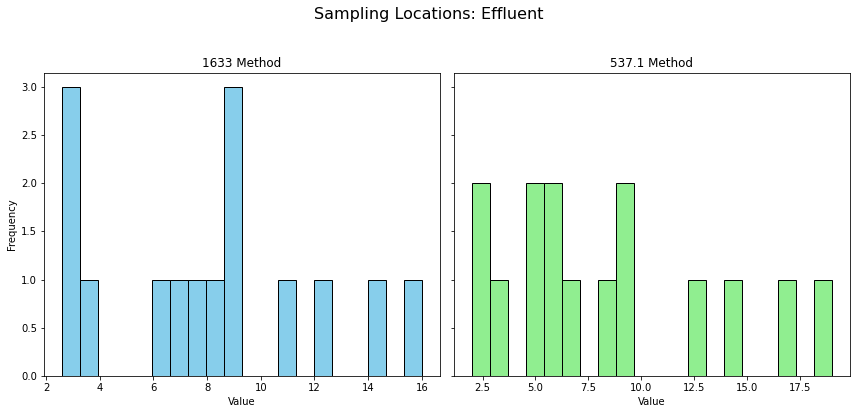

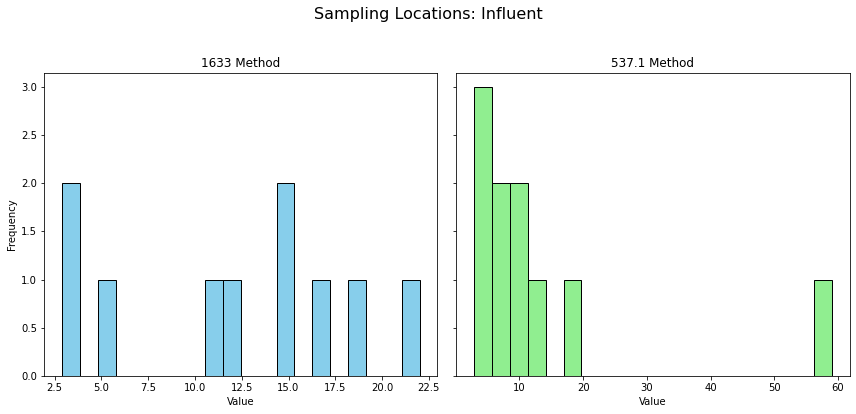

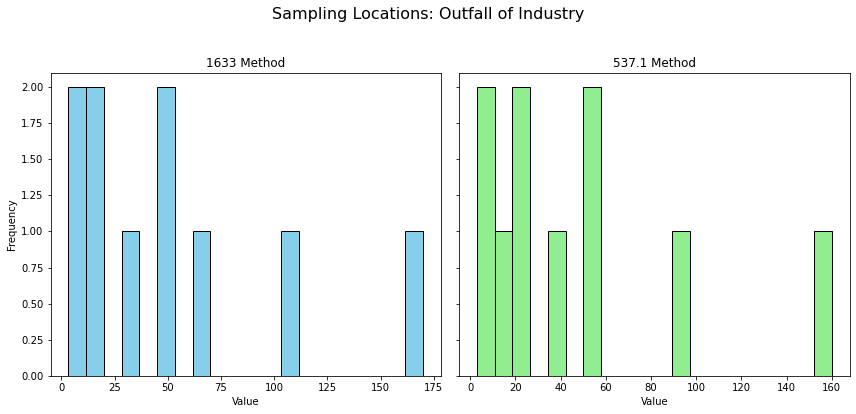

In [137]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = quant_df.groupby('Type_1633')

for Type, group in groups:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
    fig.suptitle(f'Sampling Locations: {Type}', fontsize=16)
    
    # Histogram for 'Quant Only Incl Qual Flags_1633'
    axes[0].hist(group['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('1633 Method')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')
    
    # Histogram for 'Quant Only Incl Qual Flags_537.1'
    # Ensure the column name matches exactly, including spaces and punctuation.
    axes[1].hist(group['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
    axes[1].set_title('537.1 Method')
    axes[1].set_xlabel('Value')
    # The Y-axis label is shared, set by the first histogram
    
    # Adjust layout for better spacing and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
    plt.show()

## Histogram for Differences

### All quant

In [89]:
# Calculate the percent difference
quant_df['Percent_Diff_1633-5371'] = ((quant_df['Quant Only Incl Qual Flags_1633'] - quant_df['Quant Only Incl Qual Flags_5371']) / ((quant_df['Quant Only Incl Qual Flags_1633'] + quant_df['Quant Only Incl Qual Flags_5371']) / 2)) * 100


<ipython-input-89-e73ddace9904>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_df['Percent_Diff_1633-5371'] = ((quant_df['Quant Only Incl Qual Flags_1633'] - quant_df['Quant Only Incl Qual Flags_5371']) / ((quant_df['Quant Only Incl Qual Flags_1633'] + quant_df['Quant Only Incl Qual Flags_5371']) / 2)) * 100


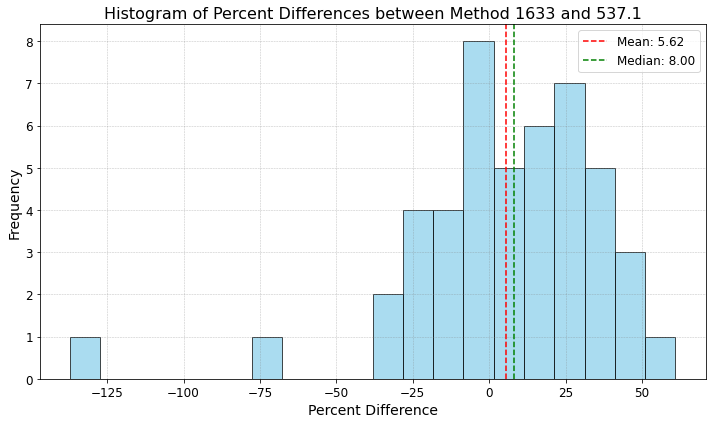

In [90]:
# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(quant_df['Percent_Diff_1633-5371'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(quant_df['Percent_Diff_1633-5371'])
median_val = np.median(quant_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


### By PFAS Compound

Not enough data for NEtFOSAA to generate a histogram.


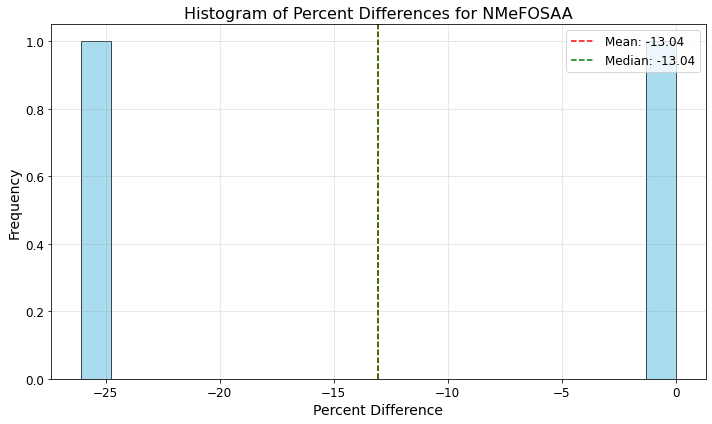

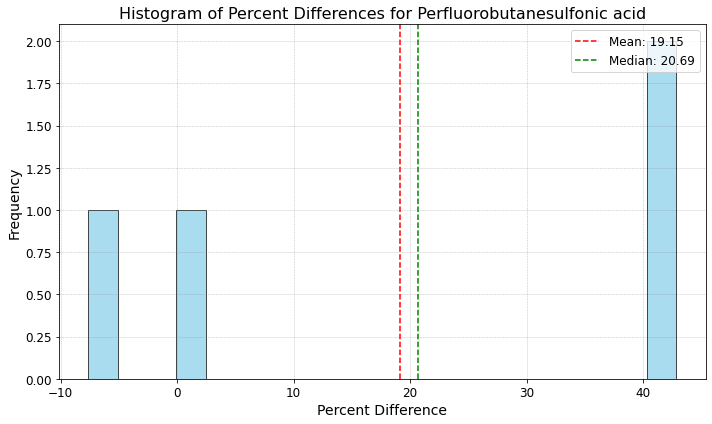

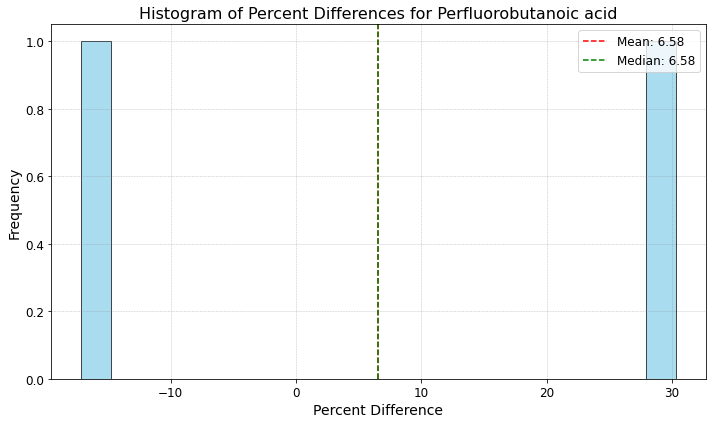

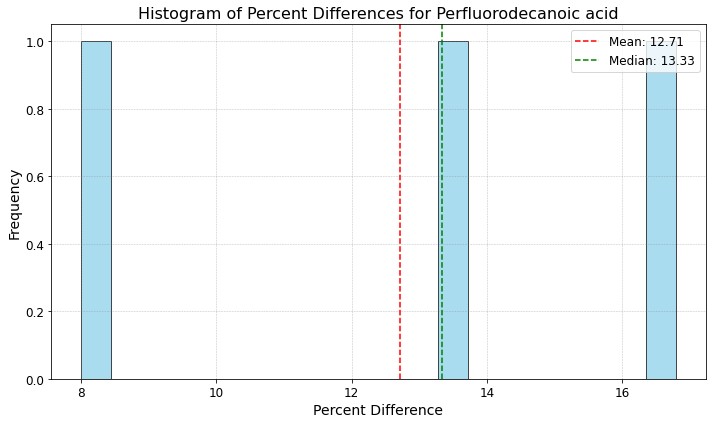

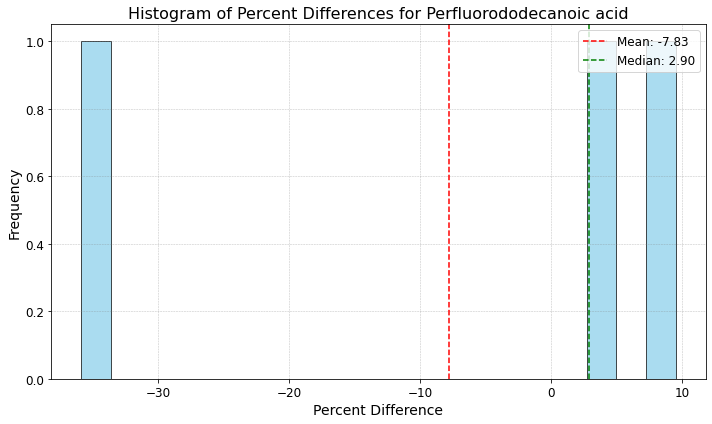

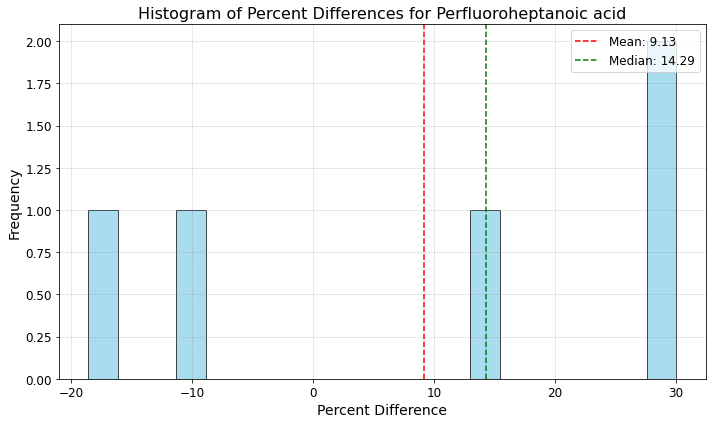

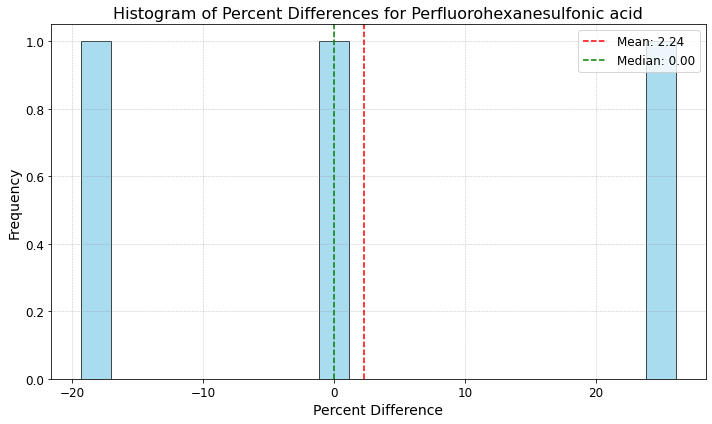

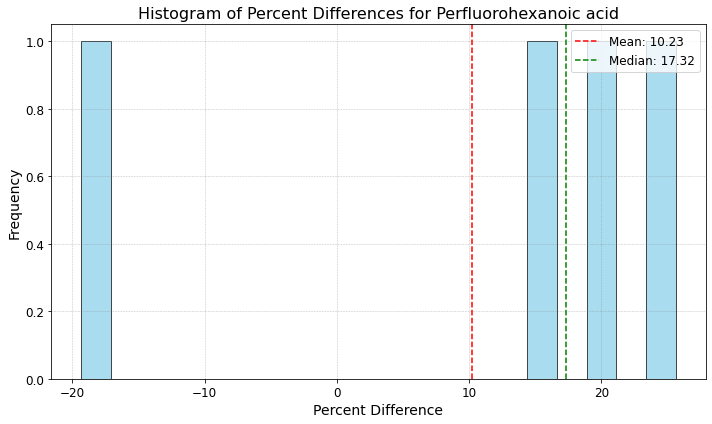

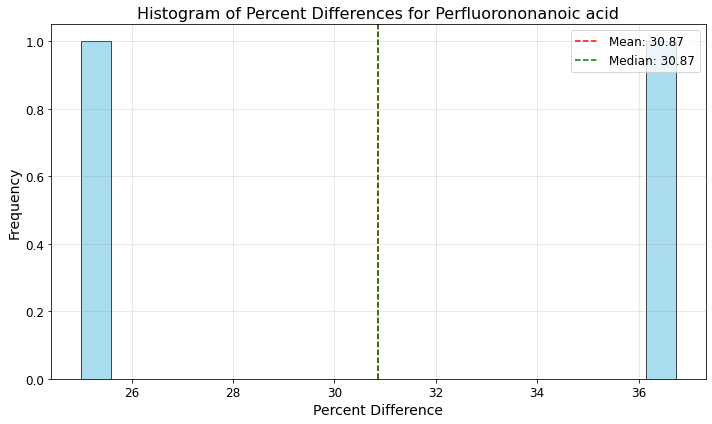

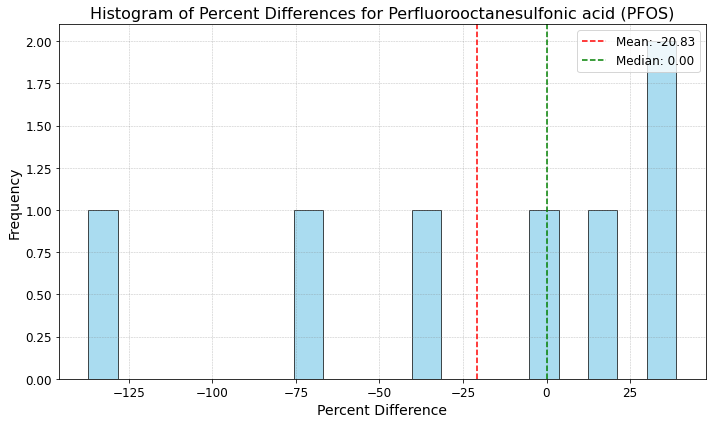

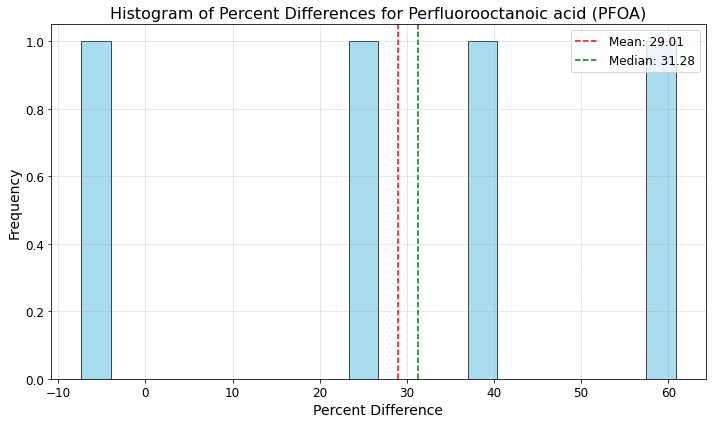

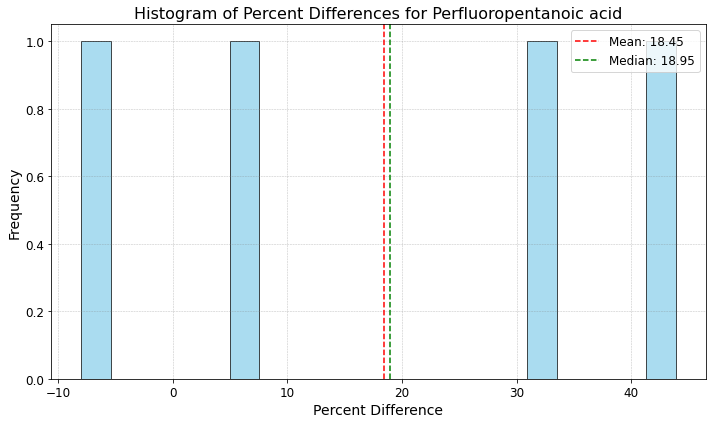

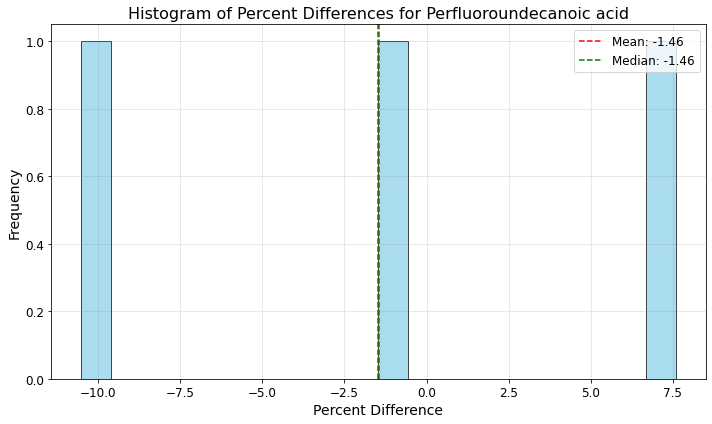

In [91]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = quant_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    # Calculate the percent difference for the current group
    group['Percent_Diff_1633-5371'] = ((group['Quant Only Incl Qual Flags_1633'] - group['Quant Only Incl Qual Flags_5371']) / ((group['Quant Only Incl Qual Flags_1633'] + group['Quant Only Incl Qual Flags_5371']) / 2)) * 100
    
    # Ensure there are enough data points for a meaningful histogram
    if len(group) > 1:
        plt.figure(figsize=(10, 6))
        n, bins, patches = plt.hist(group['Percent_Diff_1633-5371'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

        # Formatting the plot
        plt.title(f'Histogram of Percent Differences for {compound}', fontsize=16)
        plt.xlabel('Percent Difference', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Adding vertical lines for mean and median of the percent differences
        mean_val = np.mean(group['Percent_Diff_1633-5371'])
        median_val = np.median(group['Percent_Diff_1633-5371'])
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

        # Adding a legend
        plt.legend(loc='upper right', fontsize=12)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {compound} to generate a histogram.")



### By PFAS Class

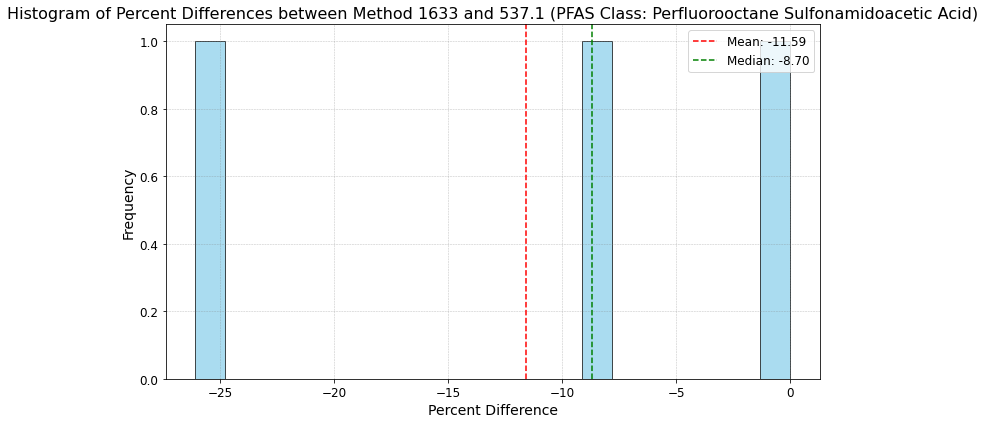

In [92]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['Quant Only Incl Qual Flags_1633'] - filtered_df['Quant Only Incl Qual Flags_5371']) / ((filtered_df['Quant Only Incl Qual Flags_1633'] + filtered_df['Quant Only Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


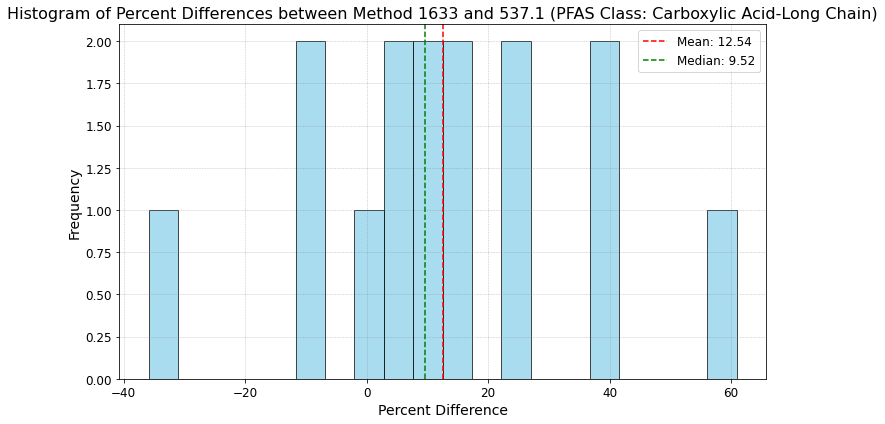

In [93]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['Quant Only Incl Qual Flags_1633'] - filtered_df['Quant Only Incl Qual Flags_5371']) / ((filtered_df['Quant Only Incl Qual Flags_1633'] + filtered_df['Quant Only Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Carboxylic Acid-Long Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


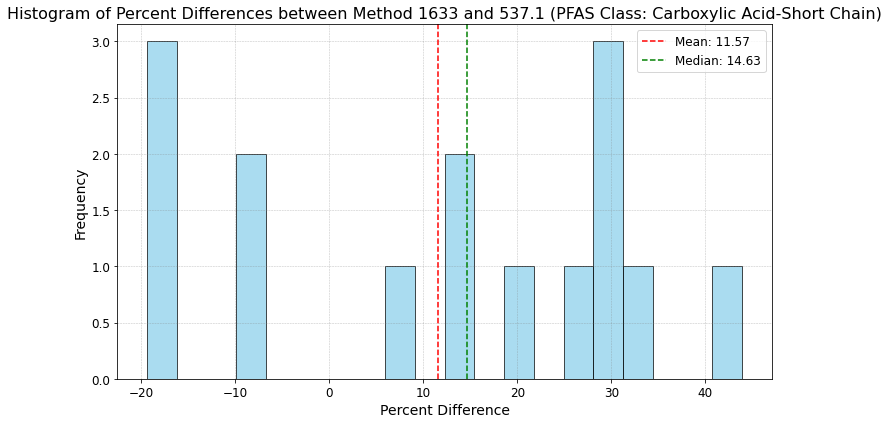

In [94]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['Quant Only Incl Qual Flags_1633'] - filtered_df['Quant Only Incl Qual Flags_5371']) / ((filtered_df['Quant Only Incl Qual Flags_1633'] + filtered_df['Quant Only Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Carboxylic Acid-Short Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


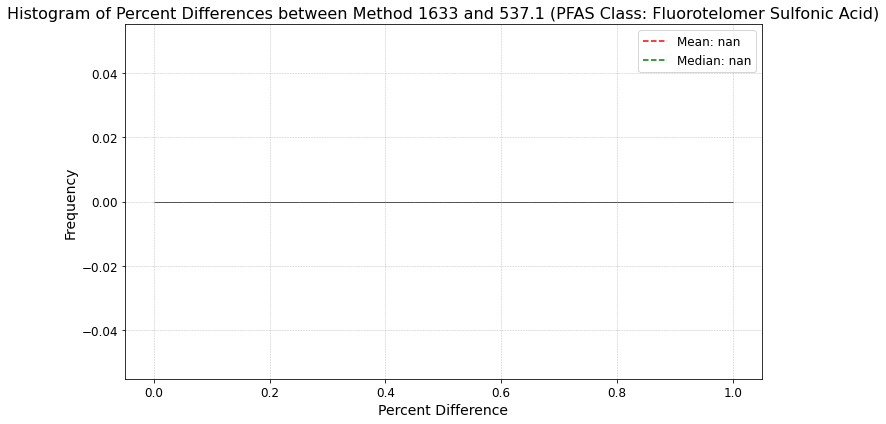

In [95]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['Quant Only Incl Qual Flags_1633'] - filtered_df['Quant Only Incl Qual Flags_5371']) / ((filtered_df['Quant Only Incl Qual Flags_1633'] + filtered_df['Quant Only Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Fluorotelomer Sulfonic Acid)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


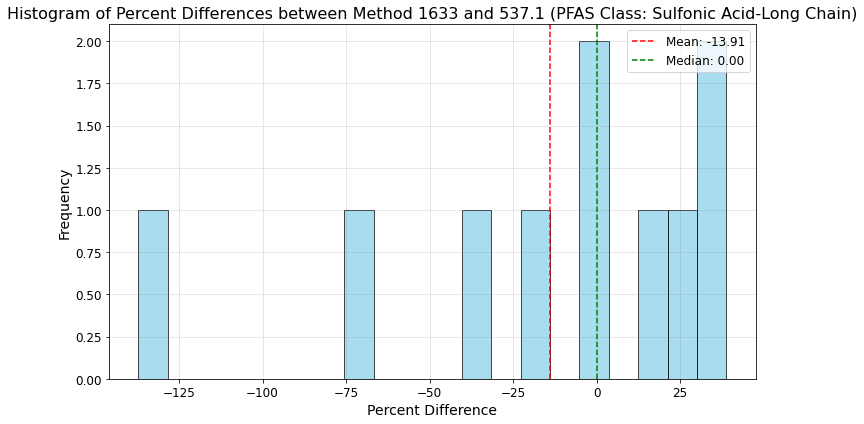

In [96]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['Quant Only Incl Qual Flags_1633'] - filtered_df['Quant Only Incl Qual Flags_5371']) / ((filtered_df['Quant Only Incl Qual Flags_1633'] + filtered_df['Quant Only Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Sulfonic Acid-Long Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


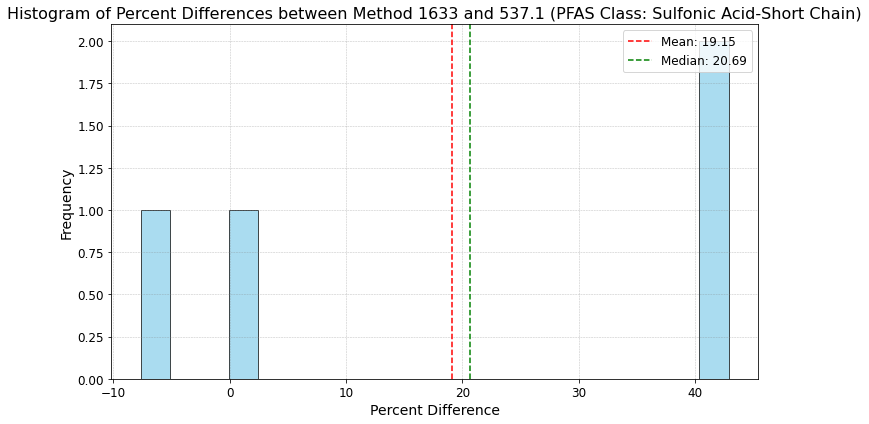

In [97]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['Quant Only Incl Qual Flags_1633'] - filtered_df['Quant Only Incl Qual Flags_5371']) / ((filtered_df['Quant Only Incl Qual Flags_1633'] + filtered_df['Quant Only Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Sulfonic Acid-Short Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


### By Type

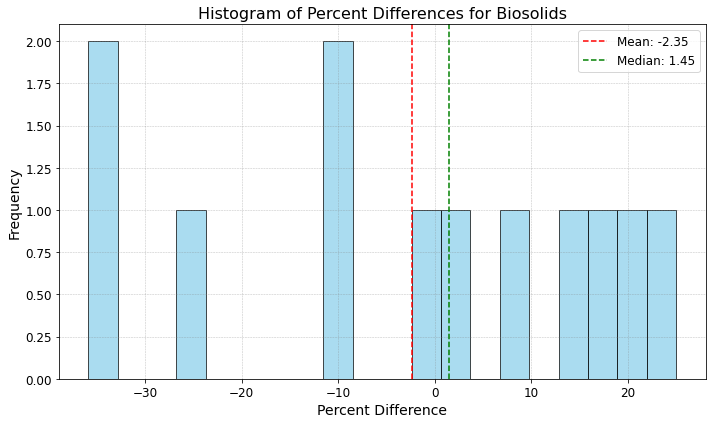

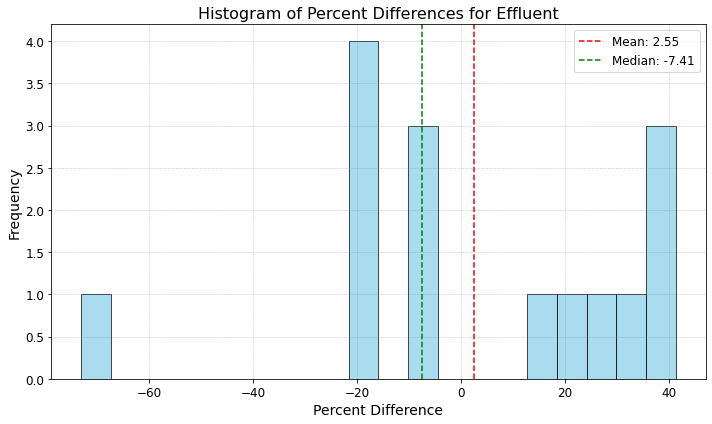

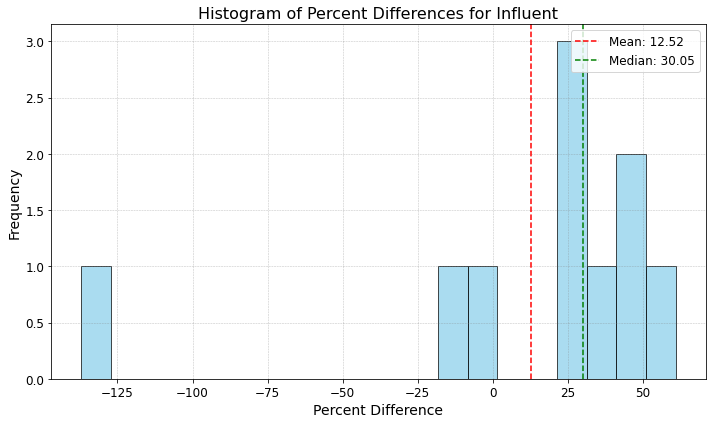

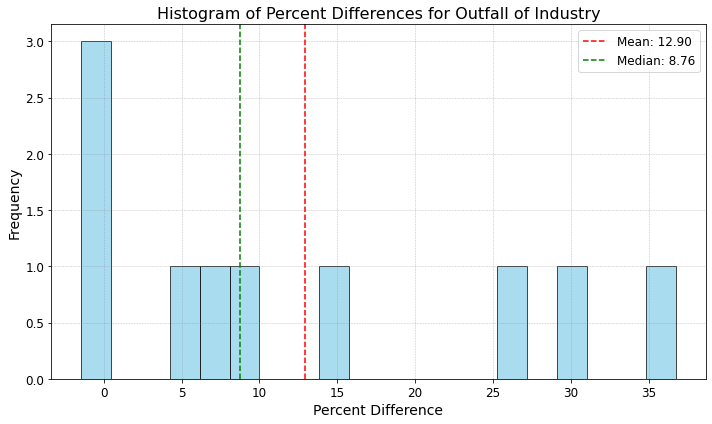

In [138]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = quant_df.groupby('Type_1633')

for Type, group in groups:
    # Calculate the percent difference for the current group
    group['Percent_Diff_1633-5371'] = ((group['Quant Only Incl Qual Flags_1633'] - group['Quant Only Incl Qual Flags_5371']) / ((group['Quant Only Incl Qual Flags_1633'] + group['Quant Only Incl Qual Flags_5371']) / 2)) * 100
    
    # Ensure there are enough data points for a meaningful histogram
    if len(group) > 1:
        plt.figure(figsize=(10, 6))
        n, bins, patches = plt.hist(group['Percent_Diff_1633-5371'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

        # Formatting the plot
        plt.title(f'Histogram of Percent Differences for {Type}', fontsize=16)
        plt.xlabel('Percent Difference', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Adding vertical lines for mean and median of the percent differences
        mean_val = np.mean(group['Percent_Diff_1633-5371'])
        median_val = np.median(group['Percent_Diff_1633-5371'])
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

        # Adding a legend
        plt.legend(loc='upper right', fontsize=12)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {Type} to generate a histogram.")

### By Sample Location

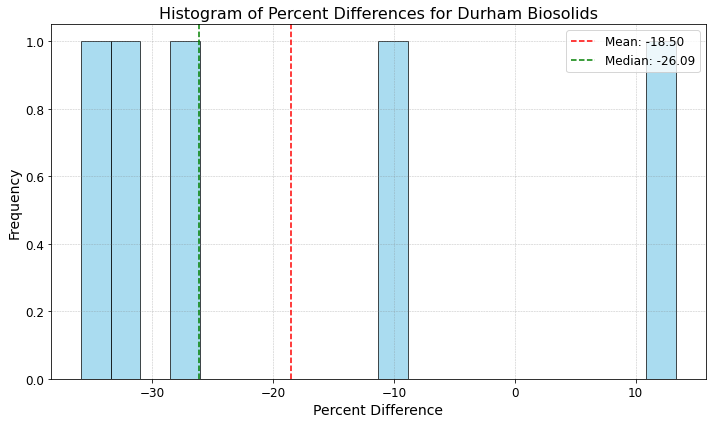

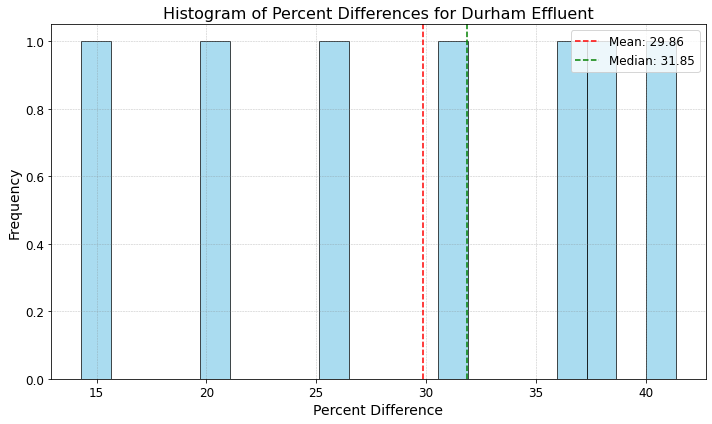

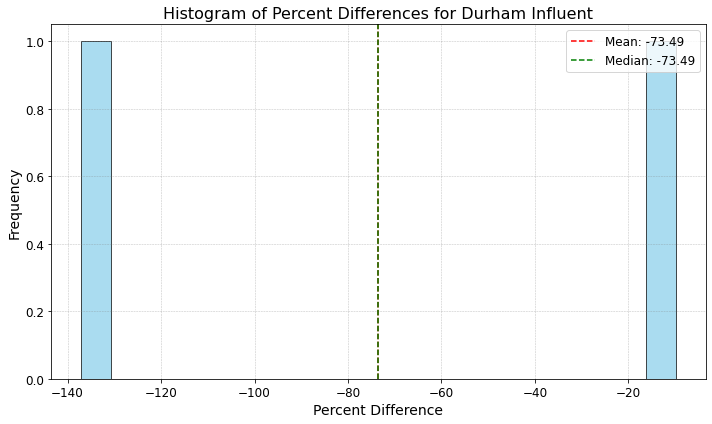

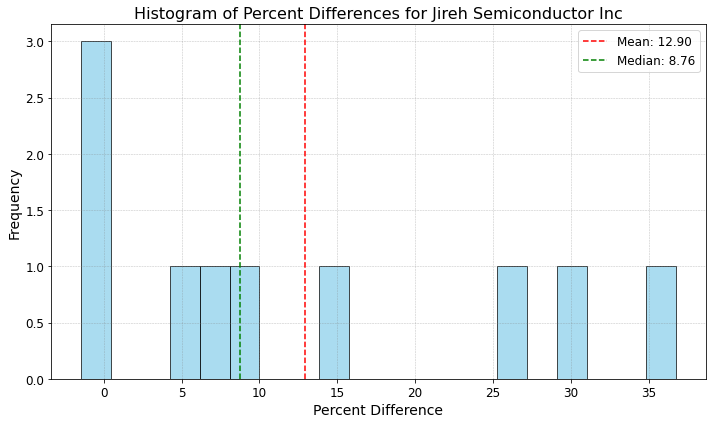

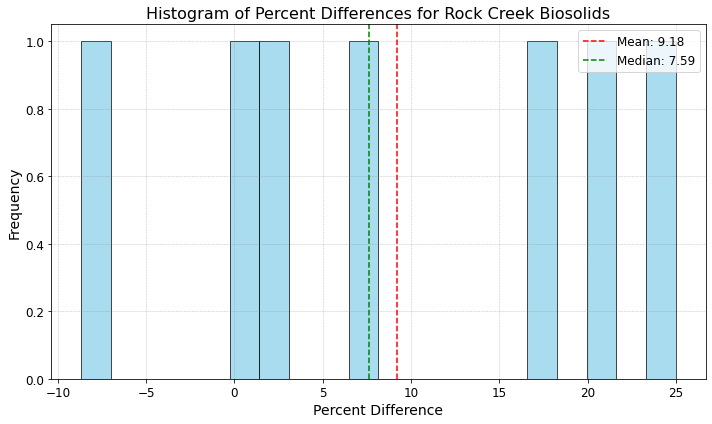

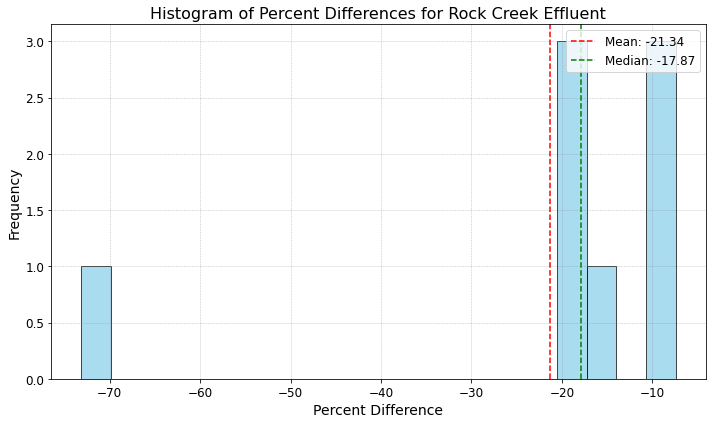

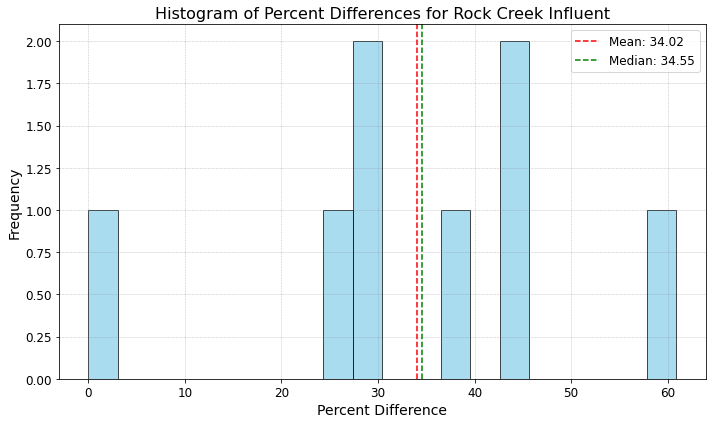

In [68]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = quant_df.groupby('Sample Location_1633')

for Type, group in groups:
    # Calculate the percent difference for the current group
    group['Percent_Diff_1633-5371'] = ((group['Quant Only Incl Qual Flags_1633'] - group['Quant Only Incl Qual Flags_5371']) / ((group['Quant Only Incl Qual Flags_1633'] + group['Quant Only Incl Qual Flags_5371']) / 2)) * 100
    
    # Ensure there are enough data points for a meaningful histogram
    if len(group) > 1:
        plt.figure(figsize=(10, 6))
        n, bins, patches = plt.hist(group['Percent_Diff_1633-5371'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

        # Formatting the plot
        plt.title(f'Histogram of Percent Differences for {Type}', fontsize=16)
        plt.xlabel('Percent Difference', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Adding vertical lines for mean and median of the percent differences
        mean_val = np.mean(group['Percent_Diff_1633-5371'])
        median_val = np.median(group['Percent_Diff_1633-5371'])
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

        # Adding a legend
        plt.legend(loc='upper right', fontsize=12)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {Type} to generate a histogram.")

## Kolmogorov-Smirnov test 

In [69]:
#Prepare data
#The test assumes that the samples are independent. Measurements within each method and between methods should not be paired or matched.
#This means we want to compare all quant results for both methods but they don't necessarily need to both be quant detection class.
quant_df_1633=subset_df_1633[subset_df_1633['Detection Class']=='Quant']
quant_df_537=subset_df_537[subset_df_537['Detection Class']=='Quant']

In [142]:
quant_df_1633.columns

Index(['Result', 'Analysis Method', 'Sample Location', 'Type', 'Sample Date',
       'PFAS Compound', 'MDL', 'Detection Class', 'Quant Only Incl Qual Flags',
       'Quant Incl Estimates Incl Qual Flags',
       'All (w BDL= MDL/2) Incl Qual Flags', 'Units', 'ChainLength',
       'Dominant Contributor', 'Sector', 'unique_key'],
      dtype='object')

### All Quant

In [143]:
# Perform the two-sample K-S test
statistic, p_value = ks_2samp(quant_df_1633['Quant Only Incl Qual Flags'], quant_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")


K-S statistic: 0.2676056338028169
P-value: 0.005713731726958771


In [181]:
quant_df.head()

Result_1633 Analysis Method_1633 Sample Location_1633  Type_1633  \
11          10                 1633     Durham Biosolids  Biosolids   
15           4                 1633     Durham Biosolids  Biosolids   
17         1.6                 1633     Durham Biosolids  Biosolids   
25          10                 1633     Durham Biosolids  Biosolids   
31         1.8                 1633     Durham Biosolids  Biosolids   

   Sample Date_1633                   PFAS Compound_1633  MDL_1633  \
11       2023-12-05                             NMeFOSAA       NaN   
15       2023-12-05               Perfluorodecanoic acid       NaN   
17       2023-12-05             Perfluorododecanoic acid       NaN   
25       2023-12-05  Perfluorooctanesulfonic acid (PFOS)       NaN   
31       2023-12-05             Perfluoroundecanoic acid       NaN   

   Detection Class_1633  Quant Only Incl Qual Flags_1633  \
11                Quant                             10.0   
15                Quant                              4.0   
17                Quant                              1.6   
25                Quant                             10.0   
31                Quant                              1.8   

    Quant Incl Estimates Incl Qual Flags_1633  ...  MDL_5371  \
11                                       10.0  ...       NaN   
15                                        4.0  ...       NaN   
17                                        1.6  ...       NaN   
25                                       10.0  ...       NaN   
31                                        1.8  ...       NaN   

   Detection Class_5371  Quant Only Incl Qual Flags_5371  \
11                Quant                             13.0   
15                Quant                              3.5   
17                Quant                              2.3   
25                Quant                             14.0   
31                Quant                              2.0   

   Quant Incl Estimates Incl Qual Flags_5371  \
11                                      13.0   
15                                       3.5   
17                                       2.3   
25                                      14.0   
31                                       2.0   

   All (w BDL= MDL/2) Incl Qual Flags_5371 Units_5371 ChainLength_5371  \
11                                    13.0     ppb_wt              8.0   
15                                     3.5     ppb_wt             10.0   
17                                     2.3     ppb_wt             12.0   
25                                    14.0     ppb_wt              8.0   
31                                     2.0     ppb_wt             11.0   

   Dominant Contributor_5371 Sector_5371 Diff_1633-5371  
11                       NaN         NaN           -3.0  
15                       NaN         NaN            0.5  
17                       NaN         NaN           -0.7  
25                       NaN         NaN           -4.0  
31                       NaN         NaN           -0.2  

[5 rows x 32 columns]

In [182]:
# Perform the two-sample K-S test
statistic, p_value = ks_2samp(quant_df['Quant Only Incl Qual Flags_1633'], quant_df['Quant Only Incl Qual Flags_5371'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")


K-S statistic: 0.0851063829787234
P-value: 0.9964306313659149


### By PFAS Compound

In [148]:
# Identify common PFAS compounds in both dataframes
common_compounds = set(quant_df_1633['PFAS Compound']).intersection(set(quant_df_537['PFAS Compound']))
# Results container
ks_results = []

for compound in common_compounds:
    # Filter each dataframe for the current PFAS compound
    data_1633 = quant_df_1633[quant_df_1633['PFAS Compound'] == compound]['Quant Only Incl Qual Flags'].dropna()
    data_537 = quant_df_537[quant_df_537['PFAS Compound'] == compound]['Quant Only Incl Qual Flags'].dropna()
    
    # Ensure both groups have enough data points
    if len(data_1633) > 1 and len(data_537) > 1:
        # Perform the K-S test
        statistic, p_value = ks_2samp(data_1633, data_537)
        
        # Store the results
        ks_results.append((compound, statistic, p_value))
    else:
        print(f"Not enough data for {compound} to perform K-S test.")

# Optionally, convert the results list to a DataFrame for better visualization
ks_results_df = pd.DataFrame(ks_results, columns=['PFAS Compound', 'K-S Statistic', 'P-Value'])
print(ks_results_df)


Not enough data for Perfluorooctanesulfonamide to perform K-S test.
                          PFAS Compound  K-S Statistic   P-Value
0                Perfluorononanoic acid       0.333333  0.981818
1               Perfluoropentanoic acid       0.545455  0.272527
2                              NMeFOSAA       0.750000  0.400000
3                              NEtFOSAA       1.000000  0.200000
4                Perfluorobutanoic acid       0.500000  0.678571
5         Perfluorooctanoic acid (PFOA)       0.294118  0.803144
6              Perfluoroundecanoic acid       0.400000  0.857143
7                Perfluorodecanoic acid       0.333333  0.811189
8          Perfluorobutanesulfonic acid       0.550000  0.259740
9               Perfluoroheptanoic acid       0.300000  0.837589
10  Perfluorooctanesulfonic acid (PFOS)       0.526786  0.094030
11         Perfluorohexanesulfonic acid       0.466667  0.678571
12             Perfluorododecanoic acid       0.400000  0.857143
13               Perfl

### By PFAS Class

In [153]:
subset_df_1633=subset_df[subset_df['Analysis Method']==1633]
subset_df_537=subset_df[subset_df['Analysis Method']=='537.1 (mod)']

In [154]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.262987012987013
P-value: 0.31200187396569745


In [155]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.24453211517165005
P-value: 0.011361884918497323


In [156]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.49974437627811863
P-value: 2.483050607493542e-05


In [157]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.015625
P-value: 1


In [159]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.03409090909090909
P-value: 1


In [160]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.16965417345645484
P-value: 0.2189299673940811


In [162]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.22723253757736517
P-value: 0.5254750529796883


### By Type

In [72]:
# Assuming quant_df_1633 and quant_df_537 are your DataFrames filtered by 'Detection Class' == 'Quant'
# Identify common Sample Locations in both dataframes
common_types = set(quant_df_1633['Type']).intersection(set(quant_df_537['Type']))

# Results container
ks_results = []

for Type in common_types:
    # Filter each dataframe for the current Sample Location
    data_1633 = quant_df_1633[quant_df_1633['Type'] == Type]['Quant Only Incl Qual Flags'].dropna()
    data_537 = quant_df_537[quant_df_537['Type'] == Type]['Quant Only Incl Qual Flags'].dropna()
    
    # Ensure both groups have enough data points
    if len(data_1633) > 1 and len(data_537) > 1:
        # Perform the K-S test
        statistic, p_value = ks_2samp(data_1633, data_537)
        
        # Store the results
        ks_results.append((Type, statistic, p_value))
    else:
        print(f"Not enough data for Sample Location '{Type}' to perform K-S test.")

# Optionally, convert the results list to a DataFrame for better visualization
ks_results_df = pd.DataFrame(ks_results, columns=['Type', 'K-S Statistic', 'P-Value'])
print(ks_results_df)

                  Type  K-S Statistic   P-Value
0             Influent       0.266667  0.581147
1            Biosolids       0.272727  0.460608
2             Effluent       0.161220  0.897886
3  Outfall of Industry       0.125874  0.995112


### By Sample Location

In [70]:
# Assuming quant_df_1633 and quant_df_537 are your DataFrames filtered by 'Detection Class' == 'Quant'
# Identify common Sample Locations in both dataframes
common_locations = set(quant_df_1633['Sample Location']).intersection(set(quant_df_537['Sample Location']))

# Results container
ks_results = []

for location in common_locations:
    # Filter each dataframe for the current Sample Location
    data_1633 = quant_df_1633[quant_df_1633['Sample Location'] == location]['Quant Only Incl Qual Flags'].dropna()
    data_537 = quant_df_537[quant_df_537['Sample Location'] == location]['Quant Only Incl Qual Flags'].dropna()
    
    # Ensure both groups have enough data points
    if len(data_1633) > 1 and len(data_537) > 1:
        # Perform the K-S test
        statistic, p_value = ks_2samp(data_1633, data_537)
        
        # Store the results
        ks_results.append((location, statistic, p_value))
    else:
        print(f"Not enough data for Sample Location '{location}' to perform K-S test.")

# Optionally, convert the results list to a DataFrame for better visualization
ks_results_df = pd.DataFrame(ks_results, columns=['Sample Location', 'K-S Statistic', 'P-Value'])
print(ks_results_df)


           Sample Location  K-S Statistic   P-Value
0          Durham Influent       0.500000  0.552381
1         Durham Biosolids       0.500000  0.350649
2  Jireh Semiconductor Inc       0.272727  0.832588
3          Durham Effluent       0.589286  0.118104
4     Rock Creek Biosolids       0.250000  0.850577
5      Rock Creek Influent       0.430556  0.296421
6      Rock Creek Effluent       0.222222  0.937968


## Bar Chart Visualization

### All Quant Pairs by PFAS Compound Separated by PFAS Groups Comparison between Method 1633 and 537.1

In [163]:
quant_df

Result_1633 Analysis Method_1633     Sample Location_1633  \
11           10                 1633         Durham Biosolids   
15            4                 1633         Durham Biosolids   
17          1.6                 1633         Durham Biosolids   
25           10                 1633         Durham Biosolids   
31          1.8                 1633         Durham Biosolids   
45            7                 1633          Durham Effluent   
52            3                 1633          Durham Effluent   
53          2.6                 1633          Durham Effluent   
54           11                 1633          Durham Effluent   
58          8.7                 1633          Durham Effluent   
59            8                 1633          Durham Effluent   
61          9.1                 1633          Durham Effluent   
83          2.9                 1633          Durham Influent   
88           11                 1633          Durham Influent   
106         8.8                 1633      Rock Creek Effluent   
107          16                 1633      Rock Creek Effluent   
113         3.9                 1633      Rock Creek Effluent   
114         2.8                 1633      Rock Creek Effluent   
115          14                 1633      Rock Creek Effluent   
119         6.5                 1633      Rock Creek Effluent   
120         7.8                 1633      Rock Creek Effluent   
122          12                 1633      Rock Creek Effluent   
134         4.4                 1633     Rock Creek Biosolids   
137          13                 1633     Rock Creek Biosolids   
142         7.1                 1633     Rock Creek Biosolids   
144         3.5                 1633     Rock Creek Biosolids   
150         1.8                 1633     Rock Creek Biosolids   
152          16                 1633     Rock Creek Biosolids   
158         4.1                 1633     Rock Creek Biosolids   
172          17                 1633      Rock Creek Influent   
173          19                 1633      Rock Creek Influent   
179         5.4                 1633      Rock Creek Influent   
180         2.9                 1633      Rock Creek Influent   
181          22                 1633      Rock Creek Influent   
185          12                 1633      Rock Creek Influent   
186          15                 1633      Rock Creek Influent   
188          15                 1633      Rock Creek Influent   
205          52                 1633  Jireh Semiconductor Inc   
207          13                 1633  Jireh Semiconductor Inc   
209         3.3                 1633  Jireh Semiconductor Inc   
211          69                 1633  Jireh Semiconductor Inc   
213         110                 1633  Jireh Semiconductor Inc   
215          29                 1633  Jireh Semiconductor Inc   
217          19                 1633  Jireh Semiconductor Inc   
218          53                 1633  Jireh Semiconductor Inc   
220         170                 1633  Jireh Semiconductor Inc   
223         6.8                 1633  Jireh Semiconductor Inc   

               Type_1633 Sample Date_1633  \
11             Biosolids       2023-12-05   
15             Biosolids       2023-12-05   
17             Biosolids       2023-12-05   
25             Biosolids       2023-12-05   
31             Biosolids       2023-12-05   
45              Effluent       2023-12-05   
52              Effluent       2023-12-05   
53              Effluent       2023-12-05   
54              Effluent       2023-12-05   
58              Effluent       2023-12-05   
59              Effluent       2023-12-05   
61              Effluent       2023-12-05   
83              Influent       2023-12-05   
88              Influent       2023-12-05   
106             Effluent       2023-12-05   
107             Effluent       2023-12-05   
113             Effluent       2023-12-05   
114             Effluent       2023-12-05   
115             Effluent    

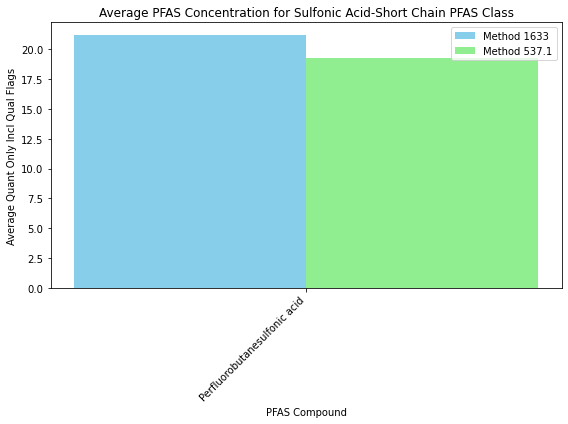

In [172]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Sulfonic Acid-Short Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

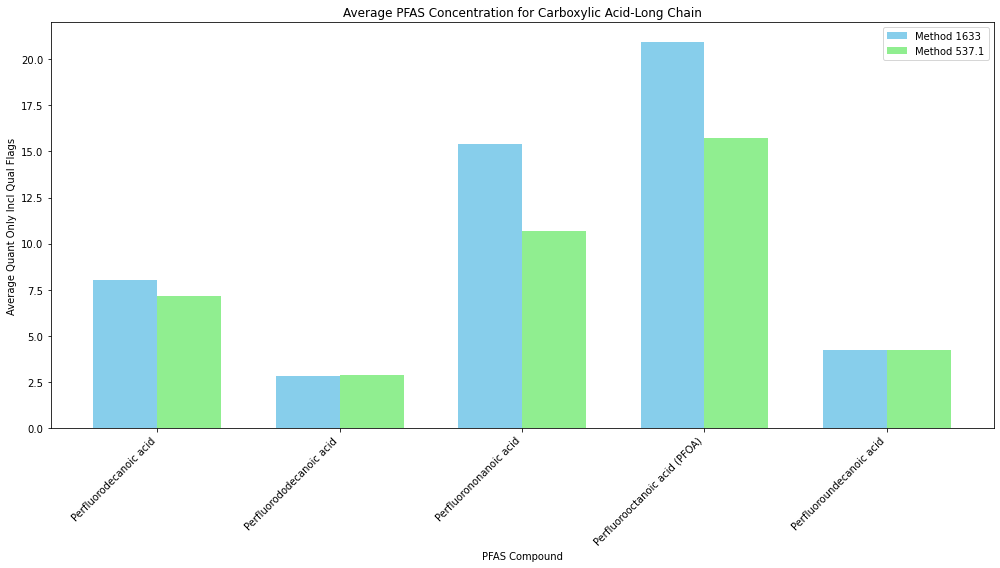

In [174]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Carboxylic Acid-Long Chain')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

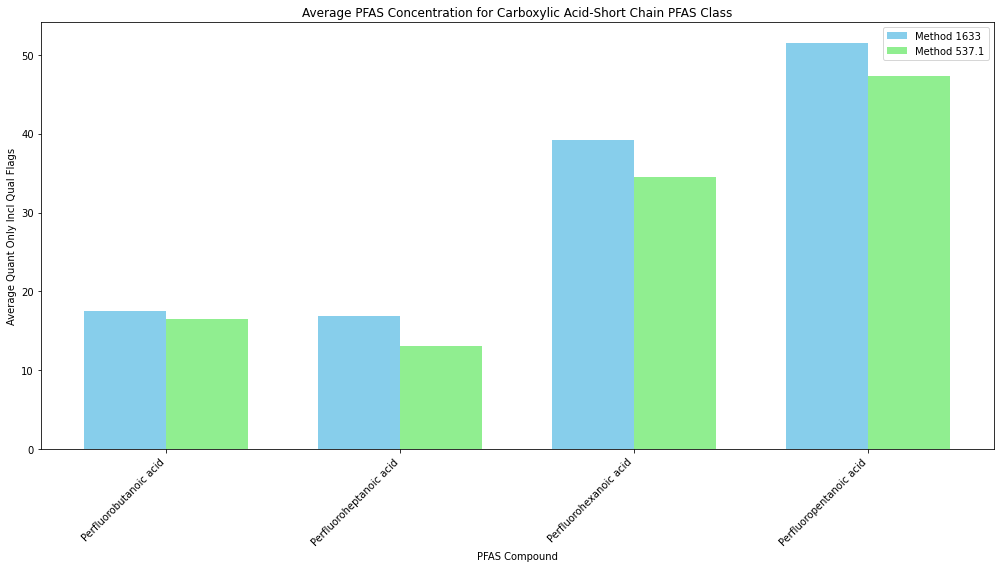

In [175]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Carboxylic Acid-Short Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

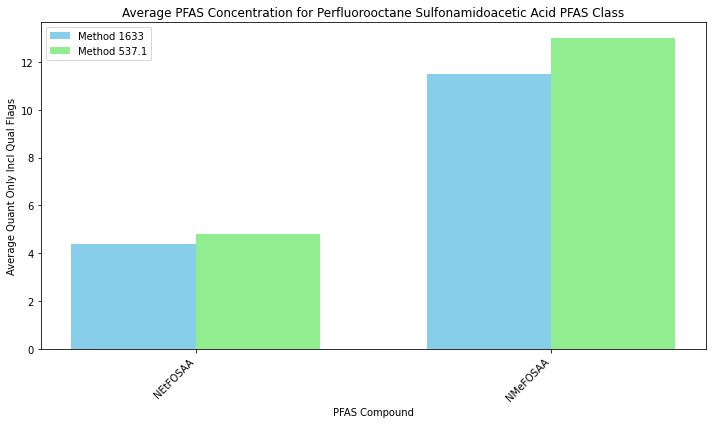

In [177]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Perfluorooctane Sulfonamidoacetic Acid PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

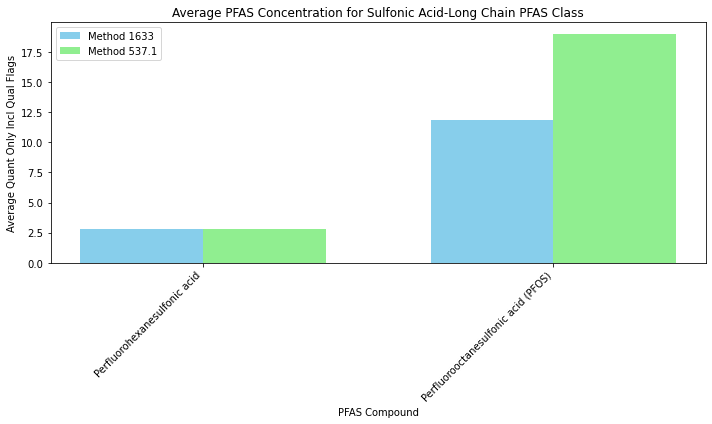

In [178]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Sulfonic Acid-Long Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

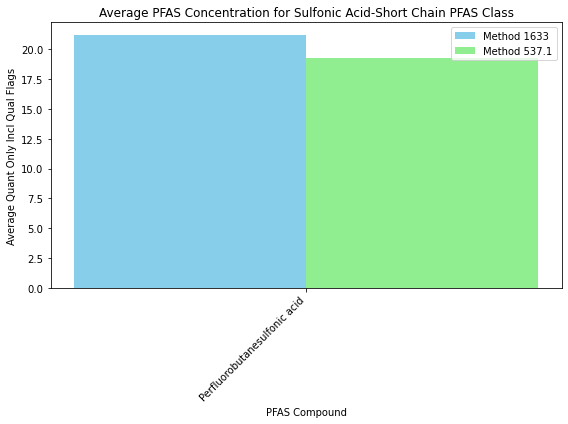

In [180]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Sulfonic Acid-Short Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()